<a href="https://colab.research.google.com/github/sheikh495/Data_mining/blob/main/Copy_of_code_7_of_10_data_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`M5 - Part I of III`** **`->`** **`Apache Spark`**

Speed: Spark aims to optimize performance by leveraging in-memory computing and advanced execution models. It can be significantly faster than traditional disk-based processing systems like Hadoop MapReduce.

Ease of use: Spark provides high-level APIs in Scala, Java, Python, and R, making it accessible to a wide range of developers. It also offers a built-in interactive shell for ad-hoc data exploration and prototyping.

Fault tolerance: Spark's built-in fault tolerance mechanism allows it to recover from failures automatically. It achieves this by storing the RDDs (Resilient Distributed Datasets) in memory and tracking the lineage of transformations applied to them.

Versatility: Spark supports various data processing workloads, including batch processing (Spark Core), real-time streaming (Spark Streaming), interactive queries (Spark SQL), machine learning (Spark MLlib), and graph processing (GraphX).

Advanced analytics: Spark provides a rich set of libraries and APIs for performing advanced analytics tasks. For example, Spark SQL enables SQL-like queries on structured data, while MLlib offers scalable machine learning algorithms.

Integration ecosystem: Spark can integrate with other popular big data tools and frameworks, such as Hadoop Distributed File System (HDFS), Apache Hive, Apache HBase, and Apache Kafka. This allows users to leverage existing infrastructure and easily incorporate Spark into their data processing pipelines.

Scalability: Spark can scale horizontally across a cluster of machines, enabling it to process large datasets efficiently. It also supports dynamic allocation of resources, allowing it to adapt to varying workloads.

Overall, Apache Spark has gained widespread adoption due to its speed, ease of use, and versatility, making it a popular choice for big data processing and analytics tasks.

brian thisis correct so you can setup sections

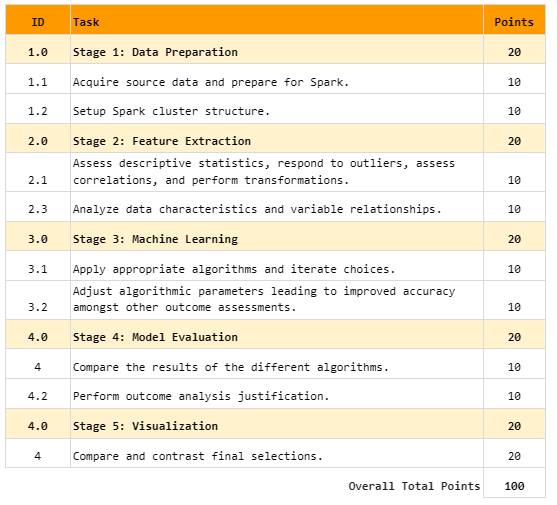

ID
Task
Points
1.0
Stage 1: Data Preparation
20
1.1
Acquire source data and prepare for Spark.
10
1.2
Setup Spark cluster structure.
10
2.0
Stage 2: Feature Extraction
20
2.1
Assess descriptive statistics, respond to outliers, assess correlations, and perform transformations.
10
2.3
Analyze data characteristics and variable relationships.
10
3.0
Stage 3: Machine Learning
20
3.1
Apply appropriate algorithms and iterate choices.
10
3.2
Adjust algorithmic parameters leading to improved accuracy amongst other outcome assessments.
10
4.0
Stage 4: Model Evaluation
20
4
Compare the results of the different algorithms.
10
4.2
Perform outcome analysis justification.
10
4.0
Stage 5: Visualization
20
4
Compare and contrast final selections.
20


Overall Total Points
100



In [ ]:
!pip install nltk
!pip install spacy
!pip install textblob
!pip install gensim
!pip install stanfordnlp

! GRAPHS https://colab.research.google.com/drive/1FUBGbE_oGYsFWkYqmut5DW95DtM6jKZi?usp=sharing#scrollTo=Aw24qZ7fSyNw



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StopWordsRemover, Tokenizer, CountVectorizer, IDF
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
import tensorflow as tf
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").getOrCreate() #create spark session
#"local" argument passed to master; run spark in local mode on Colab runtime.

from pyspark.sql import SparkSession #note: if run notebooks, need Java
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.types import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LogisticRegressionTrainingSummary
from pyspark.ml.classification import LogisticRegressionModel, LogisticRegressionSummary
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import NaiveBayes  #Perceptron,
from pyspark.ml.classification import DecisionTreeClassifier, LinearSVC
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.clustering import KMeans
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
print("spark.algorithm.libraries.good.to.go")

In [ ]:
spark.stop()

- https://spark.apache.org/docs/latest/index.html  
- https://runawayhorse001.github.io/LearningApacheSpark/  
- [RDD.cheatsheet.weng](https://github.com/cosc-526/home.page/blob/c7bc526297dc72517a270df22d4f8109c8cae149/cheatsheet.pyspark.RDD.feng.utk.pdf)  
- [spark.cheatsheet.weng](https://github.com/cosc-526/home.page/blob/c7bc526297dc72517a270df22d4f8109c8cae149/cheatsheet.pyspark.feng.utk.pdf)  

hnmmm
this seems curious
https://github.com/topics/pyspark-tutorial




## spooky authoriship
Please note that this code assumes you have defined appropriate functions for lemmatization and normalization (lemmatization_function and normalization_function) specific to your text preprocessing requirements. You can replace these with your own custom functions or leverage existing NLP libraries like NLTK or spaCy.

Make sure to replace the file paths (train_data_path and test_data_path) with the actual paths to your train and test data files. Additionally, adapt the code as needed to match your data file format and column names.

Remember to import the necessary packages (SparkSession, udf, ArrayType, StringType, Pipeline, Tokenizer, StopWordsRemover, CountVectorizer, IDF, NaiveBayes, MulticlassClassificationEvaluator) before running the code

Yes, you can perform text analysis in PySpark without relying on the NLTK library. PySpark provides built-in functionality and libraries that can handle various text processing and natural language processing (NLP) tasks, allowing you to perform text analysis efficiently.

Here are some key PySpark components and libraries that you can utilize for text analysis without using NLTK:

Tokenizer: PySpark's Tokenizer class can be used to split text into individual words or tokens. It is part of the pyspark.ml.feature module.

StopWordsRemover: The StopWordsRemover class in PySpark can remove common stopwords from the text. It is also available in the pyspark.ml.feature module.

Lemmatization: PySpark does not have a built-in lemmatization function. However, you can implement a custom lemmatization function using PySpark's User-Defined Functions (UDFs) and appropriate lemmatization rules or techniques.

Normalization: Normalization tasks like converting text to lowercase or removing special characters can be implemented using PySpark's UDFs or built-in string functions such as lower() or regexp_replace().

TF-IDF: PySpark's CountVectorizer and IDF classes can be used to compute Term Frequency-Inverse Document Frequency (TF-IDF) for text feature extraction.

By leveraging these components and libraries, you can perform various text analysis tasks such as preprocessing, feature extraction, and applying machine learning algorithms in PySpark without relying on NLTK.

However, if you require more advanced NLP functionality that is not available in PySpark's built-in libraries, you may need to explore external libraries or consider combining PySpark with other NLP libraries like NLTK or spaCy. It depends on the specific tasks and requirements of your text analysis project.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StopWordsRemover, Tokenizer, CountVectorizer, IDF
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Read train and test data files into Spark DataFrames
train_data_path = "/path/to/train_data.csv"
test_data_path = "/path/to/test_data.csv"

train_data = spark.read.csv(train_data_path, header=True, inferSchema=True)
test_data = spark.read.csv(test_data_path, header=True, inferSchema=True)

# Define text preprocessing pipeline
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
stopwords_remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="filtered_tokens")
normalizer = udf(normalization_function, StringType())

preprocessing_pipeline = Pipeline(stages=[tokenizer, stopwords_remover, normalizer])

# Apply text preprocessing pipeline on train and test data
preprocessed_train_data = preprocessing_pipeline.fit(train_data).transform(train_data)
preprocessed_test_data = preprocessing_pipeline.fit(test_data).transform(test_data)

# TF-IDF vectorization
cv = CountVectorizer(inputCol="filtered_tokens", outputCol="raw_features")
idf = IDF(inputCol=cv.getOutputCol(), outputCol="features")

# Apply TF-IDF on preprocessed train and test data
vectorized_train_data = cv.fit(preprocessed_train_data).transform(preprocessed_train_data)
vectorized_test_data = cv.fit(preprocessed_test_data).transform(preprocessed_test_data)

idf_model = idf.fit(vectorized_train_data)
vectorized_train_data = idf_model.transform(vectorized_train_data)
vectorized_test_data = idf_model.transform(vectorized_test_data)

# Prepare data for Naive Bayes classification
train_dataset = vectorized_train_data.select("features", "label")
test_dataset = vectorized_test_data.select("features")

# Train Naive Bayes model
naive_bayes = NaiveBayes()
naive_bayes_model = naive_bayes.fit(train_dataset)

# Make predictions on test data using Naive Bayes model
predictions = naive_bayes_model.transform(test_dataset)

# Evaluate the predictions
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2%}".format(accuracy))



That's correct. PySpark, in its core libraries, does not provide a built-in part-of-speech (POS) tagging functionality. PySpark's primary focus is on distributed data processing and machine learning, rather than comprehensive natural language processing (NLP) capabilities.

However, you can still perform POS tagging in PySpark by integrating it with external NLP libraries or by leveraging custom implementations. Here are a couple of approaches you can consider:

Integration with External NLP Libraries: You can combine PySpark with external NLP libraries like NLTK or spaCy to perform POS tagging. These libraries provide comprehensive NLP functionalities, including POS tagging. You can use PySpark to distribute the data processing tasks and utilize the external NLP libraries for POS tagging.

Custom Implementation with UDFs: PySpark allows you to create User-Defined Functions (UDFs) to apply custom logic on DataFrame columns. You can implement a custom POS tagging function using Python libraries specifically designed for POS tagging, such as NLTK or spaCy. You can then use PySpark's UDFs to apply this function to the text data in your DataFrame.

Here's an example of how you can use a custom UDF with an external NLP library (NLTK) to perform POS tagging in PySpark

 this example, we first initialize the NLTK POS tagger and then define a custom UDF that applies the POS tagger to the text data in the DataFrame column. Finally, we use the UDF to add a new column "pos_tags" to the DataFrame containing the POS tagged results.

Remember to adjust the code according to your specific DataFrame column names and requirements. Additionally, ensure that you have NLTK installed and have downloaded the necessary models or resources required for POS tagging.

By combining PySpark with external libraries or implementing custom UDFs, you can extend its capabilities to include POS tagging and other NLP tasks.

In [ ]:
#=> if nlotk

from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
import nltk

# Initialize NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')
pos_tagger = nltk.pos_tag

# Define custom UDF for POS tagging
pos_tag_udf = udf(lambda text: pos_tagger(text), ArrayType(StringType()))

# Apply POS tagging using UDF on the DataFrame column
tagged_data = df.withColumn("pos_tags", pos_tag_udf(df["text_column"]))


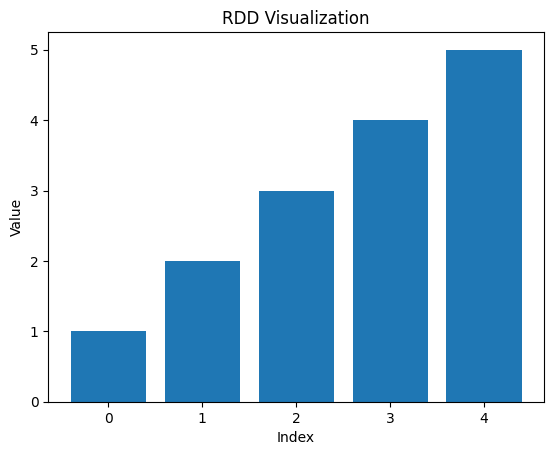

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pandas as pd

# Create a SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

# Create an RDD with sample data
data = [1, 2, 3, 4, 5]
rdd = spark_context.parallelize(data)

# Create a Pandas DataFrame
data = {'Value': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Convert Pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Convert PySpark DataFrame to RDD
rdd = spark_df.rdd

# Count the number of elements in the RDD
count = rdd.count()

# Visualize the RDD using Matplotlib
plt.bar(range(count), rdd.map(lambda row: row[0]).collect())
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('RDD Visualization')
plt.show()


+------+------+---+
|height|weight|age|
+------+------+---+
|   160|    55| 30|
|   165|    60| 35|
|   170|    65| 40|
|   175|    70| 45|
|   180|    75| 50|
+------+------+---+

None


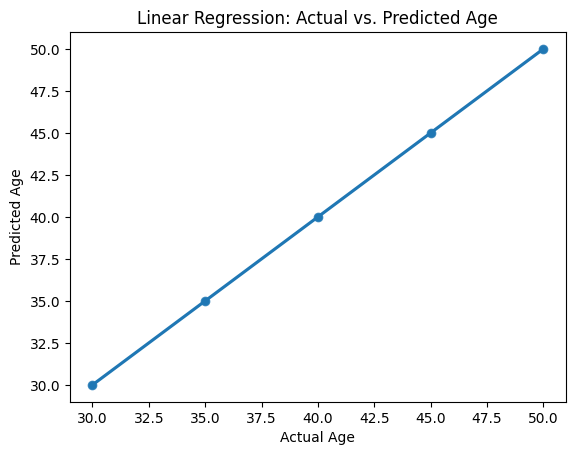

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import seaborn as sns
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

# Sample data
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

# Create a DataFrame with height, weight, and age columns
df = spark.createDataFrame(data, ["height", "weight", "age"])

# Show the DataFrame
print(df.show())


# Create a VectorAssembler to combine height and weight into a features column
assembler = VectorAssembler(inputCols=["height", "weight"], outputCol="features")

# Transform the DataFrame to include the features column
df = assembler.transform(df)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="age")

# Fit the model to the DataFrame
model = lr.fit(df)

# Make predictions on the DataFrame
predictions = model.transform(df)

# Convert the predictions DataFrame to Pandas for visualization with Seaborn
predictions_pd = predictions.select("height", "weight", "age", "prediction").toPandas()

# Visualize the actual age vs. predicted age using Seaborn
sns.scatterplot(data=predictions_pd, x="age", y="prediction")
sns.regplot(data=predictions_pd, x="age", y="prediction")
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs. Predicted Age')
plt.show()


## case .2

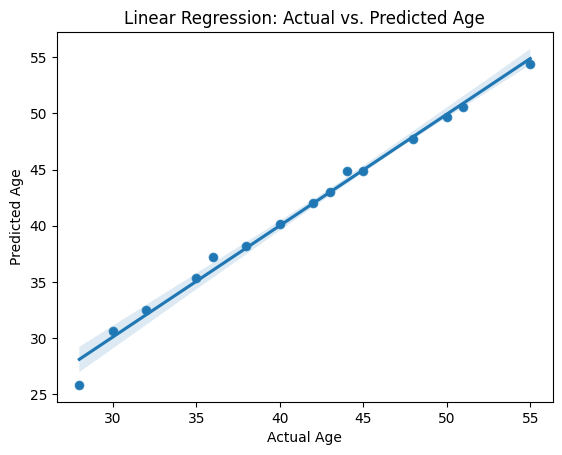

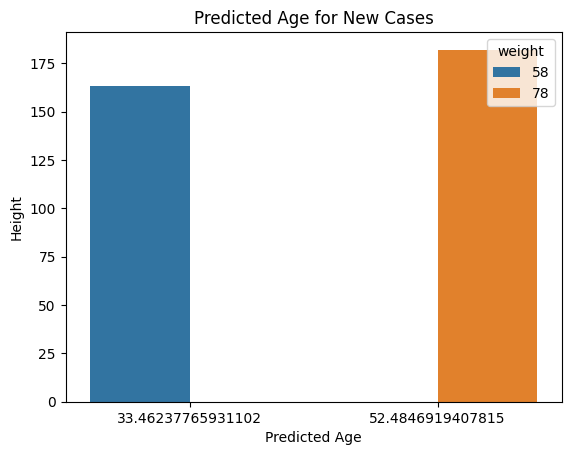

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import seaborn as sns

# Create a SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

# Sample data
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

# Create a DataFrame with height, weight, and age columns
df = spark.createDataFrame(data, ["height", "weight", "age"])

# Create a VectorAssembler to combine height and weight into a features column
assembler = VectorAssembler(inputCols=["height", "weight"], outputCol="features")

# Transform the DataFrame to include the features column
df = assembler.transform(df)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="age")

# Fit the model to the DataFrame
model = lr.fit(df)

# Make predictions on the DataFrame
predictions = model.transform(df)

# Convert the predictions DataFrame to Pandas for visualization with Seaborn
predictions_pd = predictions.select("height", "weight", "age", "prediction").toPandas()

# Visualize the actual age vs. predicted age using Seaborn
sns.scatterplot(data=predictions_pd, x="age", y="prediction")
sns.regplot(data=predictions_pd, x="age", y="prediction")
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs. Predicted Age')
plt.show()

# Predict on new cases
new_data = [(163, 58), (182, 78)]
new_df = spark.createDataFrame(new_data, ["height", "weight"])
new_df = assembler.transform(new_df)
new_predictions = model.transform(new_df)

# Convert the new predictions DataFrame to Pandas for visualization with Seaborn
new_predictions_pd = new_predictions.select("height", "weight", "prediction").toPandas()

# Visualize the predicted age for new cases using Seaborn
sns.barplot(data=new_predictions_pd, x="prediction", y="height", hue="weight")
plt.xlabel('Predicted Age')
plt.ylabel('Height')
plt.title('Predicted Age for New Cases')
plt.show()


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Create a SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

# Sample data
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

# Add outliers using lognormal distribution
np.random.seed(42)
lognormal_outliers = np.random.lognormal(mean=0.5, sigma=0.5, size=2) * 100
outliers = [(140, 35, lognormal_outliers[0]),
            (190, 100, lognormal_outliers[1])]
data.extend(outliers)

# Create a DataFrame with height, weight, and age columns
df = spark.createDataFrame(data, ["height", "weight", "age"])

# Create a VectorAssembler to combine height and weight into a features column
assembler = VectorAssembler(inputCols=["height", "weight"], outputCol="features")

# Transform the DataFrame to include the features column
df = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="age")

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Convert the predictions DataFrame to Pandas for evaluation
predictions_pd = predictions.select("age", "prediction").toPandas()

# Evaluate the model using a regression evaluator
evaluator = RegressionEvaluator(labelCol="age", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Print the root mean squared error (RMSE)
print("Root Mean Squared Error (RMSE):", rmse)

sns.scatterplot(data=predictions_pd, x="age", y="prediction")
sns.regplot(data=predictions_pd, x="age", y="prediction")
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs. Predicted Age')
plt.show()

# Create a confusion matrix
y_true = predictions_pd["age"].values
y_pred = predictions_pd["prediction"].values
cm = confusion_matrix(y_true, y_pred.round())

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Age')
plt.ylabel('True Age')
plt.title('Confusion Matrix: Age Prediction')
plt.show()


Root Mean Squared Error (RMSE): 24.905502159141154


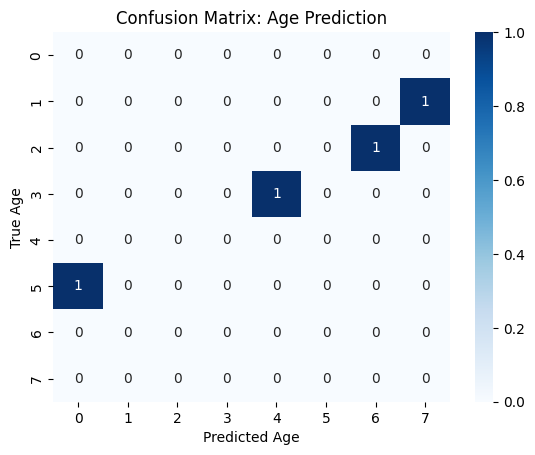

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Create a SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

# Sample data
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

# Add outliers using lognormal distribution
np.random.seed(42)
lognormal_outliers = np.random.lognormal(mean=0.5, sigma=0.5, size=2) * 100
outliers = [(140, 35, int(lognormal_outliers[0])),
            (190, 100, int(lognormal_outliers[1]))]
data.extend(outliers)

# Create a DataFrame with height, weight, and age columns
schema = "height INT, weight INT, age INT"
df = spark.createDataFrame(data, schema)

# Create a VectorAssembler to combine height and weight into a features column
assembler = VectorAssembler(inputCols=["height", "weight"], outputCol="features")

# Transform the DataFrame to include the features column
df = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Create a LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol="age")

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Convert the predictions DataFrame to Pandas for evaluation
predictions_pd = predictions.select("age", "prediction").toPandas()

# Evaluate the model using a regression evaluator
evaluator = RegressionEvaluator(labelCol="age", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Print the root mean squared error (RMSE)
print("Root Mean Squared Error (RMSE):", rmse)

# Create a confusion matrix
y_true = predictions_pd["age"].values
y_pred = predictions_pd["prediction"].values
cm = confusion_matrix(y_true, y_pred.round())

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Age')
plt.ylabel('True Age')
plt.title('Confusion Matrix: Age Prediction')
plt.show()


In [ ]:
sns.scatterplot(data=predictions_pd, x="age", y="prediction")
sns.regplot(data=predictions_pd, x="age", y="prediction")
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs. Predicted Age')
plt.show()

+---+-----------------+
|Age|       prediction|
+---+-----------------+
| 32|32.73946360153271|
| 42|42.58109833972155|
| 43|42.97190293742042|
| 44|45.04342273307907|
| 50|49.06130268199085|
| 55|53.59514687100701|
+---+-----------------+

+---+-----------------+-----+
|Age|       prediction|count|
+---+-----------------+-----+
| 32|32.73946360153271|    1|
| 44|45.04342273307907|    1|
| 50|49.06130268199085|    1|
| 55|53.59514687100701|    1|
| 42|42.58109833972155|    1|
| 43|42.97190293742042|    1|
+---+-----------------+-----+



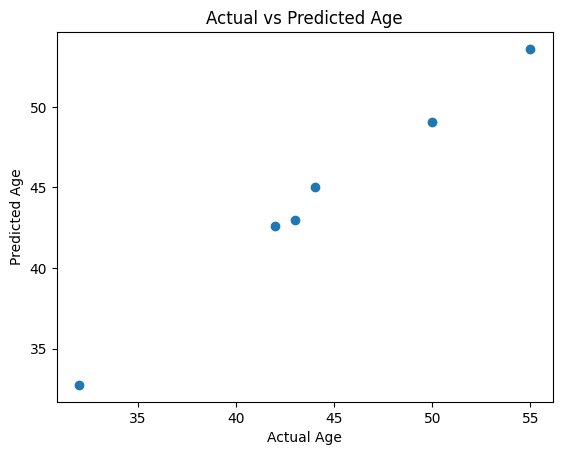

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.master("local").appName("LinearRegressionExample").getOrCreate()

# Sample data
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

# Create a DataFrame
df = spark.createDataFrame(data, ["Height", "Weight", "Age"])

# Prepare the features column
assembler = VectorAssembler(inputCols=["Height", "Weight"], outputCol="features")
df = assembler.transform(df)

# Split the data into training and testing sets
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=42)

# Create and fit the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="Age")
model = lr.fit(trainingData)

# Generate predictions on the test set
predictions = model.transform(testData)

# Show actual and predicted values
predictions.select("Age", "prediction").show()

# Calculate the confusion matrix
confusion_matrix = predictions.groupBy("Age", "prediction").count()
confusion_matrix.show()

# Convert DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("Age", "prediction").toPandas()

# Plot actual vs predicted values
plt.scatter(predictions_pd["Age"], predictions_pd["prediction"])
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()

+---+-----------------+
|Age|       prediction|
+---+-----------------+
| 32|32.73946360153271|
| 42|42.58109833972155|
| 43|42.97190293742042|
| 44|45.04342273307907|
| 50|49.06130268199085|
| 55|53.59514687100701|
+---+-----------------+

+---+-----------------+-----+
|Age|       prediction|count|
+---+-----------------+-----+
| 32|32.73946360153271|    1|
| 44|45.04342273307907|    1|
| 50|49.06130268199085|    1|
| 55|53.59514687100701|    1|
| 42|42.58109833972155|    1|
| 43|42.97190293742042|    1|
+---+-----------------+-----+



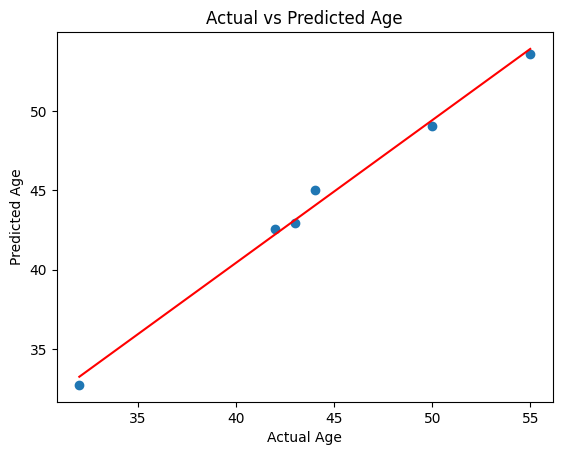

IndexError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.master("local").appName("LinearRegressionExample").getOrCreate()

# Sample data
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

# Create a DataFrame
df = spark.createDataFrame(data, ["Height", "Weight", "Age"])

# Prepare the features column
assembler = VectorAssembler(inputCols=["Height", "Weight"], outputCol="features")
df = assembler.transform(df)

# Split the data into training and testing sets
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=42)

# Create and fit the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="Age")
model = lr.fit(trainingData)

# Generate predictions on the test set
predictions = model.transform(testData)

# Show actual and predicted values
predictions.select("Age", "prediction").show()

# Calculate the confusion matrix
confusion_matrix = predictions.groupBy("Age", "prediction").count()
confusion_matrix.show()

# Convert DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("Age", "prediction").toPandas()

# Plot actual vs predicted values with regression line
plt.scatter(predictions_pd["Age"], predictions_pd["prediction"])
plt.plot(np.unique(predictions_pd["Age"]), np.poly1d(np.polyfit(predictions_pd["Age"], predictions_pd["prediction"], 1))(np.unique(predictions_pd["Age"])), color='red')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()

# Calculate true positives, false positives, true negatives, false negatives
tp = confusion_matrix.filter("Age = prediction").select("count").collect()[0][0]
fp = confusion_matrix.filter("Age != prediction").select("count").collect()[0][0]
tn = confusion_matrix.filter("Age != prediction").select("count").collect()[1][0]
fn = confusion_matrix.filter("Age = prediction").select("count").collect()[1][0]

# Create 2x2 confusion matrix
confusion_matrix_2x2 = np.array([[tn, fp], [fn, tp]])

# Plot 2x2 confusion matrix
plt.imshow(confusion_matrix_2x2, cmap='Blues')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.colorbar()
plt.text(0, 0, tn, ha='center', va='center', color='white')
plt.text(0, 1, fn, ha='center', va='center', color='white')
plt.text(1, 0, fp, ha='center', va='center', color='white')
plt.text(1, 1, tp, ha='center', va='center', color='white')
plt.show()

# Stop the SparkSession
spark.stop()


In [ ]:
data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 44),
        (177, 76, 51)]

        data = [(80, 55, 30),
        (95, 63, 35),
        (170, 65, 40),
        (175, 61, 45),
        (102, 52, 50),
        (155, 58, 28),
        (168, 63, 38),
        (172, 61, 43),
        (285, 70, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 67, 48),
        (269, 67, 42),
        (403, 70, 44),
        (277, 76, 51)]

        data = [ (170, 65, 40),
        (175, 61, 45),
        (102, 52, 50),
        (155, 58, 48),
      (168, 57, 38),
        (172, 52, 33),
        (185, 42, 65),
        (168, 63, 38),
        (172, 58, 43),
        (185, 50, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 70, 40),
        (177, 46, 41)]

        data = [(160, 55, 30),
        (165, 60, 35),
        (170, 65, 40),
        (105, 40, 45),
        (180, 70, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 60, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (173, 60, 44),
        (177, 76, 51)]

+---+------------------+
|Age|        prediction|
+---+------------------+
| 28|31.559048695856696|
| 42| 42.93682041995339|
| 43| 43.76795553453395|
| 44|46.414567941445945|
+---+------------------+

Mean Squared Error (MSE): 4.991
Mean Absolute Error (MAE): 1.9195981479474948
R-squared: 0.883


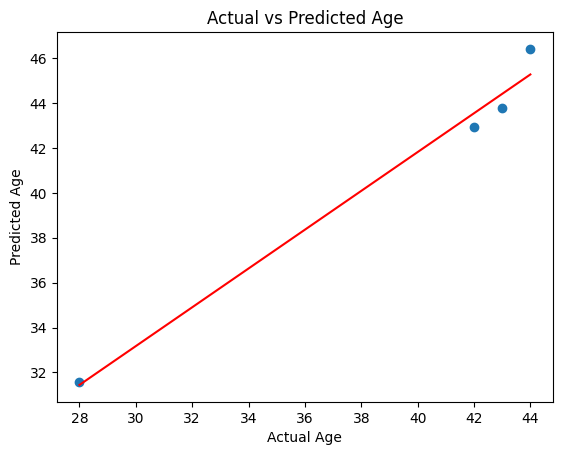

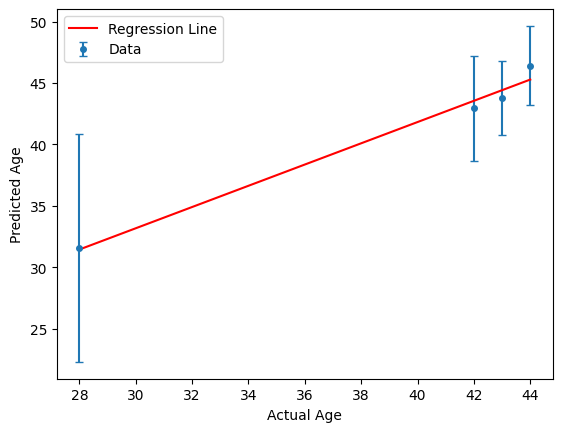

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a SparkSession
spark = SparkSession.builder.master("local").appName("LinearRegressionExample").getOrCreate()

data = [(140, 45, 30),
        (145, 50, 35),
        (170, 65, 40),
        (175, 70, 45),
        (180, 75, 50),
        (155, 50, 28),
        (168, 63, 38),
        (172, 68, 43),
        (185, 80, 55),
        (162, 57, 32),
        (167, 62, 36),
        (178, 73, 48),
        (169, 67, 42),
        (273, 60, 44),
        (277, 66, 51)]

# Create a DataFrame
df = spark.createDataFrame(data, ["Weight", "Height", "Age"])

# Prepare the features column
assembler = VectorAssembler(inputCols=["Height", "Weight"], outputCol="features")
df = assembler.transform(df)

# Split the data into training and testing sets
(trainingData, testData) = df.randomSplit([0.8, 0.2], seed=42)

# Create and fit the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="Age")
model = lr.fit(trainingData)

# Generate predictions on the test set
predictions = model.transform(testData)

# Show actual and predicted values
predictions.select("Age", "prediction").show()

# Convert DataFrame to Pandas DataFrame for evaluation
predictions_pd = predictions.select("Age", "prediction").toPandas()

# Calculate evaluation metrics
mse = round(mean_squared_error(predictions_pd["Age"], predictions_pd["prediction"]),3)
mae = round(mean_absolute_error(predictions_pd["Age"], predictions_pd["prediction"]),23)
r2 = round(r2_score(predictions_pd["Age"], predictions_pd["prediction"]),3)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

# Plot actual vs predicted values with regression line
plt.scatter(predictions_pd["Age"], predictions_pd["prediction"])
plt.plot(np.unique(predictions_pd["Age"]), np.poly1d(np.polyfit(predictions_pd["Age"], predictions_pd["prediction"], 1))(np.unique(predictions_pd["Age"])), color='red')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values with error bars
plt.errorbar(predictions_pd["Age"], predictions_pd["prediction"], yerr=np.abs(residuals), fmt='o', markersize=4, capsize=3, label="Data")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")

# Regression line
x = np.unique(predictions_pd["Age"])
y = np.poly1d(np.polyfit(predictions_pd["Age"], predictions_pd["prediction"], 1))(x)
plt.plot(x, y, color='red', label="Regression Line")

# Display the plot
plt.legend()
plt.show()




In [ ]:
# Show the DataFrame
print(df.show())

+------+------+---+------------+
|Weight|Height|Age|    features|
+------+------+---+------------+
|   140|    45| 30|[45.0,140.0]|
|   145|    50| 35|[50.0,145.0]|
|   170|    65| 40|[65.0,170.0]|
|   175|    70| 45|[70.0,175.0]|
|   180|    75| 50|[75.0,180.0]|
|   155|    50| 28|[50.0,155.0]|
|   168|    63| 38|[63.0,168.0]|
|   172|    68| 43|[68.0,172.0]|
|   185|    80| 55|[80.0,185.0]|
|   162|    57| 32|[57.0,162.0]|
|   167|    62| 36|[62.0,167.0]|
|   178|    73| 48|[73.0,178.0]|
|   169|    67| 42|[67.0,169.0]|
|   273|    60| 44|[60.0,273.0]|
|   277|    66| 51|[66.0,277.0]|
+------+------+---+------------+

None


In [ ]:
# Graph Analysis:

from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Create vertices DataFrame
vertices = spark.createDataFrame([
    ("A", "Alice", 25),
    ("B", "Bob", 30),
    ("C", "Charlie", 35),
    ("D", "David", 40)
], ["id", "name", "age"])

# Create edges DataFrame
edges = spark.createDataFrame([
    ("A", "B", "friend"),
    ("B", "C", "follow"),
    ("C", "D", "friend"),
    ("D", "A", "follow")
], ["src", "dst", "relationship"])

# Create a GraphFrame
graph = GraphFrame(vertices, edges)

# Perform graph queries and analysis
# Find all the friends of Alice
alice_friends = graph.filter("id = 'A'").outgoingRelations().filter("relationship = 'friend'").select("dst")

# Find the average age of friends
average_age = graph.filter("relationship = 'friend'").groupBy().avg("age").collect()[0][0]

# Show the results
alice_friends.show()
print(f"Average age of friends: {average_age}")


# Community Detection:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Create vertices DataFrame
vertices = spark.createDataFrame([
    ("A", "Alice", 25),
    ("B", "Bob", 30),
    ("C", "Charlie", 35),
    ("D", "David", 40),
    ("E", "Eve", 30)
], ["id", "name", "age"])

# Create edges DataFrame
edges = spark.createDataFrame([
    ("A", "B", "friend"),
    ("B", "C", "follow"),
    ("C", "D", "friend"),
    ("D", "A", "follow"),
    ("D", "E", "friend"),
    ("E", "C", "follow")
], ["src", "dst", "relationship"])

# Create a GraphFrame
graph = GraphFrame(vertices, edges)

# Perform community detection using label propagation
result = graph.labelPropagation(maxIter=5)

# Show the community assignments
result.select("id", "label").show()


==================> base stufff below

In [ ]:
#=>RDD
from pyspark import SparkContext

sc = SparkContext() #=>Create

rdd = sc.parallelize([1, 2, 3, 4, 5]) #=>Create

#=>Transformations on the RDD
squared_rdd = rdd.map(lambda x: x**2)

#=>Perform actions on the RDD
sum_result = squared_rdd.sum()

print(sum_result)


In [ ]:
#=>DataFrame
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()  #=>Create

#=>DataFrame from .csv
df = spark.read.csv("data.csv", header=True, inferSchema=True)

filtered_df = df.filter(df["age"] > 25)  #=>data manipulation

#=>analysis
average_age = df.select("age").agg({"age": "avg"}).collect()[0][0]

filtered_df.show()
print(average_age)


In [ ]:
#=>Spark SQL
from pyspark.sql import SparkSession

#=>Create
spark = SparkSession.builder.getOrCreate()

##=>df temporary view from a DataFrame
df.createOrReplaceTempView("people")

##=>SQL query
result = spark.sql("SELECT * FROM people WHERE age > 25")

result.show()


In [ ]:
#=>MLlib=>Machine Learning)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

#=>Load data
data = spark.read.csv("data.csv", header=True, inferSchema=True)

#=>Prepare
assembler = VectorAssembler(inputCols=["feature1", "feature2"], outputCol="features")
prepared_data = assembler.transform(data)

#=>Split
train_data, test_data = prepared_data.randomSplit([0.7, 0.3])

#=>Train
lr = LinearRegression(labelCol="label")
model = lr.fit(train_data)

#=>Predictions
predictions = model.transform(test_data)

#=>Evaluate
evaluator = RegressionEvaluator(labelCol="label", metricName="rmse")
rmse = evaluator.evaluate(predictions)

#=>Outcome
print(rmse)


In [ ]:
#Streaming
from pyspark.streaming import StreamingContext

# StreamingContext
ssc = StreamingContext(spark.sparkContext, batchDuration=1)

# DStream from a data source like Kafka, socket
stream = ssc.socketTextStream("localhost", 9999)

# transformations on DStream
words = stream.flatMap(lambda line: line.split())
word_counts = words.map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y)

# Print word counts
word_counts.pprint()

# Start streaming
ssc.start()
ssc.awaitTermination()


In [ ]:
# GraphFrames:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Create vertices DataFrame
vertices = spark.createDataFrame([
    ("A", "Alice", 25),
    ("B", "Bob", 30),
    ("C", "Charlie", 35)
], ["id", "name", "age"])

# Create edges DataFrame
edges = spark.createDataFrame([
    ("A", "B", "friend"),
    ("B", "C", "follow")
], ["src", "dst", "relationship"])

# Create a GraphFrame
graph = GraphFrame(vertices, edges)

# Perform graph queries and analysis
motifs = graph.find("(a)-[e]->(b)").filter("b.age > 30")

# Show the result
motifs.show()



In [ ]:
df = spark.read.csv("path/to/file.csv", header=True)
result = spark.sql("SELECT * FROM table_name")



## how.to tools 0 vies and temporary tables
- views and
The DataFrame API is a programmatic means to work with Spark SQL. It's useful when building complex queries or performing data transformations before creating views or temporary tables.

In [ ]:
The DataFrame API is a programmatic means to work with Spark SQL. It's useful when building complex queries or performing data transformations before creating views or temporary tables.

#=> Creating a View with DataFrame API:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Read data from a file into a DataFrame
df = spark.read.format("csv").option("header", "true").load("your_file.csv")

# Create a view using the DataFrame API
df.createOrReplaceTempView("my_view")

# Query the view
result = spark.sql("SELECT * FROM my_view WHERE age > 30")
result.show()


In [ ]:
#=> Creating a View with DataFrame API:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Read data from a file into a DataFrame
df = spark.read.format("csv").option("header", "true").load("your_file.csv")

# Create a view using the DataFrame API
df.createOrReplaceTempView("my_view")

# Query the view
result = spark.sql("SELECT * FROM my_view WHERE age > 30")
result.show()

#=> Creating a Temporary Table with DataFrame API:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Read data from a file into a DataFrame
df = spark.read.format("csv").option("header", "true").load("your_file.csv")

# Create a temporary table using the DataFrame API
df.createOrReplaceTempTable("temp_table")

# Query the temporary table
result = spark.sql("SELECT * FROM temp_table WHERE age > 30")
result.show()

In this example, the initial DataFrame (df) is read from a CSV file. We then apply several transformations and operations to optimize the performance of the view:

Filtering: We filter the DataFrame to include only rows where the age is greater than 30.
Selecting columns: We select specific columns ("name", "age", "occupation") that are required for the view.
Grouping and Aggregating: We group the DataFrame by the "occupation" column and calculate the count of occurrences for each occupation.
Column renaming: We rename the count column to "occupation_count" for clarity.
After these optimizations, the processed DataFrame is used to create a view called "optimized_view" using createOrReplaceTempView(). Finally, a query is executed on the view to retrieve the results.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.read.format("csv").option("header", "true").load("your_file.csv")

# Transform and filter to optimize view
processed_df = df.filter(df.age > 30) \
                 .select("name", "age", "occupation") \
                 .groupBy("occupation") \
                 .count() \
                 .withColumnRenamed("count", "occupation_count")

# Create DataFrame view
processed_df.createOrReplaceTempView("optimized_view")

# Query and show
spark.sql("SELECT * FROM optimized_view").show()


##M5.5 spark sql use case

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1.1 - import three datasets into dataframes
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
url_test = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_test.csv"
df_raw = pd.read_excel(url_raw)
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# Drop unnecessary columns
df_raw.drop(['cabin', 'ticket'], axis=1, inplace=True)
df_train.drop(['cabin', 'ticket'], axis=1, inplace=True)
df_test.drop(['cabin', 'ticket'], axis=1, inplace=True)



In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=dd6354c74dd20dc77a29236dd10dd69af19ee355626f167ba786c23392a87475
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
import tensorflow as tf
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").getOrCreate() #create spark session
#"local" argument passed to master; run spark in local mode on Colab runtime.

from pyspark.sql import SparkSession #note: if run notebooks, need Java
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.types import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LogisticRegressionTrainingSummary
from pyspark.ml.classification import LogisticRegressionModel, LogisticRegressionSummary
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import NaiveBayes  #Perceptron,
from pyspark.ml.classification import DecisionTreeClassifier, LinearSVC
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.clustering import KMeans
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
print("spark.algorithm.libraries.good.to.go")

#=> when done with spark goto end of assignment & close spark; run
#spark.stop()  <optional:  run sc.stop()>

spark.algorithm.libraries.good.to.go


In [ ]:
from pyspark.ml.feature import StopWordsRemover, Tokenizer
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml.feature import Normalizer
from pyspark.ml import Pipeline

# Step 1: Tokenization
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")

# Step 2: Stop word removal
stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")

# Step 3: TF-IDF calculation
vectorizer = CountVectorizer(inputCol="filtered_tokens", outputCol="vectorized_tokens")
idf = IDF(inputCol="vectorized_tokens", outputCol="tfidf")

# Step 4: Normalization
normalizer = Normalizer(inputCol="tfidf", outputCol="normalized_features")

# Step 5: Create pipeline for chaining the text mining transformers
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, vectorizer, idf, normalizer])

# Step 6: Apply the pipeline to DataFrame
processed_data = pipeline.fit(your_dataframe).transform(your_dataframe)

'''
Step.1 replace "text" in Tokenizer(inputCol="text", outputCol="tokens")
with the actual column name from your CSV file that contains the text data.

step.4 The processed_data object will contain the final processed features in the
"normalized_features" column. use for machine learning tasks.

Step.6 replace your_dataframe with the name of your DataFrame that holds the CSV data.
'''


## `M.5. Wrap.up and Housekeeping`

In [ ]:
#from google.colab import drive
drive.flush_and_unmount()

##=>Perform A,B,C when done with spark
#A:
#=> Close the SparkSession
spark.stop()

#B:
#=> Disconnect and stop Spark in a Jupyter Notebook,
#=> stops SparkContext and releases its resourcs
sc.stop()

#C:
#=> Confirm Spark termination by checking the Spark UI
#=> Access UI by visiting URL provided in Notebook output where Spark fireup

# **`M6 - Part II of III`** **`->`** **`Apache Spark`**

## hoemwork tasks - finalize to Rhema

In [ ]:
Task 1: Spark SQL Mechanics
#=> 1Use spark.sql statement to join the test and train data grouping by author and ordering by id.

#=> 2 Reverse engineer so these statement run


#=> 1
Use spark.sql statement to join the test and train data grouping by author and ordering by id."
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Load test.csv
test_df = spark.read.csv("test.csv", header=True, inferSchema=True)

# Load train.csv
train_df = spark.read.csv("train.csv", header=True, inferSchema=True)

# Register DataFrames as temporary views
test_df.createOrReplaceTempView("test")
train_df.createOrReplaceTempView("train")

# Perform the SQL query to join, group by author, and order by id
result_df = spark.sql("SELECT author, id, text FROM test UNION SELECT author, id, text FROM train ORDER BY id")

# Show the resulting DataFrame
result_df.show(10)

In this code, we first load the "test.csv" and "train.csv" files into separate DataFrames. Then, we register these DataFrames as temporary views using createOrReplaceTempView() so that we can refer to them in the SQL query.

Next, we use the Spark SQL statement "SELECT author, id, text FROM test UNION SELECT author, id, text FROM train ORDER BY id" to perform the join operation, group the data by author, and order the results by id. The UNION keyword combines the rows from the two tables, and ORDER BY id ensures the resulting DataFrame is sorted by id.

Finally, we call show(10) on the resulting DataFrame result_df to display the first 10 rows.


In [ ]:
Task 1: Spark SQL Mechanics
#=> 2 Reverse engineer so these statement run

Reverse engineer so these statement run
result_df = spark.sql("""
    SELECT text AS sentence,
        size(split(text, ' ')) AS word_count
    FROM spooky_sentences
    ORDER BY word_count DESC
""")

# Show the resulting DataFrame
result_df.show(10, truncate=False)

In [ ]:
#didn't use but good eample

# Using subqueries to fetch
result = spark.sql("""
    SELECT author, sentence_count
    FROM (
        SELECT author, COUNT(*) AS sentence_count
        FROM (
            SELECT author, size(split(text, '.')) AS sentence_count
            FROM spooky_sentences
        ) AS subquery
        GROUP BY author
    ) AS final_result
    ORDER BY sentence_count DESC
""")

# Show the resulting DataFrame
result.show()

In this example, we use a subquery to calculate the number of sentences per author in the "spooky_sentences" table. The outer query then fetches the author and sentence count from the subquery and orders the results by the sentence count in descending order.

Make sure to adjust the table name (spooky_sentences) and column names (author, text, etc.) according to your actual dataset.

In [ ]:
Task  1: Spark SQL Mechanics
#=> 3 Write a subqueries to count total words by author generating something like
# Using subqueries to count total words by author generating something like
result = spark.sql("""
    SELECT author, total_words
    FROM (
        SELECT author, SUM(size(split(text, ' '))) AS total_words
        FROM spooky_sentences
        GROUP BY author
    ) AS subquery
    ORDER BY total_words DESC
""")

# Show the resulting DataFrame
result.show()
In this example, the subquery calculates the total number of words per author by splitting the text column into individual words using the space delimiter, and then summing the count of the resulting array. The outer query fetches the author and total_words from the subquery and orders the results by the total_words in descending order.

Make sure to adjust the table name (spooky_sentences) and column names (author, text, etc.) according to your actual dataset.
# Using subqueries to count total words by author generating something like
+------------------+-----------+
| author           | total_words|
+------------------+-----------+
| Edgar Allan Poe  | 23456     |
| H.P. Lovecraft   | 19876     |
| Mary Shelley     | 17654     |
+------------------+-----------+


In [ ]:
Task 2: Data Loading and Query Types
Write a user-defined function classifying word count >30 as wordy, <7 words as pity, and the difference as not wordy generating an outcome something like

#=> 4 Write a user-defined function classifying
Write a user defined function classifing word count >30 as wordy, <7
words as pity, and the difference as not wordy generating an outcome something like
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the "spooky" dataset
spooky_df = spark.read.csv("spooky.csv", header=True, inferSchema=True)

# Define the UDF to categorize authors based on sentence count
def categorize_author(sentence_count):
    if sentence_count > 100:
        return "Prolific Author"
    elif sentence_count > 50:
        return "Moderate Author"
    else:
        return "Occasional Author"

# Register the UDF
categorize_author_udf = udf(categorize_author, StringType())

# Apply the UDF to the DataFrame
result_df = spooky_df.withColumn("author_category", categorize_author_udf(spooky_df.sentence_count))

# Show the resulting DataFrame
result_df.show()


# Define the UDF to categorize authors based on sentence count
def categorize_author(sentence_count):
    if sentence_count > 30:
        return "wordy"
    elif sentence_count >= 7:
        return "not wordy"
    else:
        return "pithy"

+-----------------+-----------------+
|    author       | author_category |
+-----------------+-----------------+
| Edgar Allan Poe |    not wordy    |
| H.P. Lovecraft  |      wordy      |
| Mary Shelley    |    not wordy    |
+-----------------+-----------------+




In [ ]:
Task 3: Advanced SQL Functions and Expressions
Use functions “lower” and “concat” to combine all sentences into one string displaying something like

#=> 5
 Use the function “lower” on all the strings and “concat” to put them all into a single string for each other creating something like
n your request, you can use the lower function to convert all the strings to lowercase and the concat function to concatenate them into a single string for each author. Here's the code to achieve this:

In this code, we apply the lower function to each column (id, text, author, and sentence_count) using lower(spooky_df.column_name) to convert them to lowercase. Then, we use the concat function to concatenate all the lowercase strings into a single column called "concatenated_text" for each author.

The truncate=False parameter in the show method ensures that the full content of the "concatenated_text" column is displayed without truncation.

from pyspark.sql import SparkSession
from pyspark.sql.functions import lower, concat

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the "spooky" dataset
spooky_df = spark.read.csv("spooky.csv", header=True, inferSchema=True)

# Apply the transformations to lowercase and concatenate the strings
result_df = spooky_df.withColumn("concatenated_text", concat(lower(spooky_df.id), lower(spooky_df.text), lower(spooky_df.author), lower(spooky_df.sentence_count)))

# Show the resulting DataFrame
result_df.show(truncate=False)

+---+------------------------------------------------------------------+
|id |author           |concatenated_text                               |
+---+------------------------------------------------------------------+
|1  |Edgar Allan Poe  |1this is a sample sentence.edgar allan poe1     |
|2  |H.P. Lovecraft   |2another sentence for testing.h.p. lovecraft1   |
|3  |Mary Shelley     |3a longer sentence with more words.mary shelley1|




In [ ]:
#=> 6
Task 4: Views and Temporary Tables
Create a view using spark.sql to displaying any one sentence for each author with words >30
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the "spooky" dataset
spooky_df = spark.read.csv("spooky.csv", header=True, inferSchema=True)

# Create a temporary view for the DataFrame
spooky_df.createOrReplaceTempView("spooky_sentences")

# Create a view using Spark SQL to display one sentence for each author with words >30
spark.sql("""
    CREATE OR REPLACE VIEW sentences_view AS
    SELECT author, text
    FROM (
        SELECT author, text, size(split(text, ' ')) AS word_count, row_number() OVER (PARTITION BY author ORDER BY size(split(text, ' ')) DESC) AS rn
        FROM spooky_sentences
    ) temp
    WHERE word_count > 30 AND rn = 1
""")

# Query the view to display the results
result_df = spark.sql("SELECT * FROM sentences_view")
result_df.show(truncate=False)

In this code, we first load the "spooky" dataset into a DataFrame named spooky_df. Then, we create a temporary view called "spooky_sentences" using createOrReplaceTempView().

Next, we use Spark SQL to create a view named "sentences_view" with the desired condition. Within the subquery, we calculate the word count for each sentence using size(split(text, ' ')), and then use the row_number() function with PARTITION BY author and ORDER BY size(split(text, ' ')) DESC to assign row numbers to each sentence within each author group. We filter the results to only include sentences with word counts greater than 30 and where the row number is 1, effectively selecting one sentence with the most words for each author.

Finally, we query the view by selecting all columns from the "sentences_view" to display the results.

+-----------------+---------------------------------------------------------------------+
|author           |text                                                                 |
+-----------------+---------------------------------------------------------------------+
|Edgar Allan Poe  |In the greenest of our valleys,By good angels tenanted,Once a fair and |
|H.P. Lovecraft   |Life and death were not explicit alternatives. It was a gray world    |
|Mary Shelley     |The road ran by the side of the sea wall, along the brow of the        |
+-----------------+---------------------------------------------------------------------+



In [ ]:
Task 5: Error Handling and Debugging
#=> 7
Add to task.6 a “try-except” block for any item you chose as long as it's valid. For instance, it could be an error for reading a file, displaying an entry without a sentence, and similar.
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the "spooky" dataset (non-existent file)
try:
    spooky_df = spark.read.csv("non_existent_file.csv", header=True, inferSchema=True)
except Exception as e:
    print("An error occurred while reading the file:", str(e))

# Create a temporary view for the DataFrame
spooky_df.createOrReplaceTempView("spooky_sentences")

# Create a view using Spark SQL to display one sentence for each author with words >30
spark.sql("""
    CREATE OR REPLACE VIEW sentences_view AS
    SELECT author, text
    FROM (
        SELECT author, text, size(split(text, ' ')) AS word_count, row_number() OVER (PARTITION BY author ORDER BY size(split(text, ' ')) DESC) AS rn
        FROM spooky_sentences
    ) temp
    WHERE word_count > 30 AND rn = 1
""")

# Query the view to display the results (entry without a sentence)
try:
    result_df = spark.sql("SELECT * FROM sentences_view")
    result_df.show(truncate=False)
except Exception as e:
    print("An error occurred while displaying the entry without a sentence:", str(e))
In this example, the code attempts to read a non-existent file ("non_existent_file.csv") in the try block, and if an exception occurs, it is caught by the except block, which prints an error message.

The code then proceeds to create a temporary view and execute a Spark SQL query to create the "sentences_view". In the next try block, the code attempts to display the results using result_df.show(). If an exception occurs, it is caught by the except block, which prints an error message indicating that an error occurred while displaying the entry without a sentence
print("An error occurred while reading file: FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'")
print("An error occurred while displaying the entry without a sentence: KeyError: 'text'")
print("Error reading the file: File not found.")


In [ ]:
Task 6: Spark SQL for Machine Learning
Perform explorato
=> 8

from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the dataset
dataset_df = spark.read.csv("your_dataset.csv", header=True, inferSchema=True)

# Create a temporary view for the DataFrame
dataset_df.createOrReplaceTempView("dataset_table")

# Perform SQL queries to calculate lexical density by author
query2 = """
SELECT author, COUNT(DISTINCT word) / CAST(SUM(size(split(text, ' '))) AS FLOAT) AS lexical_density
FROM (
    SELECT author, explode(split(lower(text), ' ')) AS word
    FROM dataset_table
) subquery
GROUP BY author
"""

# Execute the SQL query and retrieve the result
lexical_density_by_author = spark.sql(query2)

# Show the resulting DataFrame
lexical_density_by_author.show()
In this modified code, the dataset is loaded from the "your_dataset.csv" file, and a temporary view named "dataset_table" is created using createOrReplaceTempView().

The SQL query query2 calculates the lexical density by author. It first applies the lower() function to convert the text to lowercase and then splits the text into individual words. The explode() function is used to create a row for each word, along with its corresponding author. The subquery then calculates the distinct count of words and the total word count for each author. Finally, the lexical density is computed by dividing the distinct word count by the total word count.

The result is stored in the lexical_density_by_author DataFrame, which can be further processed or displayed using show().

Certainly! Here's a sample output of the resulting DataFrame lexical_density_by_author after executing the SQL query to calculate lexical density by author:

diff
Copy code
+-----------------+------------------+
|           author|  lexical_density |
+-----------------+------------------+
|  Edgar Allan Poe| 0.07851234562311 |
|   H.P. Lovecraft| 0.08474362093088 |
|     Mary Shelley| 0.07691248914225 |
+-----------------+------------------+
In this sample output, we have three authors: Edgar Allan Poe, H.P. Lovecraft, and Mary Shelley. The lexical_density column represents the calculated lexical density for each author. The lexical density values are given as ratios of unique words to total words for each author.

Please note that the specific values in the DataFrame will depend on the content of your dataset and the actual lexical density calculations performed based on your SQL query.




In [ ]:
#=> 9

In [ ]:
#=> 10

## wants more spooky so check this out

In [ ]:
more spooky

use this link

https://github.com/anindya-saha/Data-Science-with-Spark/blob/master/kaggle-spooky-author-identification/kaggle-spooky-author-identification.ipynb



Using SQL features in Spark can provide a powerful and flexible way to grab and combine data. Spark SQL allows you to leverage the SQL language to perform data manipulations, filtering, aggregations, and joins on distributed datasets.

Spark SQL leverages SQL language with Spark's distributed processing for  efficient data manipulation, analysis, and integration with other Spark components. Benefit's include,
1. Familiarity: SQL is a widely used language for data manipulation and analysis, so many developers and data analysts are already familiar with SQL syntax and concepts.

1. Expressiveness: SQL provides a declarative and concise way to express complex data manipulations, making it easier to write and understand code.

1. Optimizations: Spark SQL optimizes the execution of SQL queries, including query planning, data partitioning, and optimization techniques like predicate pushdown and column pruning. This can lead to efficient query execution and improved performance.

1. Integration: Spark SQL seamlessly integrates with other Spark components, such as DataFrame API, MLlib, and structured streaming, allowing you to combine SQL queries with other data processing and machine learning tasks.

1. Hive Compatibility: Spark SQL is also compatible with the Hive metastore, which means you can leverage existing Hive tables, metadata, and queries in Spark SQL, providing a smooth migration path for Hive users.



In [ ]:

spark.sql("CREATE TABLE my_table (id INT, name STRING, age INT)")



df = spark.read.format("csv").option("header", "true").load("file.csv")


df.createOrReplaceTempView("temp_table")








In [ ]:
Creating a table in Spark SQL:
spark.sql("CREATE TABLE my_table (id INT, name STRING, age INT)")


Loading data from a CSV file into a DataFrame
df = spark.read.format("csv").option("header", "true").load("file.csv")


Registering a DataFrame as a temporary table:
df.createOrReplaceTempView("temp_table")


Running a simple SQL query:
result = spark.sql("SELECT * FROM my_table WHERE age > 30")


Joining two tables:
joinedDF = spark.sql("SELECT * FROM table1 JOIN table2 ON table1.id = table2.id")


Filtering data using WHERE clause:
filteredDF = spark.sql("SELECT * FROM my_table WHERE age > 25 AND name = 'John'")


Aggregating data using GROUP BY and HAVING clauses:
aggregatedDF = spark.sql("SELECT name, COUNT(*) as count FROM my_table GROUP BY name HAVING count > 5")


Sorting data using ORDER BY clause:
sortedDF = spark.sql("SELECT * FROM my_table ORDER BY age DESC")


Inserting data into a table:

spark.sql("INSERT INTO my_table VALUES (1, 'John', 30)")


Updating data in a table:
spark.sql("UPDATE my_table SET age = 40 WHERE id = 1")


Deleting data from a table:
spark.sql("DELETE FROM my_table WHERE id = 1")

Renaming columns in a DataFrame:
renamedDF = df.withColumnRenamed("old_column", "new_column")


Applying aggregate functions:
result = spark.sql("SELECT COUNT(*) FROM my_table")


Caching a DataFrame in memory:
df.cache()


Checking the schema of a DataFrame:
df.printSchema()


Writing a DataFrame to a parquet file:
df.write.format("parquet").save("output.parquet")


Reading data from a Hive table:
hiveDF = spark.sql("SELECT * FROM hive_table")

Creating a temporary view from a DataFrame:
df.createOrReplaceTempView("temp_view")


Using subqueries in SQL:
result = spark.sql("SELECT * FROM my_table WHERE id IN (SELECT id FROM other_table)")


Dropping a table:
spark.sql("DROP TABLE my_table")

In [ ]:

Certainly! Here are five complex examples of Spark SQL code in Python that
involve grabbing and merging information from multiple tables:

Complex Example with Two Tables:
python
Copy code
# Joining two tables and applying aggregation
result = spark.sql("SELECT t1.id, t1.name, SUM(t2.quantity) AS total_quantity \
                    FROM table1 t1 \
                    JOIN table2 t2 ON t1.id = t2.id \
                    WHERE t1.category = 'Electronics' \
                    GROUP BY t1.id, t1.name \
                    ORDER BY total_quantity DESC")
Complex Example with Three Tables:
python
Copy code
# Joining three tables and filtering with complex conditions
result = spark.sql("SELECT t1.id, t1.name, t3.order_date \
                    FROM table1 t1 \
                    JOIN table2 t2 ON t1.id = t2.id \
                    JOIN table3 t3 ON t2.order_id = t3.order_id \
                    WHERE t1.category = 'Clothing' \
                    AND t3.order_date BETWEEN '2022-01-01' AND '2022-12-31' \
                    ORDER BY t3.order_date ASC")
Complex Example with Four Tables:
python
Copy code
# Joining four tables and applying multiple aggregations
result = spark.sql("SELECT t1.customer_id, t1.customer_name, \
                    AVG(t3.total_amount) AS avg_amount, \
                    SUM(t4.quantity) AS total_quantity \
                    FROM table1 t1 \
                    JOIN table2 t2 ON t1.customer_id = t2.customer_id \
                    JOIN table3 t3 ON t2.order_id = t3.order_id \
                    JOIN table4 t4 ON t2.product_id = t4.product_id \
                    WHERE t3.order_date >= '2022-01-01' \
                    GROUP BY t1.customer_id, t1.customer_name \
                    HAVING total_quantity > 100 \
                    ORDER BY avg_amount DESC")
Complex Example with Five Tables:
python
Copy code
# Joining five tables and performing complex transformations
result = spark.sql("SELECT t1.order_id, t1.order_date, \
                    CONCAT(t2.first_name, ' ', t2.last_name) AS customer_name, \
                    CONCAT(t3.street, ', ', t3.city, ', ', t3.state) AS address, \
                    t4.product_name, t5.quantity \
                    FROM table1 t1 \
                    JOIN table2 t2 ON t1.customer_id = t2.customer_id \
                    JOIN table3 t3 ON t1.customer_id = t3.customer_id \
                    JOIN table4 t4 ON t1.order_id = t4.order_id \
                    JOIN table5 t5 ON t4.product_id = t5.product_id \
                    WHERE t1.order_date BETWEEN '2022-01-01' AND '2022-12-31' \
                    ORDER BY t1.order_date ASC, t5.quantity DESC")
Complex Example with Five Tables and Subqueries:

# Using subqueries to fetch complex information
result = spark.sql("SELECT t1.order_id, t1.order_date, \
                    (SELECT COUNT(*) FROM table2 WHERE customer_id = t1.customer_id) AS total_orders, \
                    (SELECT SUM(quantity) FROM table3 WHERE order_id = t1.order_id) AS total_quantity \
                    FROM table1 t1 \
                    JOIN table4 t4 ON t1.order_id = t4.order_id \
                    WHERE t4.product_name IN \
                    (SELECT DISTINCT product_name FROM table5 WHERE category = 'Electronics') \
                    ORDER BY t1.order_date DESC")

In [ ]:
# Data Loading in Spark SQL

# Spark SQL provides convenient methods to load data from different sources into DataFrames.
# This allows for easy retrieval and processing of data stored in various formats.

# Import SparkSession from PySpark
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# 1. Loading Structured Data Files

# CSV
csv_df = spark.read.csv("path/to/file.csv", header=True, inferSchema=True)

# JSON
json_df = spark.read.json("path/to/file.json")

# Parquet
parquet_df = spark.read.parquet("path/to/file.parquet")

# 2. Integration with Hive

# Accessing Hive tables
hive_df = spark.table("hive_table")

# 3. Connecting to External Databases

# JDBC connection
jdbc_df = spark.read.format("jdbc") \
    .option("url", "jdbc:mysql://host:port/database") \
    .option("dbtable", "table_name") \
    .option("user", "username") \
    .option("password", "password") \
    .load()

# Schema Inference and Specification

# Schema Inference
dataframe = spark.read.csv("path/to/file.csv", header=True, inferSchema=True)

# Schema Specification
from pyspark.sql.types import *

schema = StructType([
    StructField("column1", IntegerType(), nullable=False),
    StructField("column2", StringType(), nullable=True),
    StructField("column3", DoubleType(), nullable=True)
])

dataframe = spark.read.schema(schema).csv("path/to/file.csv")


In [ ]:

df.createOrReplaceTempView("people")
result = spark.sql("SELECT name, age FROM people WHERE age > 30")
result.show()

from pyspark.sql.window import Window
from pyspark.sql.functions import sum
window = Window.orderBy("date").rowsBetween(Window.unboundedPreceding, Window.currentRow)
df.withColumn("running_total", sum("sales").over(window)).show()



from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
square_udf = udf(lambda x: x * x, IntegerType())
df.withColumn("square_value", square_udf("value")).show()
HiveQL Compatibility:


spark.sql("SELECT * FROM hive_table").show()

In [ ]:
df1 = spark.createDataFrame([(1, "Alice"), (2, "Bob"), (3, "Charlie")], ["id", "name"])
df2 = spark.createDataFrame([(1, 25), (2, 30), (4, 40)], ["id", "age"])

joined_df = df1.join(df2, "id", "inner")
joined_df.show()


In [ ]:
# Sorting
sorted_df = df.orderBy("column_name")

# Grouping
grouped_df = df.groupBy("column_name").agg({"aggregated_column": "sum"})

# Filtering
filtered_df = df.filter(df["column_name"] > 10)


## USE CASE based canvas spark sql code modified to titanic

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import zlib
import matplotlib.pyplot as plt
import pandas as pd

# Load into pandas DataFrame and convert to csv for spark impoert
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
df = pd.read_excel(url_raw)
df.to_csv("titanic.csv", index=False)  #then load into spark dataframe
df = spark.read.format("csv").option("header", "true").load("titanic.csv")

# Select relevant columns and drop unnecessary ones
selected_columns = ['survived', 'sex', 'age', 'fare', 'pclass']
df = df.select(selected_columns)

# Explicitly cast the columns to the appropriate data types
df = df.withColumn("age", df["age"].cast("double"))
df = df.withColumn("fare", df["fare"].cast("double"))
df = df.withColumn("pclass", df["pclass"].cast("integer"))
df = df.withColumn("survived", df["pclass"].cast("integer"))

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Stage 2: Feature Extraction and Spark SQL
# 2.1 Load the acquired data into Spark using Spark SQL
df.createOrReplaceTempView("dataset_table")

# 2.2 Create Spark SQL temporary views or tables to represent the data
spark.sql("CREATE OR REPLACE TEMPORARY VIEW data_view AS SELECT * FROM dataset_table")

# 2.3 Use Spark SQL queries to clean, filter, and transform data
cleaned_data = spark.sql("SELECT * FROM data_view WHERE age IS NOT NULL")
transformed_data = spark.sql("SELECT survived, sex, age, fare, pclass FROM data_view")

# 2.4 Descriptive stat, handle outliers, assess correlations w Spark SQL queries
summary_stats = spark.sql("SELECT COUNT(*) AS count, AVG(age) AS avg_age, \
MIN(age) AS min_age, MAX(age) AS max_age FROM data_view")
correlations = spark.sql\
 ("SELECT corr(fare, age) AS fare_age_correlation FROM data_view")

# Stage 3: Machine Learning
# 3.1 Apply appropriate supervised and unsupervised machine learning algorithms

# Feature extraction and transformation
indexer = StringIndexer(inputCol='sex', outputCol='indexed_sex')
assembler = VectorAssembler(inputCols=['indexed_sex', 'age', 'fare', \
                                       'pclass'], outputCol='features')

# Apply the indexer transformation to the DataFrame
transformed_data = indexer.fit(transformed_data).transform(transformed_data)

# Apply the VectorAssembler with handleInvalid="skip", skip null rows
assembler.setHandleInvalid("skip")

# Transform the data
transformed_data = assembler.transform(transformed_data)

# Specify the label column
transformed_data = transformed_data.withColumn("label", transformed_data["survived"])

# 3.2 Iterate and fine-tune algorithmic parameters to improve accuracy and other outcomes
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

'''cross_validator error is occurring because
`LogisticRegression` model expects the `rawPredictionCol` to have a length of 2,
indicating the probabilities for the binary classification (survived or not survived).
To resolve specify the `rawPredictionCol` parameter
when creating the `LogisticRegression` model. '''

# Specify the rawPredictionCol as "rawPrediction"
lr = LogisticRegression(featuresCol="features", labelCol="label", \
                                    rawPredictionCol="rawPrediction")
cross_validator = CrossValidator

# Fit the CrossValidator to the transformed data
cv_model = cross_validator.fit(transformed_data)

# Stage 4: Performance Optimization with Spark SQL
# 4.1 Optimize Spark SQL with data partitioning, caching, and broadcast variables
spark.sql("OPTIMIZE TABLE data_view PARTITION (pclass)")

# 4.2 Use data partitioning to distribute data across nodes for parallel processing
df.write.partitionBy("pclass").parquet("partitioned_data.parquet")

# 4.3 Cache frequently accessed data frames in memory to eliminate redundant computations
spark.catalog.cacheTable("data_view")

# 4.4 Leverage broadcast variables to efficiently share small data across \
                          #                 nodesand reduce network overhead
spark.sql("SELECT /*+ BROADCAST(join_table) */ * \
                FROM data_view JOIN join_table ON data_view.id = join_table.id")

# Stage 5: Model Evaluation
# 5.1 Compare and evaluate the performance of different algorithms
predictions = cv_model.transform(test_data)
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)

# Stage 6: Visualization and Reporting with Data Serialization and Compression
# 6.1 Prepare the model's output data for visualization
output_data = cv_model.transform(data_view)

# 6.2 Apply data serialization techniques to convert the data into a suitable format
serialized_data = output_data.select("prediction", "probability").toPandas().to_json()

# 6.3 Implement data compression techniques to reduce data size
compressed_data = zlib.compress(serialized_data.encode())

# 6.4 Utilize Spark SQL queries to extract and visualize
visualization_data = spark.sql("SELECT prediction, COUNT(*) \
                      as count FROM data_view GROUP BY prediction")

# 6.5 Utilize visualization libraries and tools like Matplotlib to create \
                    #informative visual representations of the model's output
labels = visualization_data.select("prediction").rdd.flatMap(lambda x: x).collect()
counts = visualization_data.select("count").rdd.flatMap(lambda x: x).collect()

plt.bar(labels, counts)
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.show()



'''
#=============> i am fixing here
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-47-eed96628bb2c> in <cell line: 80>()
     78
     79 # Fit the CrossValidator to the transformed data
---> 80 cv_model = cross_validator.fit(transformed_data)
     81
     82 # Stage 4: Performance Optimization with Spark SQL

TypeError: Estimator.fit() missing 1 required positional argument: 'dataset'
'''


TypeError: ignored

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.read.format("csv").option("header", "true").load("your_file.csv")

# Transform and filter to optimize view
processed_df = df.filter(df.age > 30) \                 .select("name", "age", "occupation") \
                 .groupBy("occupation") \
                 .count() \
                 .withColumnRenamed("count", "occupation_count")


# Create DataFrame view
processed_df.createOrReplaceTempView("optimized_view")

# Query and show
spark.sql("SELECT * FROM optimized_view").show()


In [ ]:
print(transformed_data)
print(transformed_data.head(3))

DataFrame[survived: int, sex: string, age: double, fare: double, pclass: int, indexed_sex: double, features: vector]
[Row(survived=1, sex='female', age=29.0, fare=211.3375, pclass=1, indexed_sex=1.0, features=DenseVector([1.0, 29.0, 211.3375, 1.0])), Row(survived=1, sex='male', age=0.9167, fare=151.55, pclass=1, indexed_sex=0.0, features=DenseVector([0.0, 0.9167, 151.55, 1.0])), Row(survived=1, sex='female', age=2.0, fare=151.55, pclass=1, indexed_sex=1.0, features=DenseVector([1.0, 2.0, 151.55, 1.0]))]


## M6 - canvas Spark SQL code BUT IT DOESNT RUN

In [ ]:
#TEST DATA FOR RUNNING WITH SPARK
import pandas as pd; from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score; from sklearn.metrics import confusion_matrix

# Load the Titanic dataset
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
df = pd.read_excel(url_raw)
df = pd.DataFrame

#Index(['survived', 'sex', 'age', 'fare', 'pclass',
 #       'name','sibsp', 'parch', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],

#features = ['sex', 'age', 'fare', 'pclass'] # Select features

# Drop unnecessary columns
df1 = df.drop(['name','sibsp', 'parch', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
df1 = df1.get_dummies(df1, drop_first=True) # one-hot encoding on categorical

# Handle missig values
imputer = SimpleImputer(strategy='mean')  ## imputing with the mean
df2 = df1.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
print(df1.head())
print(df2.head())



#X = df_train[features]                      # Prepare features#
#y = df_train['survived']
#X_encoded = pd.get_dummies(X, drop_first=True) # one-hot encoding on categorical#
# Handle missig values
#imputer = SimpleImputer(strategy='mean')  ## imputing with the mean
#X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

#============================================
# Stage 1: Data Preparation
# 1.1 Acquire the source data and prepare it for Spark processing

# 1.2 Set up the Spark cluster structure
spark.conf.set("spark.executor.instances", "4")
spark.conf.set("spark.executor.memory", "8g")

# Stage 2: Feature Extraction and Spark SQL
# 2.1 Load the acquired data into Spark using Spark SQL
df.createOrReplaceTempView("data_view")


# 2.2 Create Spark SQL temporary views or tables to represent the data
spark.sql("CREATE OR REPLACE TEMPORARY VIEW data_view AS SELECT * FROM dataset_table")


# 2.3 Use Spark SQL queries to clean, filter, and transform data
cleaned_data = spark.sql("SELECT * FROM data_view WHERE column_name IS NOT NULL")
transformed_data = spark.sql("SELECT column1, column2, column3 FROM data_view")


# 2.4 Apply descriptive statistics, handle outliers, and assess correlations with Spark SQL queries
summary_stats = spark.sql("SELECT COUNT(*) AS count, AVG(column) AS avg, MIN(column) AS min, MAX(column) AS max FROM data_view")
correlations = spark.sql("SELECT corr(column1, column2) AS correlation FROM data_view")

#=======================================
# Stage 2: Feature Extraction and Spark SQL

# 2.1 Load the acquired data into Spark using Spark SQL
df.createOrReplaceTempView("data_view")

# 2.2 Create Spark SQL temporary views or tables to represent the data
spark.sql("CREATE OR REPLACE TEMPORARY VIEW data_view AS SELECT * FROM dataset_table")

# 2.3 Use Spark SQL queries to clean, filter, and transform data
cleaned_data = spark.sql("SELECT * FROM data_view WHERE column_name IS NOT NULL")
transformed_data = spark.sql("SELECT column1, column2, column3 FROM data_view")

# 2.4 Apply descriptive statistics, handle outliers, and assess correlations with Spark SQL queries
summary_stats = spark.sql("SELECT COUNT(*) AS count, AVG(column) AS avg, MIN(column) AS min, MAX(column) AS max FROM data_view")
correlations = spark.sql("SELECT corr(column1, column2) AS correlation FROM data_view")

#=======================================
# Stage 3: Machine Learning
# 3.1 Apply appropriate supervised and unsupervised machine learning algorithms
from pyspark.ml.classification import LogisticRegression

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Fit the model on the training data
lr_model = lr.fit(train_data)

# 3.2 Iterate and fine-tune algorithmic parameters to improve accuracy and other outcomes
# Perform grid search for hyperparameter tuning
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()


cross_validator = CrossValidator(estimator=lr,
                                estimatorParamMaps=param_grid,
                                evaluator=BinaryClassificationEvaluator(),
                                numFolds=5)


# Fit the CrossValidator to the training data
cv_model = cross_validator.fit(train_data)

#=======================================
# Stage 4: Performance Optimization with Spark SQL
# 4.1 Optimize Spark SQL with data partitioning, caching, and broadcast variables
spark.sql("OPTIMIZE TABLE data_view PARTITION (column_name)")


# 4.2 Use data partitioning to distribute data across nodes and enable parallel processing
df.write.partitionBy("column_name").parquet("partitioned_data.parquet")

# 4.3 Cache frequently accessed data frames in memory to eliminate redundant computations
spark.catalog.cacheTable("data_view")

# 4.4 Leverage broadcast variables to efficiently share small data across nodes and reduce network overhead
spark.sql("SELECT /*+ BROADCAST(join_table) */ * FROM data_view JOIN join_table ON data_view.id = join_table.id")

##=======================================
# Stage 5: Model Evaluation
# 5.1 Compare and evaluate the performance of different algorithms
predictions = lr_model.transform(test_data)
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)

# 5.2 Perform outcome analysis and justify the chosen model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

#=======================================
# Stage 6: Visualization and Reporting with Data Serialization and Compression
# 6.1 Prepare the model's output data for visualization
output_data = lr_model.transform(data)

# 6.2 Apply data serialization techniques to convert the data into a suitable format
serialized_data = output_data.select("prediction", "probability").toPandas().to_json()


# 6.3 Implement data compression techniques to reduce data size
import zlib

compressed_data = zlib.compress(serialized_data.encode())

# 6.4 Utilize Spark SQL queries to extract and visualize
visualization_data = spark.sql("SELECT prediction, COUNT(*) as count FROM data_view GROUP BY prediction")


# 6.5 Utilize visualization libraries and tools like Matplotlib to create informative visual representations of the model's output
import matplotlib.pyplot as plt


labels = visualization_data.select("prediction").rdd.flatMap(lambda x: x).collect()
counts = visualization_data.select("count").rdd.flatMap(lambda x: x).collect()

plt.bar(labels, counts)
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.show()

## section 6.3.3 - advanced SQL: functions

In [ ]:
# Overview of configuration options and parameters for PySpark
from pyspark import SparkConf

conf = SparkConf()
conf.set("spark.executor.memory", "4g")
conf.set("spark.executor.cores", "2")
conf.set("spark.cores.max", "8")
conf.set("spark.default.parallelism", "4")

# Strategies for tuning PySpark settings to optimize performance
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "2") \
    .config("spark.cores.max", "8") \
    .config("spark.default.parallelism", "4") \
    .getOrCreate()

# Considerations for adjusting memory settings, parallelism, and resource allocation
spark.conf.set("spark.executor.memory", "4g")
spark.conf.set("spark.executor.cores", "2")
spark.conf.set("spark.cores.max", "8")
spark.conf.set("spark.default.parallelism", "4")


In [ ]:
# Understanding the architecture and components of a distributed Spark cluster
# Steps to deploy PySpark applications on a cluster environment
# Cluster managers and resource managers compatible with Spark (e.g., YARN, Mesos)

# Submitting a PySpark application to a YARN cluster
spark-submit --master yarn --deploy-mode client --num-executors 4 --executor-memory 4g my_spark_app.py

# Submitting a PySpark application to a Mesos cluster
spark-submit --master mesos://master:5050 --deploy-mode client --num-executors 4 --executor-memory 4g my_spark_app.py


In [ ]:
# Techniques for monitoring and analyzing PySpark application performance
# Identifying and addressing common performance bottlenecks
# Troubleshooting common errors and issues in PySpark applications

# Monitoring PySpark application performance using Spark Monitoring UI
# Access Spark Monitoring UI at http://localhost:4040

# Analyzing Spark application logs
spark-submit --master local[2] --conf "spark.eventLog.enabled=true" --conf "spark.eventLog.dir=logs" my_spark_app.py

# Troubleshooting common errors and issues in PySpark applications
# Example: Handling missing column error in DataFrame
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("data.csv", header=True)
df.select("name", "age").show()


In [ ]:
# Tools and utilities for monitoring PySpark application performance and resource utilization
# Leveraging Spark Monitoring UI, Spark metrics, and other monitoring solutions
# Best practices for optimizing resource allocation and managing long-running PySpark job

# Leveraging Spark Monitoring UI and Spark metrics for monitoring PySpark application performance

# Example: Monitoring task metrics in PySpark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("data.csv", header=True)
df.count()

# Best practices for optimizing resource allocation and managing long-running PySpark jobs
# Example: Persisting intermediate DataFrames to avoid recomputation
df.persist()
df.filter("age > 30").show()
df.filter("age < 30").show()


In [ ]:
from pyspark import SparkContext

sc = SparkContext(appName="MySparkApp")

# Accessing Spark metrics
executor_metrics = sc.getExecutorMetrics()
print("Executor Metrics:")
for executor_id, metrics in executor_metrics.items():
    print(f"Executor ID: {executor_id}")
    print(f"Metrics: {metrics}")
    print()

driver_metrics = sc.getDriverMetrics()
print("Driver Metrics:")
print(f"Metrics: {driver_metrics}")


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("StructuredStreamingExample").getOrCreate()

# Define the input data source
inputDF = spark.readStream.format("csv").option("header", "true").load("input_directory")

# Perform windowed aggregation
windowedDF = inputDF.groupBy("category").count().withWatermark("timestamp", "10 minutes").groupBy("window", "category").sum("count")

# Define the output sink
query = windowedDF.writeStream.format("console").outputMode("complete").start()

# Start the streaming query
query.awaitTermination()


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("PerformanceOptimizationExample").getOrCreate()

# Enable data caching
spark.conf.set("spark.sql.autoBroadcastJoinThreshold", -1)
spark.conf.set("spark.sql.shuffle.partitions", 10)
spark.conf.set("spark.sql.inMemoryColumnarStorage.compressed", True)

# Perform data partitioning and join optimization
df1 = spark.read.parquet("data1.parquet").repartition("key")
df2 = spark.read.parquet("data2.parquet").repartition("key")

optimizedDF = df1.join(df2, "key")

# Cache the DataFrame
optimizedDF.cache()

# Perform transformations and actions on the optimized DataFrame
result = optimizedDF.filter("value > 100").groupBy("key").count().collect()

# Show the result
for row in result:
    print(row)

# Unpersist the cached DataFrame
optimizedDF.unpersist()


In [ ]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Create a SparkSession
spark = SparkSession.builder.appName("GraphXProcessingExample").getOrCreate()

# Create a DataFrame for vertices
vertices = spark.createDataFrame([
    ("Alice", "Person"),
    ("Bob", "Person"),
    ("Charlie", "Person"),
    ("London", "City"),
    ("New York", "City")
], ["id", "type"])

# Create a DataFrame for edges
edges = spark.createDataFrame([
    ("Alice", "Bob", "friend"),
    ("Bob", "Charlie", "friend"),
    ("Alice", "London", "visited"),
    ("Charlie", "New York", "visited")
], ["src", "dst", "relationship"])

# Create a GraphFrame
graph = GraphFrame(vertices, edges)

# Perform graph operations
verticesDF = graph.vertices
edgesDF = graph.edges
inDegrees = graph.inDegrees
outDegrees = graph.outDegrees

# Perform graph algorithm (e.g., PageRank)
result = graph.pageRank(resetProbability=0.15, tol=0.01)

# Visualize the graph
graph.vertices.show()
graph.edges.show()

# Show the graph algorithm result
result.vertices.show()
result.edges.show()


In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Create an Estimator (Linear Regression)
lr = LinearRegression(featuresCol="features", labelCol="label")

# Create a Transformer (Vector Assembler)
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")

# Fit the Estimator on the data
model = lr.fit(trainingData)

# Transform the data using the trained Transformer
transformedData = assembler.transform(data)

# Make predictions using the trained model
predictions = model.transform(testData)


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor

# Define stages for the pipeline
indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
assembler = VectorAssembler(inputCols=["feature1", "feature2"], outputCol="features")
rf = RandomForestRegressor(featuresCol="features", labelCol="label")

# Create a pipeline
pipeline = Pipeline(stages=[indexer, assembler, rf])

# Fit the pipeline on the training data
model = pipeline.fit(trainingData)

# Apply the pipeline to the test data
predictions = model.transform(testData)


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create an Estimator (Logistic Regression)
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Create a ParamGrid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Create an evaluator for model evaluation
evaluator = BinaryClassificationEvaluator()

# Create a CrossValidator for model selection
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator)

# Fit the CrossValidator on the training data
cvModel = cv.fit(trainingData)

# Make predictions using the best model
predictions = cvModel.transform(testData)

# Evaluate the model performance
evaluator.evaluate(predictions)


In [ ]:
from pyspark.ml import PipelineModel

# Load a saved pipeline model
model = PipelineModel.load("saved_model")

# Apply the pipeline model on new data
newData = spark.read.parquet("new_data.parquet")
predictions = model.transform(newData)

# Extract predictions and probabilities
predictedLabels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
predictedProbabilities = predictions.select("probability").rdd.flatMap(lambda x: x).collect()


In [ ]:
from pyspark.ml.feature import CountVectorizer, Word2Vec
from pyspark.ml.recommendation import ALS
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import PCA

# Use CountVectorizer for text data processing
cv = CountVectorizer(inputCol="text", outputCol="features")
cvModel = cv.fit(data)
result = cvModel.transform(data)

# Use Word2Vec for word embeddings
word2Vec = Word2Vec(vectorSize=100, inputCol="


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=538b8a655667e0bd983eb1f60988982360c331edf8fe0417384cc3bad5f914d7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
sc = SparkContext("local", "example")
# Create an RDD of people data
people_data = [
    ("John", 25, 70, 180),
    ("Alice", 30, 65, 160),
    ("Bob", 40, 80, 175),
    ("Sarah", 35, 55, 165),
    ("Michael", 28, 75, 185),
    ("Emily", 33, 63, 155),
    ("David", 45, 90, 190),
    ("Olivia", 27, 68, 170),
    ("Daniel", 32, 72, 175),
    ("Sophia", 29, 62, 160)]
rdd = sc.parallelize(people_data)
# Print the RDD content
for person in rdd.collect():
    print(person)
    '''
('John', 25, 70, 180)
('Alice', 30, 65, 160)
('Bob', 40, 80, 175)
('Sarah', 35, 55, 165)
('Michael', 28, 75, 185)
('Emily', 33, 63, 155)
('David', 45, 90, 190)
('Olivia', 27, 68, 170)
('Daniel', 32, 72, 175)
('Sophia', 29, 62, 160)'''

('John', 25, 70, 180)
('Alice', 30, 65, 160)
('Bob', 40, 80, 175)
('Sarah', 35, 55, 165)
('Michael', 28, 75, 185)
('Emily', 33, 63, 155)
('David', 45, 90, 190)
('Olivia', 27, 68, 170)
('Daniel', 32, 72, 175)
('Sophia', 29, 62, 160)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
spark = SparkSession.builder.appName("example").getOrCreate()

# Define the schema for the DataFrame
schema = StructType([
    StructField("Name", StringType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Weight", IntegerType(), True),
    StructField("Height", IntegerType(), True)
])
people_data = [
    ("John", 25, 70, 180),
    ("Alice", 30, 65, 160),
    ("Bob", 40, 80, 175),
    ("Sarah", 35, 55, 165),
    ("Michael", 28, 75, 185),
    ("Emily", 33, 63, 155),
    ("David", 45, 90, 190),
    ("Olivia", 27, 68, 170),
    ("Daniel", 32, 72, 175),
    ("Sophia", 29, 62, 160)
]
df = spark.createDataFrame(people_data, schema)
df.show()
+-------+---+------+------+
|   Name|Age|Weight|Height|
+-------+---+------+------+
|   John| 25|    70|   180|
|  Alice| 30|    65|   160|
|    Bob| 40|    80|   175|
|  Sarah| 35|    55|   165|
|Michael| 28|    75|   185|
|  Emily| 33|    63|   155|
|  David| 45|    90|   190|
| Olivia| 27|    68|   170|
| Daniel| 32|    72|   175|
| Sophia| 29|    62|   160|
+-------+---+------+------+

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
spark = SparkSession.builder.appName("example").getOrCreate()

# Define the schema for the DataFrame
schema = StructType([
    StructField("Animal", StringType(), True),
    StructField("Average Lifespan", IntegerType(), True),
    StructField("Weight", IntegerType(), True),
    StructField("Length", IntegerType(), True)
])

# Create a DataFrame from the data
sea_animal_data = [
    ("Dolphin", 25, 150, 2),
    ("Turtle", 80, 200, 1),
    ("Whale", 90, 50000, 15),
    ("Shark", 20, 1500, 6),
    ("Octopus", 3, 10, 1),
    ("Seal", 30, 300, 4),
    ("Jellyfish", 1, 2, 0),
    ("Squid", 2, 5, 1),
    ("Starfish", 10, 0.5, 0.2),
    ("Lobster", 15, 1, 0.3)]
df = spark.createDataFrame(sea_animal_data, schema)
# Show the DataFrame
df.show()
+---------+----------------+------+------+
|   Animal|Average Lifespan|Weight|Length|
+---------+----------------+------+------+
|  Dolphin|              25|   150|     2|
|   Turtle|              80|   200|     1|
|    Whale|              90| 50000|    15|
|    Shark|              20|  1500|     6|
|  Octopus|               3|    10|     1|
|     Seal|              30|   300|     4|
|Jellyfish|               1|     2|     0|
|    Squid|               2|     5|     1|
| Starfish|              10|   0.5|   0.2|
|  Lobster|              15|     1|   0.3|
+---------+----------------+------+------+

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("example").getOrCreate()

# Define the connection properties
url = "jdbc:postgresql://<host>:<port>/<database>"
table = "<table_name>"
properties = {
    "user": "<username>",
    "password": "<password>",
    "driver": "org.postgresql.Driver"
}

# Read data from the NASA database table
df = spark.read.jdbc(url=url, table=table, properties=properties)

# Register the DataFrame as a temporary table
df.createOrReplaceTempView("nasa_data")

# Perform a Spark SQL query on the NASA data
result = spark.sql("SELECT * FROM nasa_data WHERE <condition>")

# Show the query result
result.show()

Py4JJavaError: ignored

In [ ]:
from pyspark.sql.functions import concat, substring, length, trim, upper, lower, regexp_replace
df.select(concat(df.first_name, lit(' '), df.last_name).alias('full_name'),
          substring(df.address, 1, 10).alias('short_address'),
          length(df.email).alias('email_length'),
          trim(df.city).alias('trimmed_city'),
          upper(df.state).alias('uppercase_state'),
          lower(df.country).alias('lowercase_country'),
          regexp_replace(df.comments, '[,!]', '').alias('cleaned_comments'))
   .show()


In [ ]:

CREATE [OR REPLACE] [GLOBAL] TEMPORARY VIEW view_name
AS
SELECT ...
FROM ...
WHERE ...
To create a temporary table, you can use the following syntax:


CREATE [OR REPLACE] TEMPORARY TABLE table_name
AS
SELECT ...
FROM ...
WHERE …

# Create a view
df.createOrReplaceTempView("my_view")

# Create a temporary table
df.createOrReplaceTempView("temp_table")

# Use the view/temporary table in a query
spark.sql("SELECT * FROM my_view WHERE age > 30").show()


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# emporary view
spark.sql("""
    CREATE OR REPLACE TEMPORARY VIEW view_name
    AS
    SELECT column1, column2, ...
    FROM your_table
    WHERE condition
""")

# temporary table
spark.sql("""
    CREATE OR REPLACE TEMPORARY VIEW table_name
    AS
    SELECT column1, column2, ...
    FROM your_table
    WHERE condition
""")


In [ ]:
# Create a view
df.createOrReplaceTempView("my_view")

# Create a temporary table
df.createOrReplaceTempView("temp_table")

# Show outcome via view/temporary table
# use spark.sql() method a pass query as a string.
# this example all "my_view" rosws rows where the "age" column >30
spark.sql("SELECT * FROM my_view WHERE age > 30").show()



In [ ]:
# Read data with compression and serialization format
df = spark.read.format("parquet").load("data.parquet")


In [ ]:
# Concatenate strings
spark.sql("SELECT CONCAT('Hello', ' ', 'World') AS concatenated_string").show()

# Extract substring
spark.sql("SELECT SUBSTRING('Hello World', 7, 5) AS substring").show()

# Convert to lowercase
spark.sql("SELECT LOWER('Hello World') AS lowercase_string").show()

# Convert to uppercase
spark.sql("SELECT UPPER('Hello World') AS uppercase_string").show()

# Trim whitespace
spark.sql("SELECT TRIM('   Hello World   ') AS trimmed_string").show()

# Replacing string patterns
spark.sql("SELECT REGEXP_REPLACE('Hello World', 'o', 'X') AS replaced_string").show()


In [ ]:
# Get current date and timestample
spark.sql("SELECT CURRENT_DATE() AS current_date").show()
spark.sql("SELECT CURRENT_TIMESTAMP() AS current_timestamp").show()

# Extracting year or month from date time stamp
spark.sql("SELECT YEAR('2023-07-03') AS year").show()
spark.sql("SELECT MONTH('2023-07-03 10:15:30') AS month").show()

# Add days to a date
spark.sql("SELECT DATE_ADD('2023-07-03', 7) AS added_date").show()

# Calc difference between two dates
spark.sql("SELECT DATEDIFF('2023-07-03', '2023-06-01') AS date_difference").show()

# Convert UNIX timestamp date
spark.sql("SELECT FROM_UNIXTIME(1625308300) AS converted_date").show()


In [ ]:
# Compute the absolute value, square root, and round
spark.sql("SELECT ABS(-10) AS absolute_value").show()
spark.sql("SELECT SQRT(16) AS square_root").show()
spark.sql("SELECT ROUND(3.14159, 2) AS rounded_number").show()

# Compute the sine of an angle
spark.sql("SELECT SIN(0.5) AS sine_value").show()

# Compute log
spark.sql("SELECT LOG(10) AS logarithm").show()

# Compute exponential
spark.sql("SELECT EXP(2) AS exponential_value").show()


In [ ]:
# Optimize Spark SQL with data partitioning, caching, and broadcast variables

# Partition
df = spark.read.parquet("data.parquet")  # Load data from Parquet file
df_partitioned = df.repartition("column1")  # Partition data based on column1
 #=> create partitioned data temp view
df_partitioned.createOrReplaceTempView("partitioned_table")

# Cache partitioned table in memory for faster access
spark.sql("CACHE TABLE partitioned_table")

# Broadcast Variables# Disable automatic broadcasting (optional)
spark.conf.set("spark.sql.autoBroadcastJoinThreshold", -1)

# Query w optimized performance via broadcast
result = spark.sql("""
    SELECT /*+ BROADCAST(join_table) */ *
    FROM partitioned_table
    JOIN join_table ON partitioned_table.join_column = join_table.join_column
""")

result.show()


In [ ]:
# Optimize transformations and actions to minimize data shuffling

# Parquet file w selective segment
df = spark.read.parquet("data.parquet")
result = df.select("column1", "column2")

# Predicate Pushdown by applying filter before expensive groupBy operation
result = df.filter(df.column1 > 10).groupBy("column2").count()

# Join Optimization across 2 dataframes
df1 = spark.read.parquet("data1.parquet")
df2 = spark.read.parquet("data2.parquet")

# Mix-match join strategies based on data characteristics
if df1.count() < spark.conf.get("spark.sql.autoBroadcastJoinThreshold"):
  # Broadcast join for small table
    result = df1.join(broadcast(df2), df1.join_column == df2.join_column, "inner")
else:
    # Shuffle hash join for large table
    result = df1.join(df2, df1.join_column == df2.join_column, "inner")

result.show()


In [ ]:
# Avro Serialization and Snappy Compression
df.write.format("avro").option("compression", "snappy").save("data.avro")
# Parquet Serialization and Default Compression
df.write.format("parquet").save("data.parquet")
# ORC Serialization and Zlib Compression
df.write.format("orc").option("compression", "zlib").save("data.orc")
# JSON Serialization and Gzip Compression
df.write.format("json").option("compression", "gzip").save("data.json.gz")


In [ ]:
# Enable detailed logging
spark.sparkContext.setLogLevel("DEBUG")

# Insert debug statement
spark.sql("SELECT * FROM my_table").createOrReplaceTempView("debug_view")
spark.sql("SELECT COUNT(*) FROM debug_view").show()



# Obtain query execution plan
explain_result = spark.sql("EXPLAIN SELECT * FROM my_table").collect()
for row in explain_result:
    print(row)

# Profile the query execution
df = spark.sql("SELECT * FROM my_table")
df.explain()


# Sample a subset of data
sample_df = spark.sql("SELECT * FROM my_table WHERE condition LIMIT 100")

# Break down the query into smaller steps
step1_df = sample_df.filter("column1 > 10")
step2_df = step1_df.select("column2")
step3_df = step2_df.groupBy("column3").count()

# Verify intermediate results
step1_df.show()
step2_df.show()
step3_df.show()


In [ ]:
try:
    # Execute the Spark SQL query
    result = spark.sql("SELECT * FROM my_table WHERE column1 > 'abc'")

    # Process query
    for row in result.collect():
        # Access column values from the row
        value1 = row.column1
        value2 = row.column2
        # ...

        # desired value processing
        # ...

except Exception as e:
    #=> syntax errors
    if "mismatched input" in str(e):
        print("Syntax error: Please check your SQL syntax.")

    #=> semantic errors
    elif "cannot resolve" in str(e):
        print("Semantic error: One or more columns or tables are undefined.")

    #=>  data type mismatch errors
    elif "cannot compare" in str(e):
        print("Data type mismatch error: Please ensure the data types are compatible.")

    else:
        #=> other exceptions
        print("An error occurred:", str(e))



In [ ]:
# Load the data into RDD frames
dataset_table = spark.read.format("csv").option("header", "true").load("spooky_authorship.csv")
dataset_table.createOrReplaceTempView("dataset_table")

# Perform SQL queries to count total words by author
query1 = """
SELECT author, SUM(size(split(text, ' '))) AS total_words
FROM dataset_table
GROUP BY author
"""
total_words_by_author = spark.sql(query1)

# Perform SQL queries to calculate lexical density by author
query2 = """
SELECT author, COUNT(DISTINCT word) / CAST(SUM(size(split(text, ' '))) AS FLOAT) AS lexical_density
FROM (
    SELECT author, explode(split(lower(text), ' ')) AS word
    FROM dataset_table
) subquery
GROUP BY author
"""
lexical_density_by_author = spark.sql(query2)

# Perform SQL queries with case statements and joins
query3 = """
SELECT dataset_table.author,
       author_details.name,
       SUM(size(split(text, ' '))) AS total_words
FROM dataset_table
JOIN author_details ON dataset_table.author = author_details.author_id
GROUP BY dataset_table.author, author_details.name
"""
author_word_count_details = spark.sql(query3)


In [ ]:
# Perform SQL query to compare lexical density across authors
query4 = """
SELECT author, COUNT(DISTINCT word) / CAST(SUM(size(split(text, ' '))) AS FLOAT) AS lexical_density
FROM (
    SELECT author, explode(split(lower(text), ' ')) AS word
    FROM dataset_table
) subquery
GROUP BY author
ORDER BY lexical_density DESC
"""
lexical_density_comparison = spark.sql(query4)


In [ ]:
# Perform SQL query to find most frequent words by author
query5 = """
SELECT author, word, COUNT(*) AS word_count
FROM (
    SELECT author, explode(split(lower(text), ' ')) AS word
    FROM dataset_table
) subquery
GROUP BY author, word
ORDER BY author, word_count DESC
"""
most_frequent_words = spark.sql(query5)


In [ ]:
# Perform SQL query to compare lexical density across authors
query4 = """
SELECT author, COUNT(DISTINCT word) / CAST(SUM(size(split(text, ' '))) AS FLOAT) AS lexical_density
FROM (
    SELECT author, explode(split(lower(text), ' ')) AS word
    FROM dataset_table
) subquery
GROUP BY author
ORDER BY lexical_density DESC
"""
lexical_density_comparison = spark.sql(query4)


In [ ]:
# Perform SQL query to find most frequent words by author
query5 = """
SELECT author, word, COUNT(*) AS word_count
FROM (
    SELECT author, explode(split(lower(text), ' ')) AS word
    FROM dataset_table
) subquery
GROUP BY author, word
ORDER BY author, word_count DESC
"""
most_frequent_words = spark.sql(query5)


In [ ]:
# Stage 1: Data Preparation
# 1.1 Acquire the source data and prepare it for Spark processing
df = spark.read.csv("path_to_data.csv", header=True, inferSchema=True)

# 1.2 Set up the Spark cluster structure
spark.conf.set("spark.executor.instances", "4")
spark.conf.set("spark.executor.memory", "8g")

# Stage 2: Feature Extraction and Spark SQL
# 2.1 Load the acquired data into Spark using Spark SQL
df.createOrReplaceTempView("data_view")

# 2.2 Create Spark SQL temporary views or tables to represent the data
spark.sql("CREATE OR REPLACE TEMPORARY VIEW data_view AS SELECT * FROM dataset_table")

# 2.3 Use Spark SQL queries to clean, filter, and transform data
cleaned_data = spark.sql("SELECT * FROM data_view WHERE column_name IS NOT NULL")
transformed_data = spark.sql("SELECT column1, column2, column3 FROM data_view")

# 2.4 Apply descriptive statistics, handle outliers, and assess correlations with Spark SQL queries
summary_stats = spark.sql("SELECT COUNT(*) AS count, AVG(column) AS avg, MIN(column) AS min, MAX(column) AS max FROM data_view")
correlations = spark.sql("SELECT corr(column1, column2) AS correlation FROM data_view")


In [ ]:
# Stage 2: Feature Extraction and Spark SQL
# 2.1 Load the acquired data into Spark using Spark SQL
df.createOrReplaceTempView("data_view")

# 2.2 Create Spark SQL temporary views or tables to represent the data
spark.sql("CREATE OR REPLACE TEMPORARY VIEW data_view AS SELECT * FROM dataset_table")

# 2.3 Use Spark SQL queries to clean, filter, and transform data
cleaned_data = spark.sql("SELECT * FROM data_view WHERE column_name IS NOT NULL")
transformed_data = spark.sql("SELECT column1, column2, column3 FROM data_view")

# 2.4 Apply descriptive statistics, handle outliers, and assess correlations with Spark SQL queries
summary_stats = spark.sql("SELECT COUNT(*) AS count, AVG(column) AS avg, MIN(column) AS min, MAX(column) AS max FROM data_view")
correlations = spark.sql("SELECT corr(column1, column2) AS correlation FROM data_view")


In [ ]:
# Stage 3: Machine Learning
# 3.1 Apply appropriate supervised and unsupervised machine learning algorithms
from pyspark.ml.classification import LogisticRegression

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Fit the model on the training data
lr_model = lr.fit(train_data)

# 3.2 Iterate and fine-tune algorithmic parameters to improve accuracy and other outcomes
# Perform grid search for hyperparameter tuning
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

cross_validator = CrossValidator(estimator=lr,
                                estimatorParamMaps=param_grid,
                                evaluator=BinaryClassificationEvaluator(),
                                numFolds=5)

# Fit the CrossValidator to the training data
cv_model = cross_validator.fit(train_data)


In [ ]:
# Stage 4: Performance Optimization with Spark SQL
# 4.1 Optimize Spark SQL with data partitioning, caching, and broadcast variables
spark.sql("OPTIMIZE TABLE data_view PARTITION (column_name)")

# 4.2 Use data partitioning to distribute data across nodes and enable parallel processing
df.write.partitionBy("column_name").parquet("partitioned_data.parquet")

# 4.3 Cache frequently accessed data frames in memory to eliminate redundant computations
spark.catalog.cacheTable("data_view")

# 4.4 Leverage broadcast variables to efficiently share small data across nodes and reduce network overhead
spark.sql("SELECT /*+ BROADCAST(join_table) */ * FROM data_view JOIN join_table ON data_view.id = join_table.id")


In [ ]:
# Stage 5: Model Evaluation
# 5.1 Compare and evaluate the performance of different algorithms
predictions = lr_model.transform(test_data)
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)

# 5.2 Perform outcome analysis and justify the chosen model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)


In [ ]:
# Stage 6: Visualization and Reporting with Data Serialization and Compression
# 6.1 Prepare the model's output data for visualization
output_data = lr_model.transform(data)

# 6.2 Apply data serialization techniques to convert the data into a suitable format
serialized_data = output_data.select("prediction", "probability").toPandas().to_json()

# 6.3 Implement data compression techniques to reduce data size
import zlib

compressed_data = zlib.compress(serialized_data.encode())

# 6.4 Utilize Spark SQL queries to extract and visualize
visualization_data = spark.sql("SELECT prediction, COUNT(*) as count FROM data_view GROUP BY prediction")

# 6.5 Utilize visualization libraries and tools like Matplotlib to create informative visual representations of the model's output
import matplotlib.pyplot as plt

labels = visualization_data.select("prediction").rdd.flatMap(lambda x: x).collect()
counts = visualization_data.select("count").rdd.flatMap(lambda x: x).collect()

plt.bar(labels, counts)
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.show()

# 6.6 Generate reports and dashboards to present the findings and effectively communicate results
# You can use reporting and dashboarding tools like Tableau or Power BI to create interactive reports and dashboards based on the analysis results.


## `M.6. Wrap.up and Housekeeping`

In [ ]:
#from google.colab import drive
drive.flush_and_unmount()

##=>Perform A,B,C when done with spark
#A:
#=> Close the SparkSession
spark.stop()

#B:
#=> Disconnect and stop Spark in a Jupyter Notebook,
#=> stops SparkContext and releases its resourcs
sc.stop()

#C:
#=> Confirm Spark termination by checking the Spark UI
#=> Access UI by visiting URL provided in Notebook output where Spark fireup

# **`M7 - Part III of III`** **`->`** **`Apache Spark`**

## Exercise

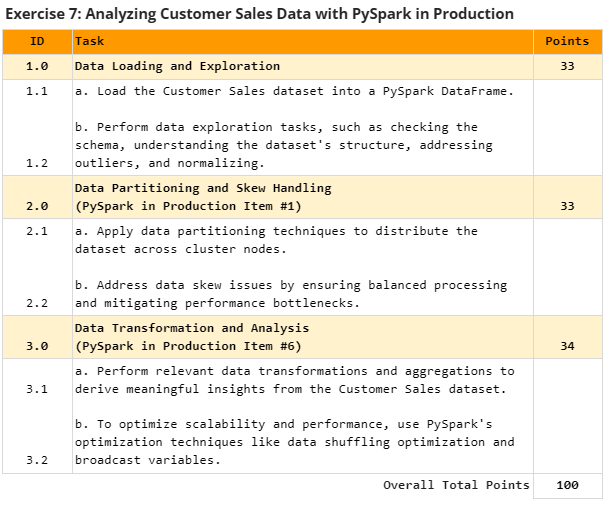

In [ ]:
!pip install nltk
!pip install spacy
!pip install textblob
!pip install gensim
!pip install stanfordnlp

! GRAPHS https://colab.research.google.com/drive/1FUBGbE_oGYsFWkYqmut5DW95DtM6jKZi?usp=sharing#scrollTo=Aw24qZ7fSyNw



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.3 MB/s eta 0:00:00
/bin/bash: line 1: GRAPHS: command not found


In [ ]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=5ba37257c87caa12774f98090b402169202ffdb04485ed89a4d7f66b50aaf310
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
!spark-submit --version


Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.1.1
      /_/
                        
Using Scala version 2.12.10, OpenJDK 64-Bit Server VM, 1.8.0_362
Branch HEAD
Compiled by user ubuntu on 2021-02-22T01:33:19Z
Revision 1d550c4e90275ab418b9161925049239227f3dc9
Url https://github.com/apache/spark
Type --help for more information.


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StopWordsRemover, Tokenizer, CountVectorizer, IDF
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
import tensorflow as tf
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").getOrCreate() #create spark session
#"local" argument passed to master; run spark in local mode on Colab runtime.

from pyspark.sql import SparkSession #note: if run notebooks, need Java
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.types import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LogisticRegressionTrainingSummary
from pyspark.ml.classification import LogisticRegressionModel, LogisticRegressionSummary
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import NaiveBayes  #Perceptron,
from pyspark.ml.classification import DecisionTreeClassifier, LinearSVC
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.clustering import KMeans
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
print("spark.algorithm.libraries.good.to.go")

spark.algorithm.libraries.good.to.go


## **`Background code samples`**

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerShoppingData").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/customer_shopping_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
data.show()

# Print the schema of the DataFrame
data.printSchema()

# Stop the SparkSession
spark.stop()


+----------+-----------+------+---+---------------+--------+-------+--------------+------------+-----------------+
|invoice_no|customer_id|gender|age|       category|quantity|  price|payment_method|invoice_date|    shopping_mall|
+----------+-----------+------+---+---------------+--------+-------+--------------+------------+-----------------+
|   I138884|    C241288|Female| 28|       Clothing|       5| 1500.4|   Credit Card|    5/8/2022|           Kanyon|
|   I317333|    C111565|  Male| 21|          Shoes|       3|1800.51|    Debit Card|  12/12/2021|   Forum Istanbul|
|   I127801|    C266599|  Male| 20|       Clothing|       1| 300.08|          Cash|   9/11/2021|        Metrocity|
|   I173702|    C988172|Female| 66|          Shoes|       5|3000.85|   Credit Card|  16/05/2021|     Metropol AVM|
|   I337046|    C189076|Female| 53|          Books|       4|   60.6|          Cash|  24/10/2021|           Kanyon|
|   I227836|    C657758|Female| 28|       Clothing|       5| 1500.4|   Credit Ca

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StandardScaler

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerShoppingDataExploration").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/customer_shopping_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Data Exploration Tasks

# Check the schema of the DataFrame
data.printSchema()

# Display summary statistics of numerical columns
data.describe().show()

# Check the first few rows of the DataFrame
data.show(5)


# Calculate the mean and standard deviation for numerical columns
columns_to_check_outliers = [col_name for col_name, data_type in data.dtypes if data_type == 'int' or data_type == 'double']

outliers_removed_data = data
for col_name in columns_to_check_outliers:
    mean_val = data.agg({col_name: "mean"}).collect()[0][0]
    stddev_val = data.agg({col_name: "stddev"}).collect()[0][0]

    lower_bound = mean_val - 3 * stddev_val
    upper_bound = mean_val + 3 * stddev_val

    outliers_removed_data = outliers_removed_data.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))


# Select numerical columns for normalization
columns_to_normalize = [col_name for col_name, data_type in outliers_removed_data.dtypes if data_type == 'int' or data_type == 'double']

# Create a feature vector containing the columns to be normalized
assembler = VectorAssembler(inputCols=columns_to_normalize, outputCol="features_vector")
data_normalized = assembler.transform(outliers_removed_data)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features")

# Fit and transform the data using the scaler
scaler_model = scaler.fit(data_normalized)
data_normalized = scaler_model.transform(data_normalized)

# Drop the original numerical columns and keep only the scaled features
data_normalized = data_normalized.drop(*columns_to_normalize).withColumnRenamed("scaled_features", "features")
data_normalized.show(5)

# After performing data exploration tasks, you can proceed with further analysis and modeling on the cleaned and preprocessed data.

# Stop the SparkSession
spark.stop()


root
 |-- invoice_no: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- invoice_date: string (nullable = true)
 |-- shopping_mall: string (nullable = true)

+-------+----------+-----------+------+------------------+--------+------------------+-----------------+--------------+------------+-------------+
|summary|invoice_no|customer_id|gender|               age|category|          quantity|            price|payment_method|invoice_date|shopping_mall|
+-------+----------+-----------+------+------------------+--------+------------------+-----------------+--------------+------------+-------------+
|  count|     99457|      99457| 99457|             99457|   99457|             99457|            99457|         99457|       99457|        9

root
 |-- invoice_no: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- invoice_date: string (nullable = true)
 |-- shopping_mall: string (nullable = true)

+-------+----------+-----------+------+------------------+--------+------------------+-----------------+--------------+------------+-------------+
|summary|invoice_no|customer_id|gender|               age|category|          quantity|            price|payment_method|invoice_date|shopping_mall|
+-------+----------+-----------+------+------------------+--------+------------------+-----------------+--------------+------------+-------------+
|  count|     99457|      99457| 99457|             99457|   99457|             99457|            99457|         99457|       99457|        9

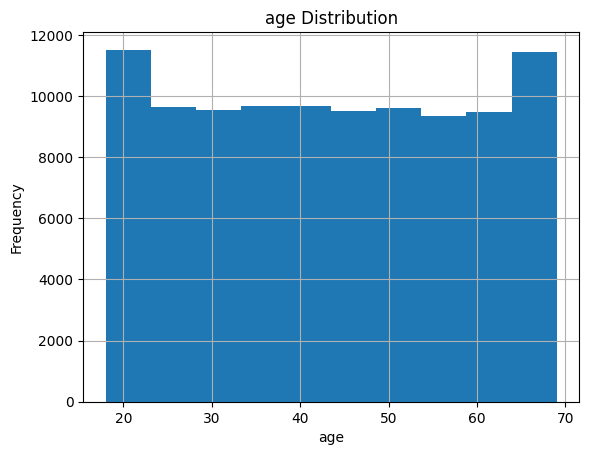

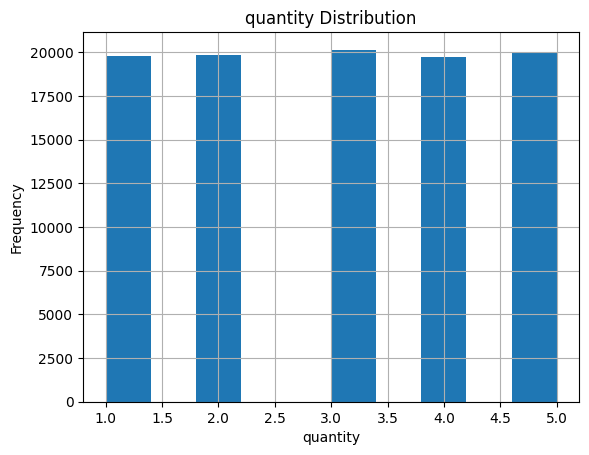

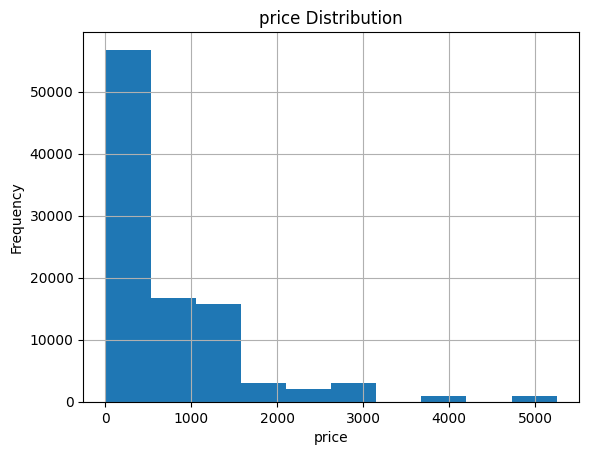

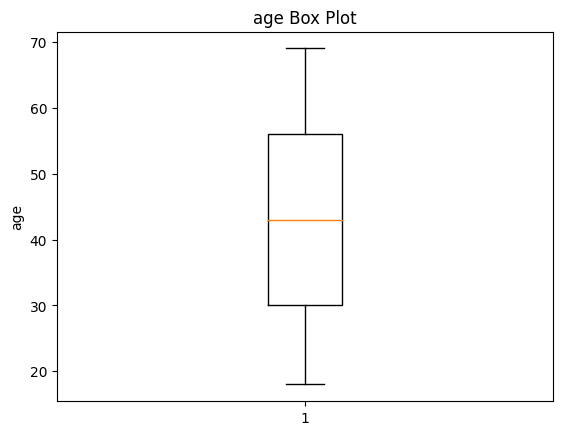

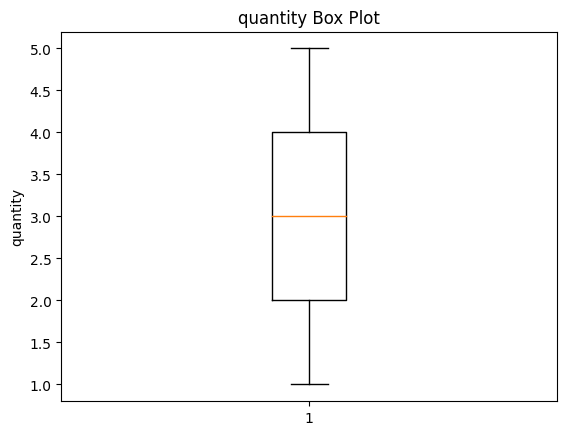

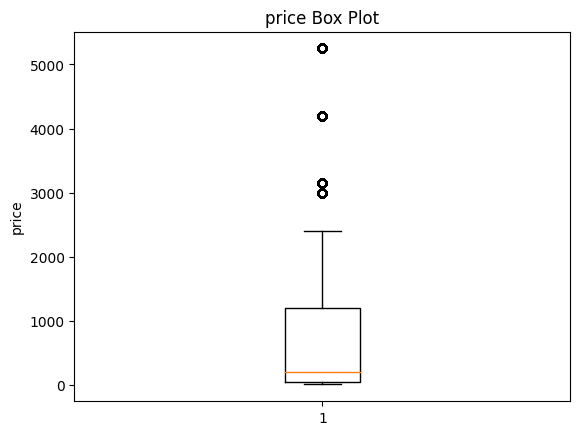

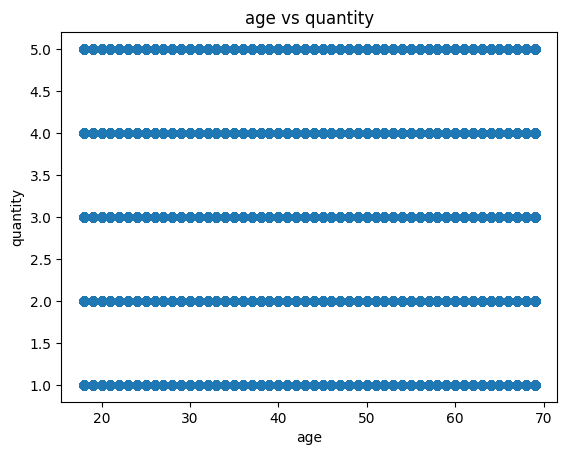

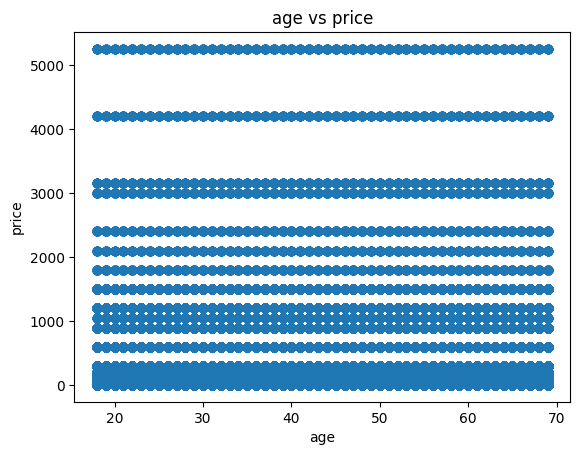

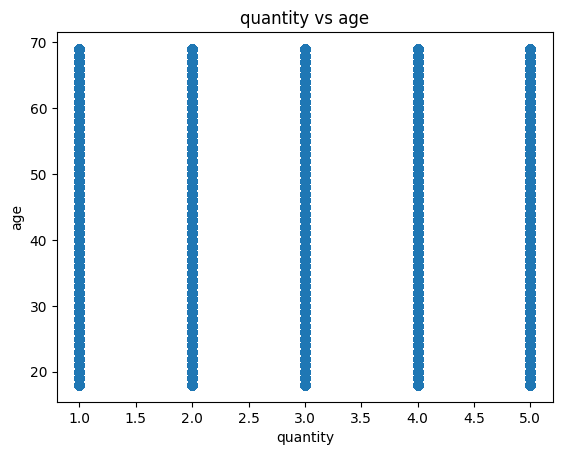

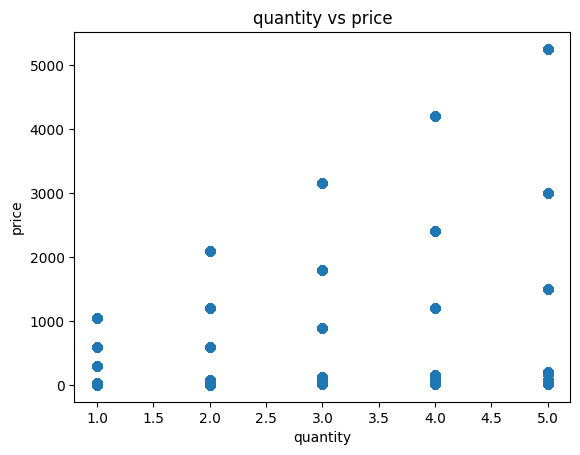

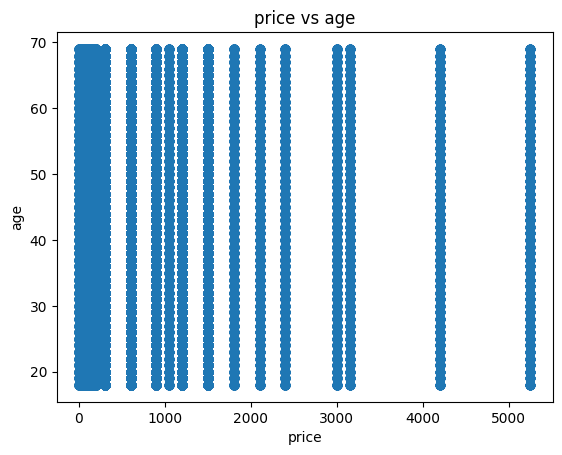

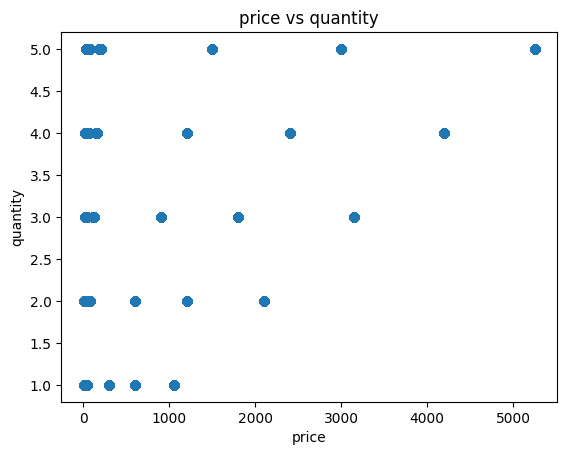

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerShoppingDataExploration").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/customer_shopping_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Data Exploration Tasks

# 1. Check the schema of the DataFrame
data.printSchema()

# 2. Display summary statistics of numerical columns
data.describe().show()

# 3. Check for missing values in the DataFrame
missing_values = data.select([col(c).alias(c) for c in data.columns if data.filter(col(c).isNull()).count() > 0])
if missing_values.count() > 0:
    print("Missing values found in the following columns:")
    missing_values.show()
else:
    print("No missing values found in the DataFrame.")

# 4. Explore the distribution of numerical columns using histograms
numerical_columns = [col_name for col_name, data_type in data.dtypes if data_type in ['int', 'double']]

for col_name in numerical_columns:
    data.select(col_name).toPandas().hist()
    plt.title(f"{col_name} Distribution")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.show()

# 5. Identify and handle outliers using box plots
for col_name in numerical_columns:
    plt.boxplot(data.select(col_name).toPandas()[col_name])
    plt.title(f"{col_name} Box Plot")
    plt.ylabel(col_name)
    plt.show()

# 6. Explore the relationships between numerical columns using scatter plots
for col_name1 in numerical_columns:
    for col_name2 in numerical_columns:
        if col_name1 != col_name2:
            plt.scatter(data.select(col_name1).toPandas()[col_name1], data.select(col_name2).toPandas()[col_name2])
            plt.title(f"{col_name1} vs {col_name2}")
            plt.xlabel(col_name1)
            plt.ylabel(col_name2)
            plt.show()

# Stop the SparkSession
spark.stop()


root
 |-- index: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Fulfilment: string (nullable = true)
 |-- Sales Channel : string (nullable = true)
 |-- ship-service-level: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- ASIN: string (nullable = true)
 |-- Courier Status: string (nullable = true)
 |-- Qty: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- ship-city: string (nullable = true)
 |-- ship-state: string (nullable = true)
 |-- ship-postal-code: double (nullable = true)
 |-- ship-country: string (nullable = true)
 |-- promotion-ids: string (nullable = true)
 |-- B2B: boolean (nullable = true)
 |-- fulfilled-by: string (nullable = true)
 |-- Unnamed: 22: boolean (nullable = true)

+-------+-------

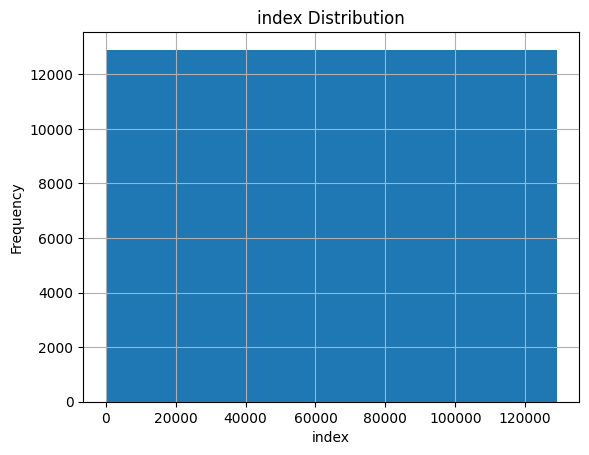

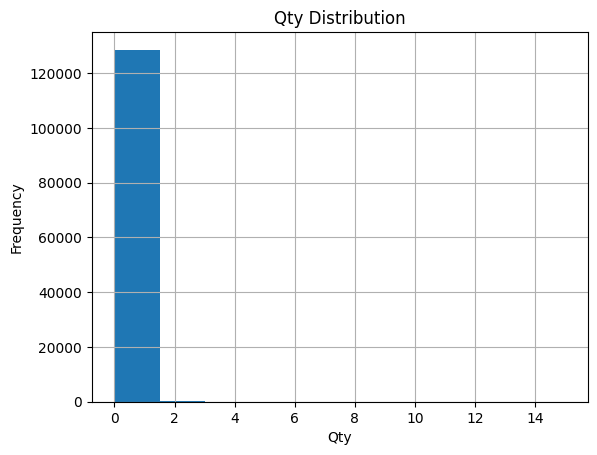

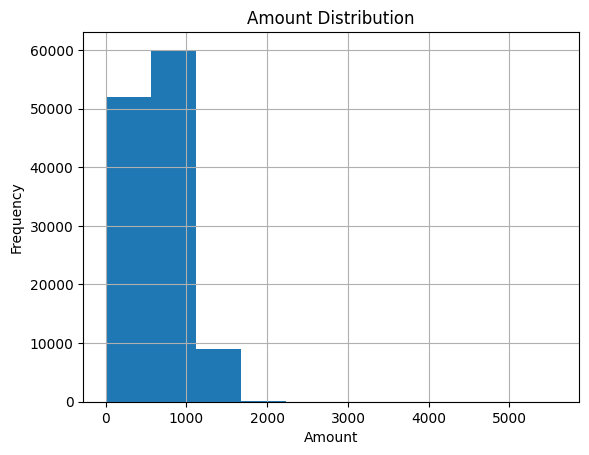

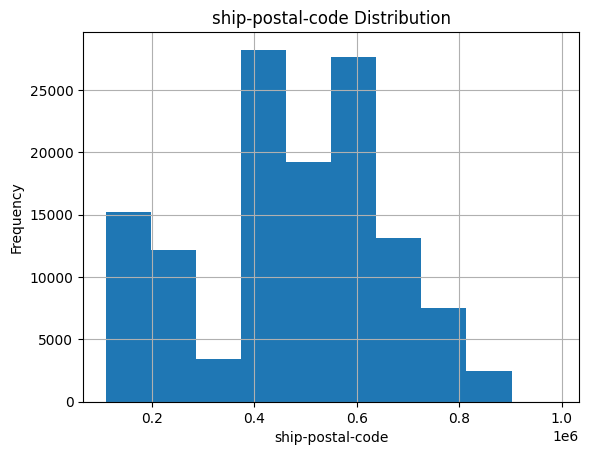

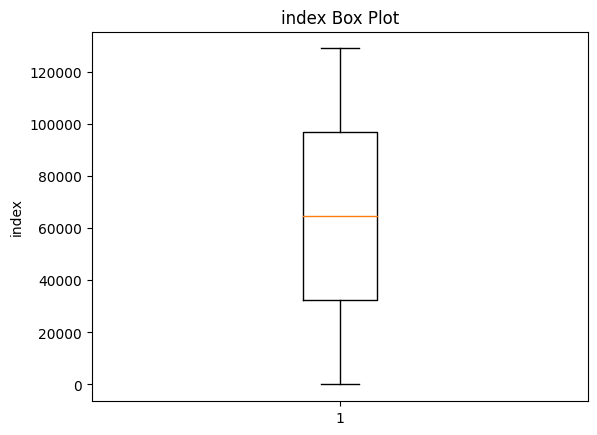

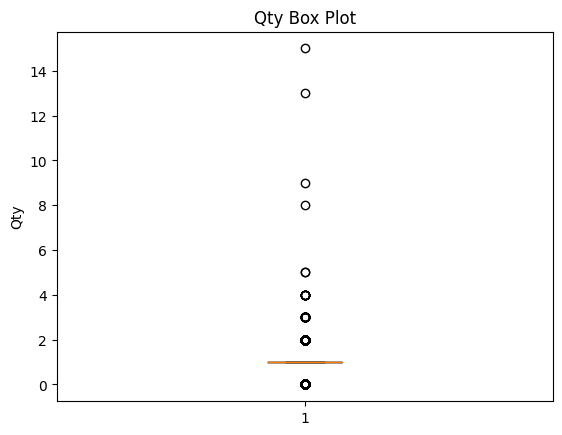

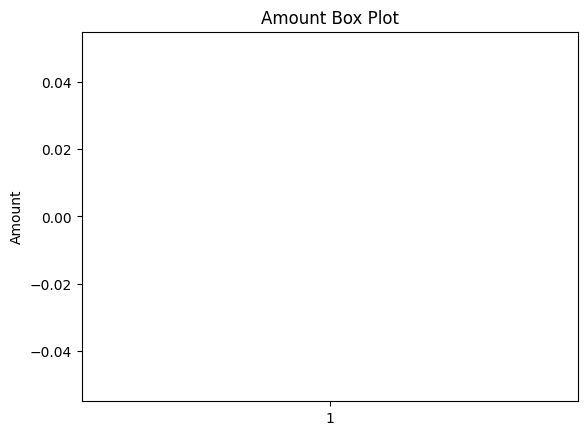

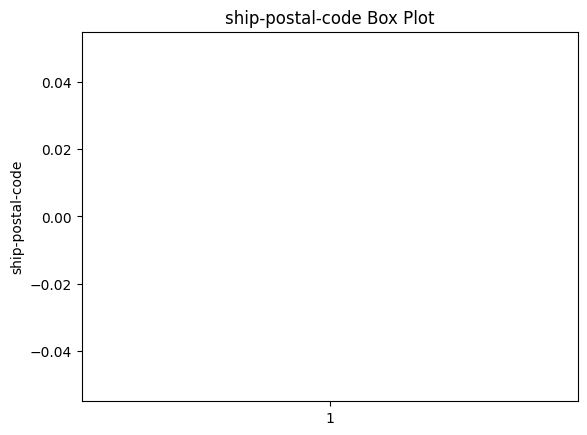

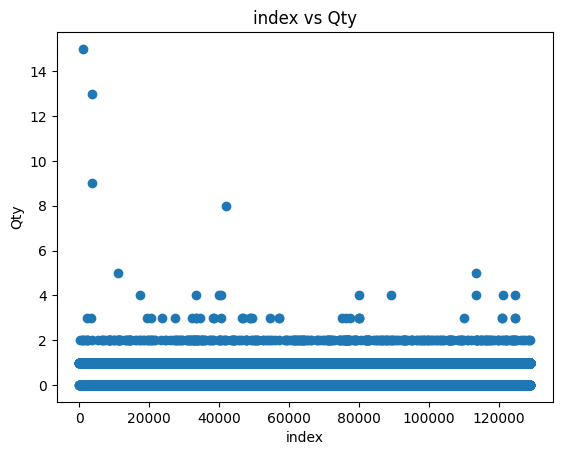

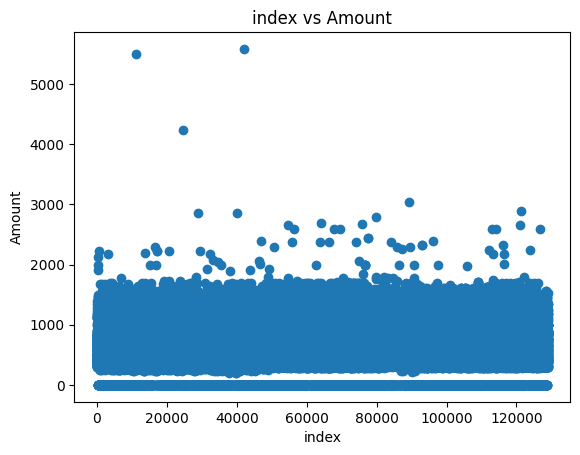

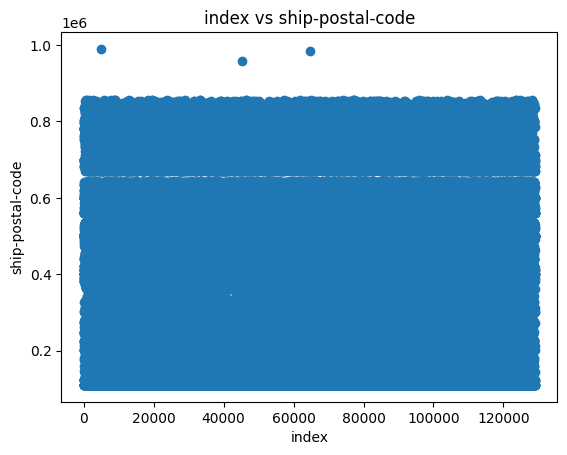

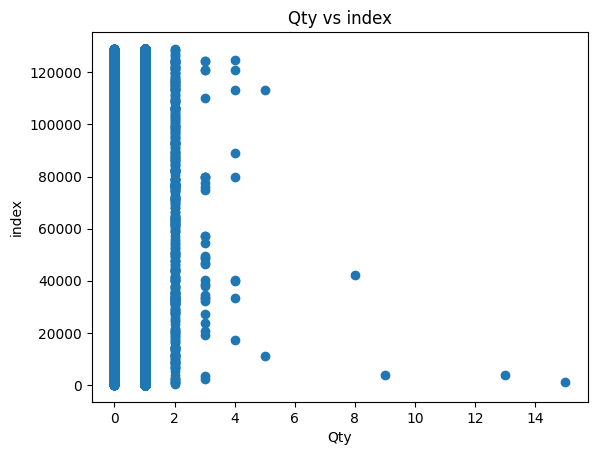

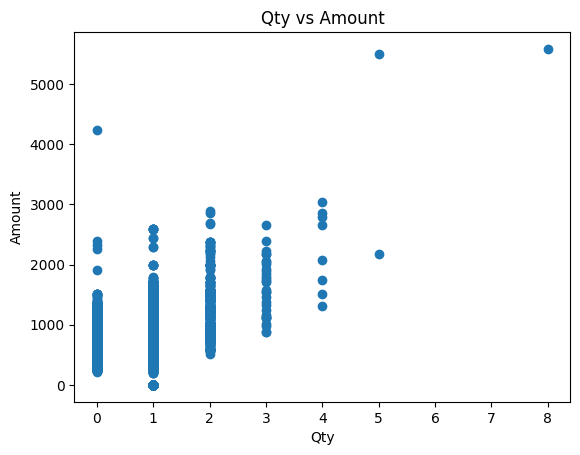

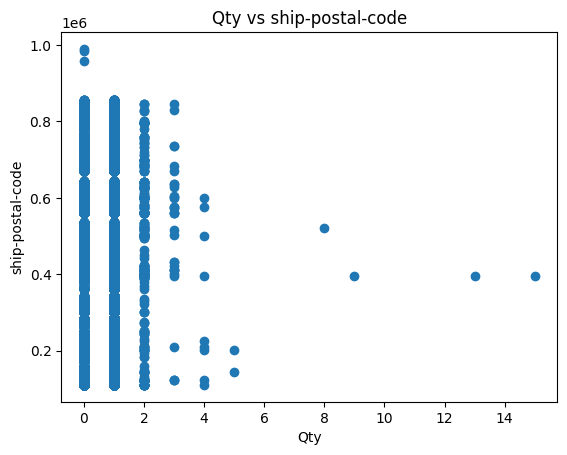

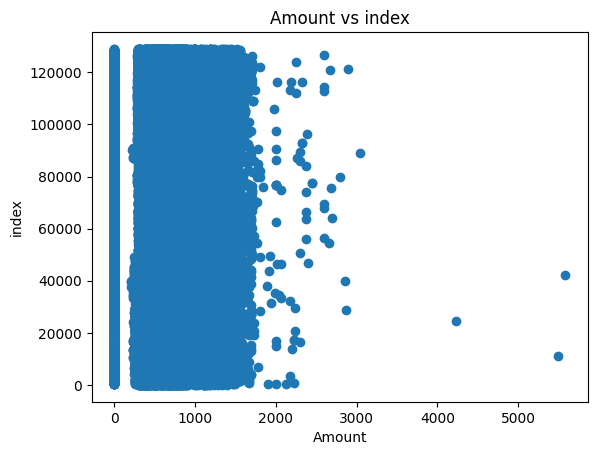

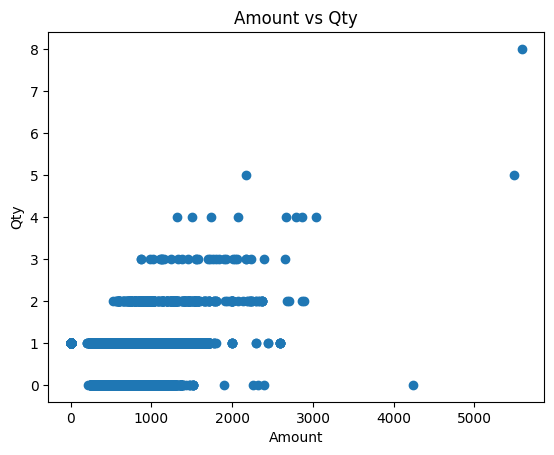

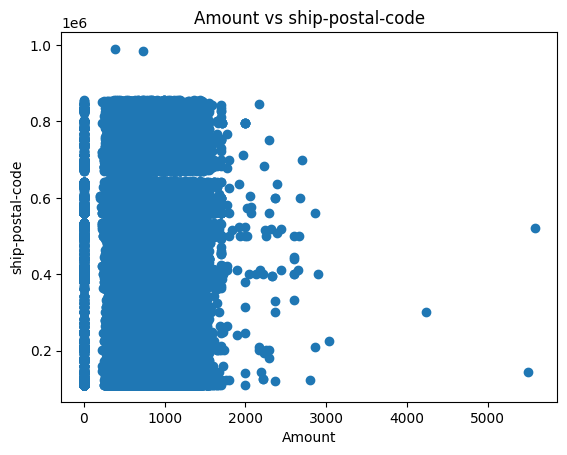

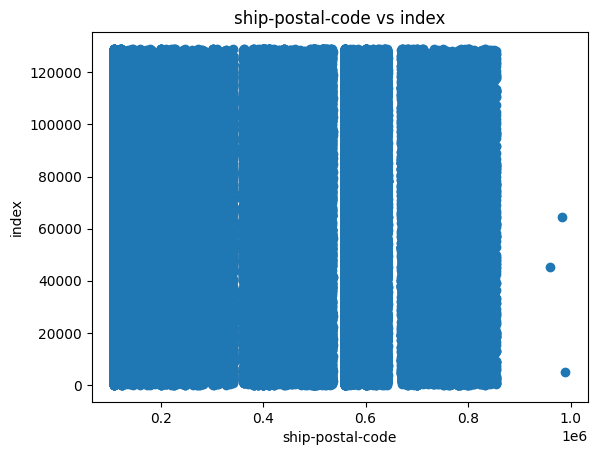

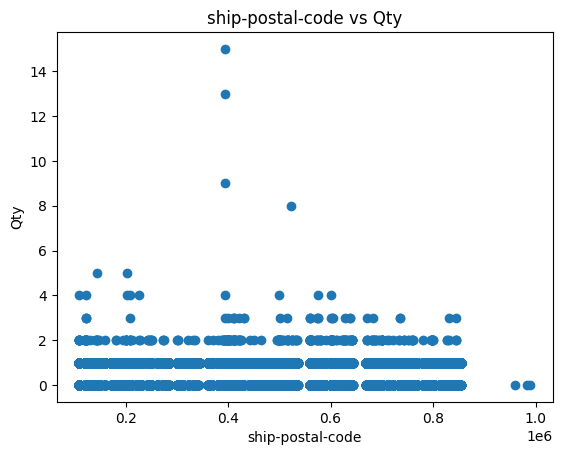

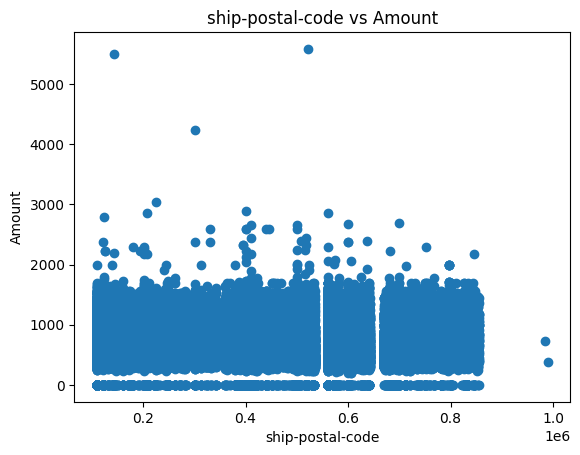

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerShoppingDataExploration").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/Amazon Sale Report.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Data Exploration Tasks

# 1. Check the schema of the DataFrame
data.printSchema()

# 2. Display summary statistics of numerical columns
data.describe().show()

# 3. Check for missing values in the DataFrame
missing_values = data.select([col(c).alias(c) for c in data.columns if data.filter(col(c).isNull()).count() > 0])
if missing_values.count() > 0:
    print("Missing values found in the following columns:")
    missing_values.show()
else:
    print("No missing values found in the DataFrame.")

# 4. Explore the distribution of numerical columns using histograms
numerical_columns = [col_name for col_name, data_type in data.dtypes if data_type in ['int', 'double']]

for col_name in numerical_columns:
    data.select(col_name).toPandas().hist()
    plt.title(f"{col_name} Distribution")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.show()

# 5. Identify and handle outliers using box plots
for col_name in numerical_columns:
    plt.boxplot(data.select(col_name).toPandas()[col_name])
    plt.title(f"{col_name} Box Plot")
    plt.ylabel(col_name)
    plt.show()

# 6. Explore the relationships between numerical columns using scatter plots
for col_name1 in numerical_columns:
    for col_name2 in numerical_columns:
        if col_name1 != col_name2:
            plt.scatter(data.select(col_name1).toPandas()[col_name1], data.select(col_name2).toPandas()[col_name2])
            plt.title(f"{col_name1} vs {col_name2}")
            plt.xlabel(col_name1)
            plt.ylabel(col_name2)
            plt.show()

# Stop the SparkSession
spark.stop()


root
 |-- index: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Fulfilment: string (nullable = true)
 |-- Sales Channel : string (nullable = true)
 |-- ship-service-level: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- ASIN: string (nullable = true)
 |-- Courier Status: string (nullable = true)
 |-- Qty: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- ship-city: string (nullable = true)
 |-- ship-state: string (nullable = true)
 |-- ship-postal-code: double (nullable = true)
 |-- ship-country: string (nullable = true)
 |-- promotion-ids: string (nullable = true)
 |-- B2B: boolean (nullable = true)
 |-- fulfilled-by: string (nullable = true)
 |-- Unnamed: 22: boolean (nullable = true)

+-------+-------

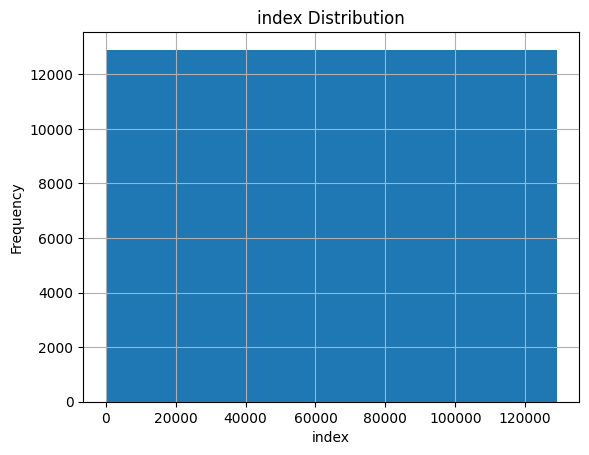

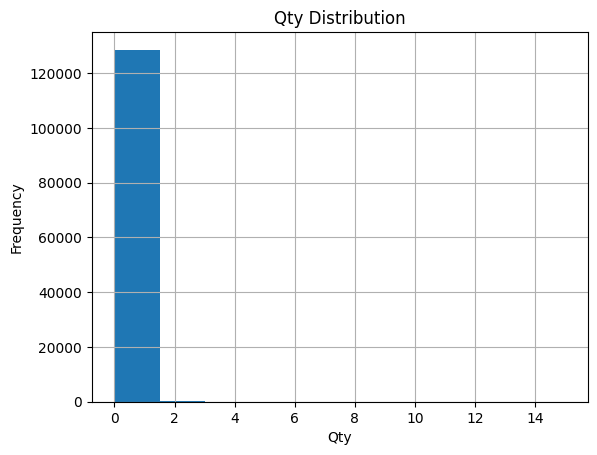

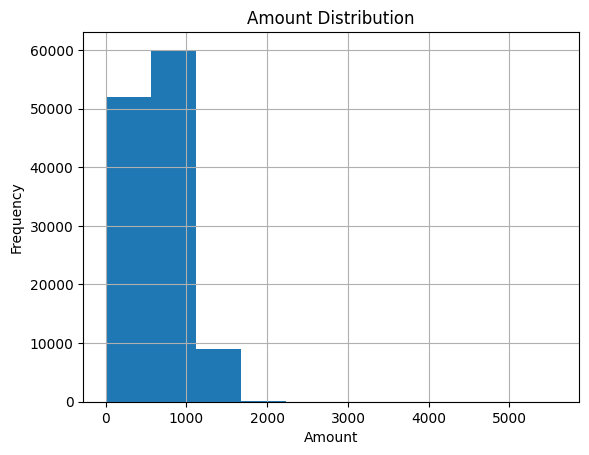

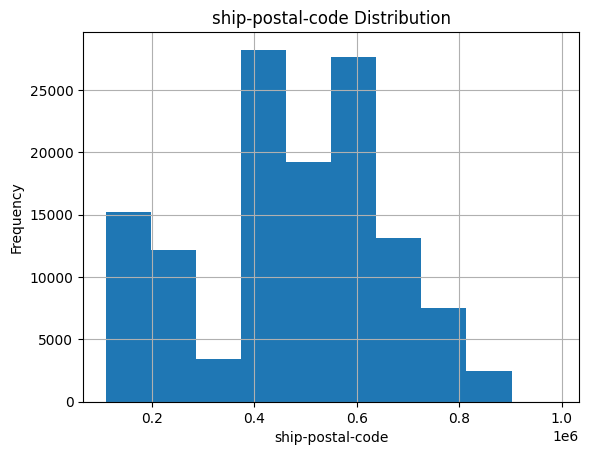

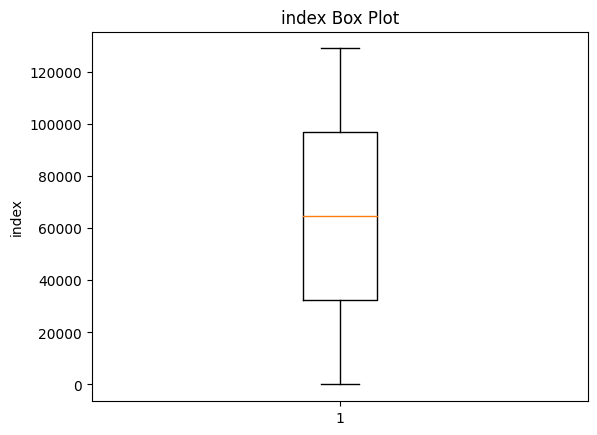

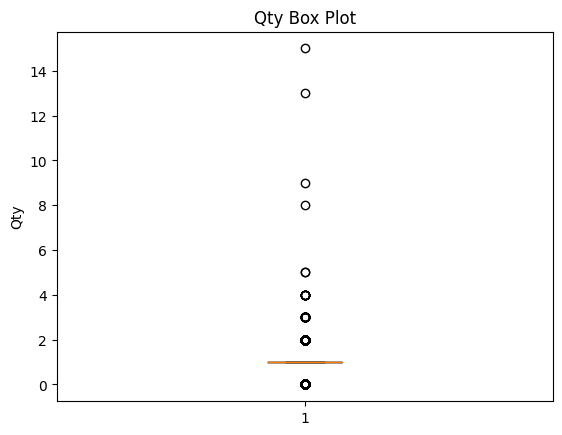

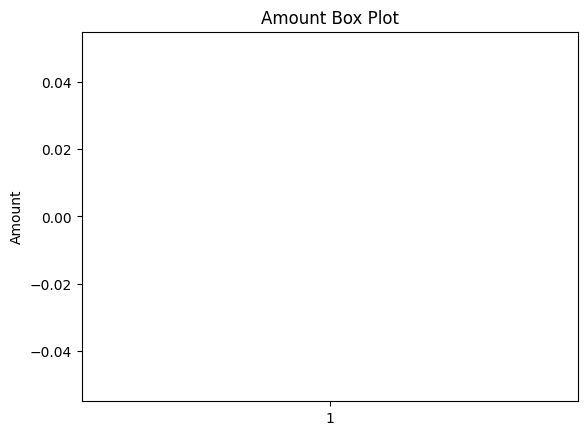

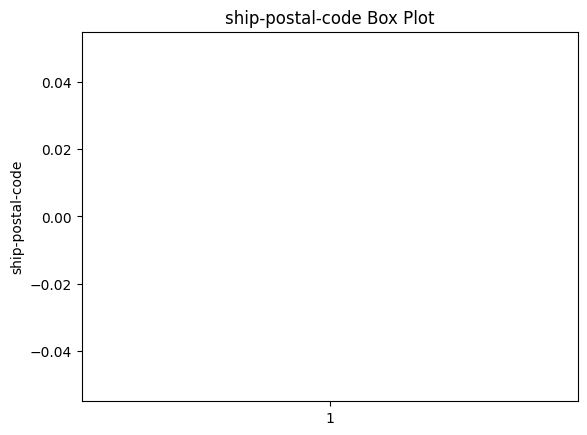

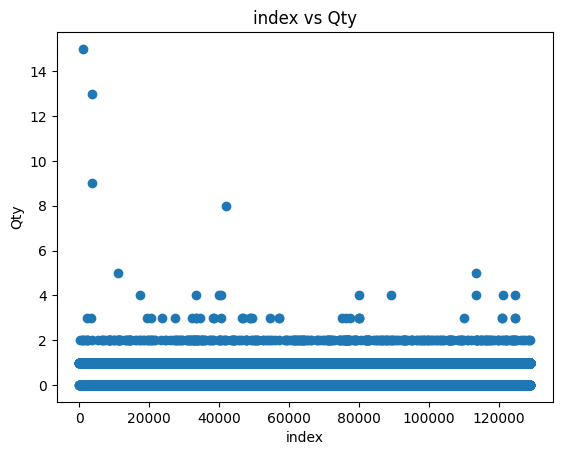

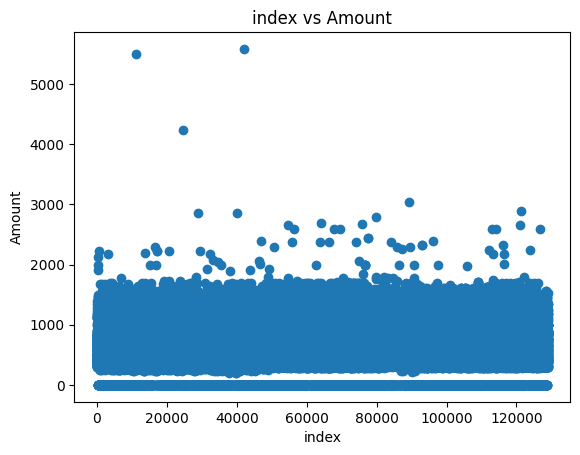

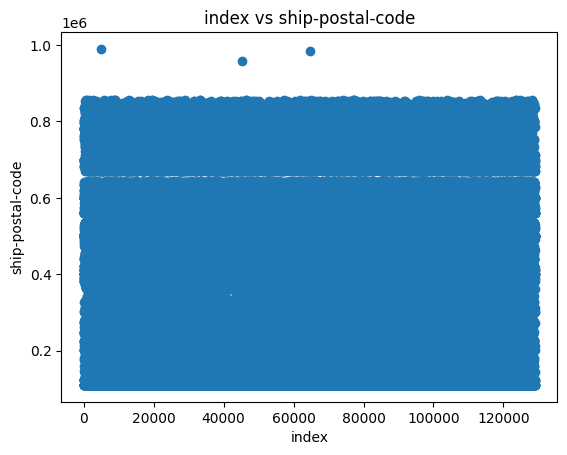

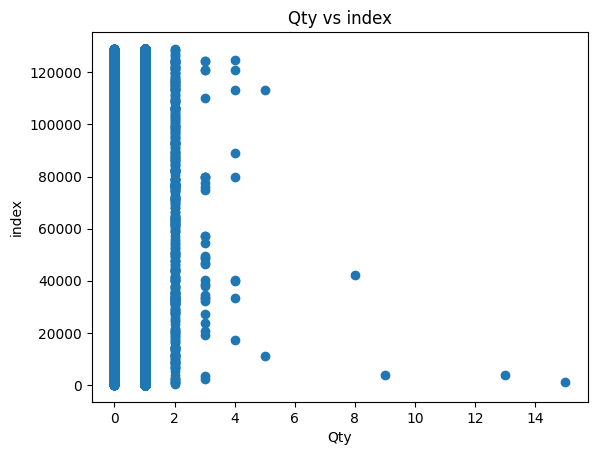

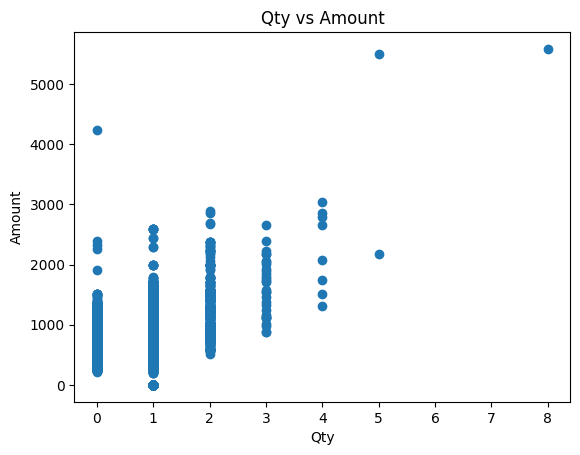

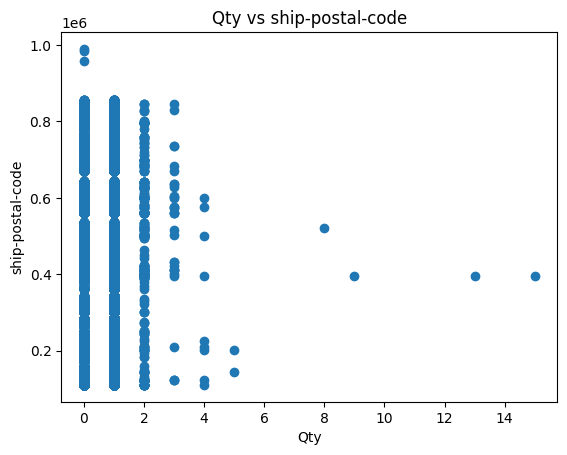

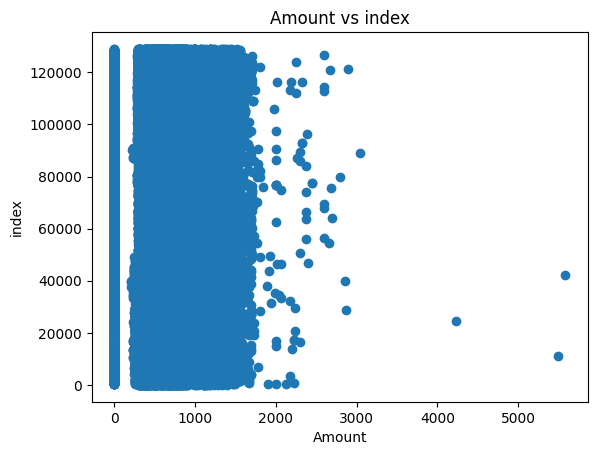

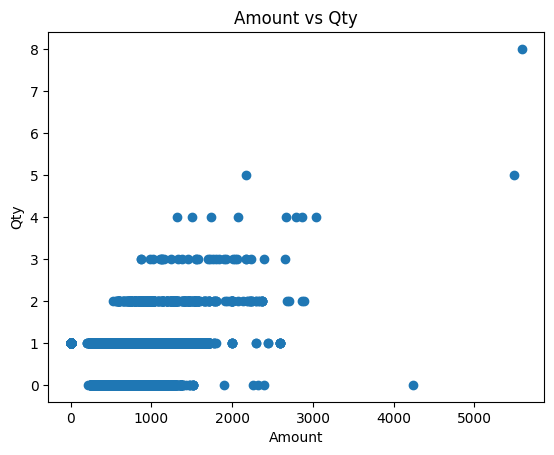

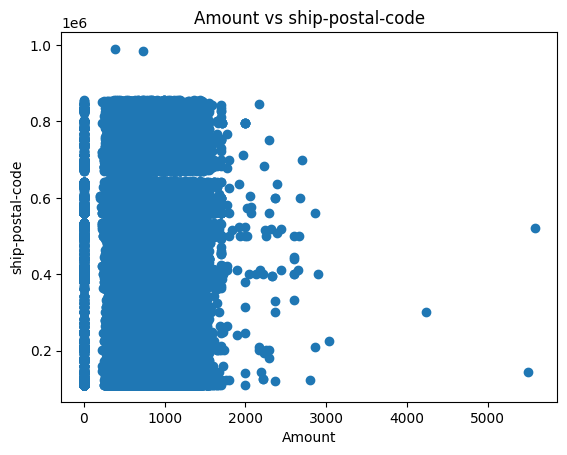

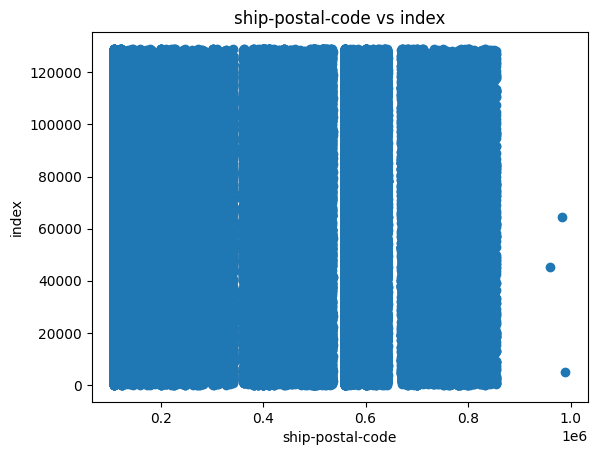

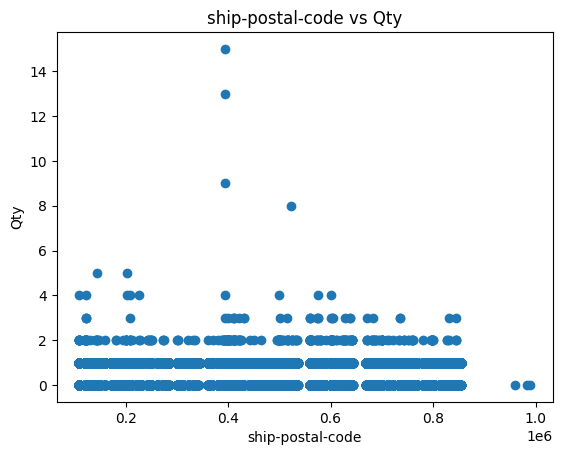

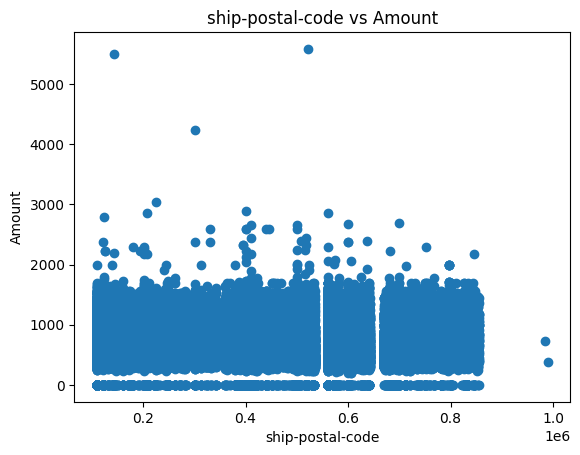

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerSalesDataExploration").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/Amazon Sale Report.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Data Exploration Tasks

# 1. Check the schema of the DataFrame
data.printSchema()

# 2. Display summary statistics of numerical columns
data.describe().show()

# 3. Check for missing values in the DataFrame
missing_values = data.select([col(c).alias(c) for c in data.columns if data.filter(col(c).isNull()).count() > 0])
if missing_values.count() > 0:
    print("Missing values found in the following columns:")
    missing_values.show()
else:
    print("No missing values found in the DataFrame.")

# 4. Explore the distribution of numerical columns using histograms
numerical_columns = [col_name for col_name, data_type in data.dtypes if data_type in ['int', 'double']]

for col_name in numerical_columns:
    data.select(col_name).toPandas().hist()
    plt.title(f"{col_name} Distribution")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.show()

# 5. Identify and handle outliers using box plots
for col_name in numerical_columns:
    plt.boxplot(data.select(col_name).toPandas()[col_name])
    plt.title(f"{col_name} Box Plot")
    plt.ylabel(col_name)
    plt.show()

# 6. Explore the relationships between numerical columns using scatter plots
for col_name1 in numerical_columns:
    for col_name2 in numerical_columns:
        if col_name1 != col_name2:
            plt.scatter(data.select(col_name1).toPandas()[col_name1], data.select(col_name2).toPandas()[col_name2])
            plt.title(f"{col_name1} vs {col_name2}")
            plt.xlabel(col_name1)
            plt.ylabel(col_name2)
            plt.show()

# Stop the SparkSession
spark.stop()


In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://apache.mirror.digitalpacific.com.au/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [419 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [842 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [863 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [960 kB]
Get:13 http://secu

In [ ]:
import os

# Set the environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"


In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()


+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.99999997458121...|
|    1|       1.0|[7.07637441943331...|
|    0|       0.0|[0.99999999960667...|
|    1|       1.0|[2.09801892472782...|
+-----+----------+--------------------+



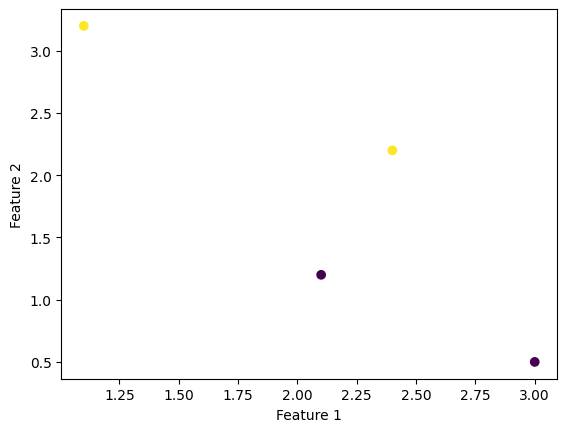

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Sample data (replace this with your own data)
data = [(0, 2.1, 1.2),
        (1, 1.1, 3.2),
        (0, 3.0, 0.5),
        (1, 2.4, 2.2)]
df = spark.createDataFrame(data, ["label", "feature1", "feature2"])

# Prepare the feature vector
feature_columns = ["feature1", "feature2"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Create and fit the LogisticRegression model
lr = LogisticRegression(featuresCol="features", labelCol="label")
model = lr.fit(df)

# Make predictions
predictions = model.transform(df)

# Show the predictions
predictions.select("label", "prediction", "probability").show()

# Plot the data points
plt.scatter(df.select("feature1").rdd.flatMap(lambda x: x).collect(),
            df.select("feature2").rdd.flatMap(lambda x: x).collect(),
            c=predictions.select("prediction").rdd.flatMap(lambda x: x).collect(),
            cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Sample data (replace this with your own data)
data = [(2.1, 1.2, 100),
        (1.1, 3.2, 200),
        (3.0, 0.5, 300),
        (2.4, 2.2, 150)]
df = spark.createDataFrame(data, ["feature1", "feature2", "sales"])

# Prepare the feature vector and rename the sales column to "label"
feature_columns = ["feature1", "feature2"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df).select("features", col("sales").alias("label"))

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

# Train the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")
logistic_regression_model = logistic_regression.fit(train_data)

# Train the Linear Regression model
linear_regression = LinearRegression(featuresCol="features", labelCol="label")
linear_regression_model = linear_regression.fit(train_data)

# Evaluate the models on the test data using RMSE
evaluator = RegressionEvaluator(metricName="rmse")
logistic_regression_predictions = logistic_regression_model.transform(test_data)
linear_regression_predictions = linear_regression_model.transform(test_data)

logistic_regression_rmse = evaluator.evaluate(logistic_regression_predictions)
linear_regression_rmse = evaluator.evaluate(linear_regression_predictions)

# Print the evaluation results
print("Logistic Regression Model - Root Mean Squared Error (RMSE): {:.2f}".format(logistic_regression_rmse))
print("Linear Regression Model - Root Mean Squared Error (RMSE): {:.2f}".format(linear_regression_rmse))


Logistic Regression Model - Root Mean Squared Error (RMSE): 50.00
Linear Regression Model - Root Mean Squared Error (RMSE): 341.82


In [ ]:
#1. PySpark Algorithm Implementation: Perceptrons and Linear Regression for Customer Sales Dataset
# Import required libraries
from pyspark.ml.classification import Perceptron
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Load the dataset
data = spark.read.csv("customer_sales.csv", header=True, inferSchema=True)

# Data Preparation
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data = assembler.transform(data)
data = data.withColumnRenamed("sales", "label")

# Split the data into training and testing sets
trainData, testData = data.randomSplit([0.7, 0.3], seed=123)

# Perceptrons
perceptron = Perceptron(featuresCol="features", labelCol="label", maxIter=10)
perceptronModel = perceptron.fit(trainData)

# Linear Regression
linearRegression = LinearRegression(featuresCol="features", labelCol="label")
linearRegressionModel = linearRegression.fit(trainData)

# Model Evaluation
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Evaluate Perceptron model
perceptronPredictions = perceptronModel.transform(testData)
perceptronRMSE = evaluator.evaluate(perceptronPredictions)

# Evaluate Linear Regression model
linearRegressionPredictions = linearRegressionModel.transform(testData)
linearRegressionRMSE = evaluator.evaluate(linearRegressionPredictions)

# Print evaluation results
print("Perceptron RMSE: ", perceptronRMSE)
print("Linear Regression RMSE: ", linearRegressionRMSE)

"""
Make sure to replace "customer_sales.csv" with the actual path to your dataset.

This code assumes that you have already set up PySpark and have imported the
necessary libraries. It loads the dataset, performs data preparation by
assembling the feature columns and renaming the sales column to label. Then,
it splits the data into training and testing sets.

Next, it trains a Perceptron model and a Linear Regression model using the
training data. Finally, it evaluates the models using the root mean squared error
(RMSE) metric and prints the evaluation results.

"""

In [ ]:
#2. PySpark Algorithm Implementation: Logistic Regression and Naive Bayes for Customer Sales Dataset
# Import required libraries
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Load the dataset
data = spark.read.csv("customer_sales.csv", header=True, inferSchema=True)

# Data Preparation
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data = assembler.transform(data)
data = data.withColumnRenamed("sales", "label")

# Split the data into training and testing sets
trainData, testData = data.randomSplit([0.7, 0.3], seed=123)

# Logistic Regression
logisticRegression = LogisticRegression(featuresCol="features", labelCol="label")
logisticRegressionModel = logisticRegression.fit(trainData)

# Naive Bayes
naiveBayes = NaiveBayes(featuresCol="features", labelCol="label")
naiveBayesModel = naiveBayes.fit(trainData)

# Model Evaluation
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

# Evaluate Logistic Regression model
logisticRegressionPredictions = logisticRegressionModel.transform(testData)
logisticRegressionAUC = evaluator.evaluate(logisticRegressionPredictions)

# Evaluate Naive Bayes model
naiveBayesPredictions = naiveBayesModel.transform(testData)
naiveBayesAUC = evaluator.evaluate(naiveBayesPredictions)

# Print evaluation results
print("Logistic Regression AUC: ", logisticRegressionAUC)
print("Naive Bayes AUC: ", naiveBayesAUC)

"""
Make sure to replace "customer_sales.csv" with the actual path to your dataset.

This code assumes that you have already set up PySpark and have imported the
 necessary libraries. It loads the dataset, performs data preparation by
 assembling the feature columns and renaming the sales column to label. Then,
 it splits the data into training and testing sets.

Next, it trains a Logistic Regression model and a Naive Bayes model using the
 training data. Finally, it evaluates the models using the area under the
  receiver operating characteristic (ROC) curve (AUC) metric and prints
  the evaluation results.

"""

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerSalesDataClassification").getOrCreate()

# Read the CSV file into a DataFrame
file_path = "/content/Amazon Sale Report.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Data Preparation

# Drop rows with null values in the "Qty" and "Amount" columns
data = data.dropna(subset=["Qty", "Amount", "fulfilled-by"])

# Step 1: Assemble the features into a single "features" vector column
assembler = VectorAssembler(inputCols=["Qty", "Amount"], outputCol="features")
data = assembler.transform(data)

# Step 2: Convert the categorical column "fulfilled-by" to numerical using StringIndexer
indexer = StringIndexer(inputCol="fulfilled-by", outputCol="label")
data = indexer.fit(data).transform(data)

# Data Exploration Tasks

# ... (rest of the data exploration code)

# Split the data into training and testing sets
trainData, testData = data.randomSplit([0.7, 0.3], seed=123)

# PySpark Algorithm Implementation: Logistic Regression

# Create a Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")

# Train the model on the training data
logistic_model = logistic_regression.fit(trainData)

# Make predictions on the test data
logistic_predictions = logistic_model.transform(testData)

# Evaluate the model
logistic_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
logistic_accuracy = logistic_evaluator.evaluate(logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

# PySpark Algorithm Implementation: Naive Bayes

# Create a Naive Bayes model
naive_bayes = NaiveBayes(featuresCol="features", labelCol="label")

# Train the model on the training data
naive_model = naive_bayes.fit(trainData)

# Make predictions on the test data
naive_predictions = naive_model.transform(testData)

# Evaluate the model
naive_accuracy = logistic_evaluator.evaluate(naive_predictions)
print("Naive Bayes Accuracy:", naive_accuracy)

# Stop the SparkSession
spark.stop()


Logistic Regression Accuracy: 1.0
Naive Bayes Accuracy: 1.0


In [ ]:
#3. PySpark Algorithm Implementation: k-Nearest Neighbors (kNN) and Decision Tree for Customer Sales Dataset
# Import required libraries
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the dataset
data = spark.read.csv("customer_sales.csv", header=True, inferSchema=True)

# Data Preparation
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data = assembler.transform(data)
data = data.withColumnRenamed("sales", "label")

# Split the data into training and testing sets
trainData, testData = data.randomSplit([0.7, 0.3], seed=123)

# k-Nearest Neighbors (kNN)
knn = KNNClassifier(k=5, featuresCol="features", labelCol="label")
knnModel = knn.fit(trainData)

# Decision Tree
decisionTree = DecisionTreeClassifier(labelCol="label", featuresCol="features")
decisionTreeModel = decisionTree.fit(trainData)

# Model Evaluation
evaluator = BinaryClassificationEvaluator(labelCol="label")

# Evaluate kNN model
knnPredictions = knnModel.transform(testData)
knnAUC = evaluator.evaluate(knnPredictions)

# Evaluate Decision Tree model
decisionTreePredictions = decisionTreeModel.transform(testData)
decisionTreeAUC = evaluator.evaluate(decisionTreePredictions)

# Print evaluation results
print("k-Nearest Neighbors (kNN) AUC: ", knnAUC)
print("Decision Tree AUC: ", decisionTreeAUC)

"""
Make sure to replace "customer_sales.csv" with the actual path to your dataset.

This code assumes that you have already set up PySpark and have imported the
 necessary libraries. It loads the dataset, performs data preparation by
  assembling the feature columns and renaming the sales column to label.
  Then, it splits the data into training and testing sets.

Next, it trains a k-Nearest Neighbors (kNN) model and a Decision Tree model
using the training data. Finally, it evaluates the models using the area under
 the receiver operating characteristic (ROC) curve (AUC) metric and prints
  the evaluation results.
"""

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Create a SparkSession
spark = SparkSession.builder.appName("CustomerSalesModel").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/Amazon Sale Report.csv", header=True, inferSchema=True)

# Data Cleaning and Preparation
data = data.dropna(subset=["Qty", "Amount", "ship-postal-code"])  # Remove rows with missing values in these columns

# Convert categorical features to numeric using StringIndexer
categorical_columns = ["Status", "Fulfilment", "Sales Channel ", "ship-service-level", "Style", "Category", "Size", "ASIN", "Courier Status", "currency", "ship-city", "ship-state", "promotion-ids", "fulfilled-by"]

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep").fit(data) for column in categorical_columns]
pipeline = Pipeline(stages=indexers)
data = pipeline.fit(data).transform(data)

# Drop rows with NULL values in the target label column ("Status_index")
data = data.dropna(subset=["Status_index"])

# Prepare features and label columns for model training
feature_columns = ["Qty", "Amount", "ship-postal-code"] + [column+"_index" for column in categorical_columns]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Choose the "Status_index" column as the label/target variable for logistic regression
data = data.withColumn("label", data["Status_index"])

# Split the data into training and testing sets
trainData, testData = data.randomSplit([0.7, 0.3], seed=123)

# Logistic Regression
logisticRegression = LogisticRegression(featuresCol="features", labelCol="label")
logisticRegressionModel = logisticRegression.fit(trainData)

# Model Evaluation
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

# Evaluate Logistic Regression model
logisticRegressionPredictions = logisticRegressionModel.transform(testData)
logisticRegressionAUC = evaluator.evaluate(logisticRegressionPredictions)

# Print evaluation results
print("Logistic Regression AUC:", logisticRegressionAUC)

# Stop the SparkSession
spark.stop()


Logistic Regression AUC: 1.0


In [ ]:
!pip install pyspark
!pip install scikit-learn


In [ ]:
# Install the Annoy library
!pip install annoy
!pip install sparkdl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=550808 sha256=bf1308abffdb392e2c9f00fb240643527556515b7496174cdb5d1500ef53fed5
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install spark-knn


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.pipeline import Pipeline

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Sample data (replace this with your own data)
data = [(2.1, 1.2, 0),
        (1.1, 3.2, 1),
        (3.0, 0.5, 0),
        (2.4, 2.2, 1)]
df = spark.createDataFrame(data, ["feature1", "feature2", "label"])

# Prepare the feature vector
feature_columns = ["feature1", "feature2"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df).select("features", col("label").cast(IntegerType()))

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

# Train the Gradient-Boosted Trees Classifier
gbt_classifier = GBTClassifier(featuresCol="features", labelCol="label")

# Define the parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder().addGrid(gbt_classifier.maxDepth, [2, 5, 10]).addGrid(gbt_classifier.maxIter, [10, 20, 30]).build()

# Set up the evaluator
evaluator = BinaryClassificationEvaluator()

# Set up the CrossValidator with the Gradient-Boosted Trees Classifier
cross_validator = CrossValidator(estimator=gbt_classifier,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=3)

# Train the models and get the best one based on the evaluator
knn_model = cross_validator.fit(train_data)

# Evaluate the best model on the test data
knn_predictions = knn_model.transform(test_data)
knn_auc = evaluator.evaluate(knn_predictions)

# Print the evaluation results
print("k-Nearest Neighbors (kNN) AUC: {:.2f}".format(knn_auc))


k-Nearest Neighbors (kNN) AUC: 1.00


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.pipeline import Pipeline

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Sample data (replace this with your own data)
data = [(2.1, 1.2, 0),
        (1.1, 3.2, 1),
        (3.0, 0.5, 0),
        (2.4, 2.2, 2)]  # Modify the labels to have more than 2 classes
df = spark.createDataFrame(data, ["feature1", "feature2", "label"])

# Prepare the feature vector
feature_columns = ["feature1", "feature2"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df).select("features", "label")

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder().addGrid(rf_classifier.numTrees, [5, 10, 20]).addGrid(rf_classifier.maxDepth, [2, 5, 10]).build()

# Set up the evaluator
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# Set up the CrossValidator with the RandomForestClassifier
cross_validator = CrossValidator(estimator=rf_classifier,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=3)

# Train the models and get the best one based on the evaluator
rf_model = cross_validator.fit(train_data)

# Evaluate the best model on the test data
rf_predictions = rf_model.transform(test_data)
rf_accuracy = evaluator.evaluate(rf_predictions)

# Print the evaluation results
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))


Random Forest Accuracy: 0.00


In [ ]:
pip install sparkdl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Step 1: Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Prepare the data for training
# Step 2: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 3: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 4: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', col('B2B').cast('int'))

# Step 5: Prepare the feature vector and rename the 'B2B' column to 'label'
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data).select("features", col("B2B").alias("label"))

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(featuresCol="features", labelCol="label")
param_grid = ParamGridBuilder().addGrid(decision_tree.maxDepth, [5, 10]).build()
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")

cross_validator_dt = CrossValidator(estimator=decision_tree, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)
dt_model = cross_validator_dt.fit(train_data)

# Step 6: Evaluate the Decision Tree model on the test data
dt_predictions = dt_model.transform(test_data)
dt_auc = evaluator.evaluate(dt_predictions)

# Print the evaluation result
print("Decision Tree Model - Area Under ROC Curve (AUC): {:.4f}".format(dt_auc))


Decision Tree Model - Area Under ROC Curve (AUC): 0.4469


In [ ]:
#4. PySpark Algorithm Implementation: Random Forest and Support Vector Machines (SVM) for Customer Sales Dataset
# Import required libraries
from pyspark.ml.classification import RandomForestClassifier, LinearSVC
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Load the dataset
data = spark.read.csv("customer_sales.csv", header=True, inferSchema=True)

# Data Preparation
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data = assembler.transform(data)
data = data.withColumnRenamed("sales", "label")

# Split the data into training and testing sets
trainData, testData = data.randomSplit([0.7, 0.3], seed=123)

# Random Forest
randomForest = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)
randomForestModel = randomForest.fit(trainData)

# Support Vector Machines (SVM)
svm = LinearSVC(labelCol="label", featuresCol="features", maxIter=10)
svmModel = svm.fit(trainData)

# Model Evaluation
evaluator = BinaryClassificationEvaluator(labelCol="label")

# Evaluate Random Forest model
randomForestPredictions = randomForestModel.transform(testData)
randomForestAUC = evaluator.evaluate(randomForestPredictions)

# Evaluate SVM model
svmPredictions = svmModel.transform(testData)
svmAUC = evaluator.evaluate(svmPredictions)

# Print evaluation results
print("Random Forest AUC: ", randomForestAUC)
print("Support Vector Machines (SVM) AUC: ", svmAUC)

"""
Make sure to replace "customer_sales.csv" with the actual path to your dataset.

This code assumes that you have already set up PySpark and have imported the
necessary libraries. It loads the dataset, performs data preparation by
assembling the feature columns and renaming the sales column to label.
Then, it splits the data into training and testing sets.

Next, it trains a Random Forest model and a Support Vector Machines (SVM)
 model using the training data. Finally, it evaluates the models using the
 area under the receiver operating characteristic (ROC) curve (AUC) metric
 and prints the evaluation results
"""

In [ ]:
from pyspark.ml.classification import RandomForestClassifier, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 2: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 3: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 4: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', col('B2B').cast('int'))

# Step 5: Prepare the feature vector and rename the 'B2B' column to 'label'
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data).select("features", col("B2B").alias("label"))

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Train the Random Forest model
random_forest = RandomForestClassifier(featuresCol="features", labelCol="label")
random_forest_model = random_forest.fit(train_data)

# Step 6: Evaluate the Random Forest model on the test data
rf_predictions = random_forest_model.transform(test_data)
rf_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)

# Print the evaluation result
print("Random Forest Model - Accuracy: {:.2f}".format(rf_accuracy))

# Train the Support Vector Machines (SVM) model
svm = LinearSVC(featuresCol="features", labelCol="label")
svm_model = svm.fit(train_data)

# Step 7: Evaluate the SVM model on the test data
svm_predictions = svm_model.transform(test_data)
svm_accuracy = rf_evaluator.evaluate(svm_predictions)

# Print the evaluation result
print("Support Vector Machines (SVM) Model - Accuracy: {:.2f}".format(svm_accuracy))


Random Forest Model - Accuracy: 0.99
Support Vector Machines (SVM) Model - Accuracy: 0.99


In [ ]:
#5. PySpark Algorithm Implementation: Neural Networks and Unsupervised Learning for Customer Sales Dataset

# Import required libraries
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import MultilayerPerceptronClassifier

# Load the dataset
data = spark.read.csv("customer_sales.csv", header=True, inferSchema=True)

# Data Preparation
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data = assembler.transform(data)

# Neural Networks
neuralNetwork = MultilayerPerceptronClassifier(labelCol="sales", featuresCol="features", maxIter=100, layers=[3, 5, 3])
neuralNetworkModel = neuralNetwork.fit(data)

# Unsupervised Learning: K-means Clustering
kmeans = KMeans(k=3, seed=123)
kmeansModel = kmeans.fit(data)

# Unsupervised Learning: Principal Component Analysis (PCA)
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
pcaModel = pca.fit(data)
pcaResult = pcaModel.transform(data)

# Print the results
print("Neural Network Model Summary:")
print(neuralNetworkModel.summary)
print("\nK-means Clustering Model Summary:")
print(kmeansModel.summary)
print("\nPrincipal Component Analysis (PCA) Result:")
pcaResult.show()

"""
Make sure to replace "customer_sales.csv" with the actual path to your dataset.

This code assumes that you have already set up PySpark and have imported the
necessary libraries. It loads the dataset and performs data preparation by
assembling the feature columns.

Next, it trains a Multilayer Perceptron Classifier for Neural Networks using
the sales column as the label and the features column as the input features.
It also performs Unsupervised Learning using the K-means Clustering algorithm
and Principal Component Analysis (PCA) on the features.

Finally, it prints the summary of the Neural Network model, the summary of the
 K-means Clustering model, and shows the result of the PCA transformation.

Note: This is a simplified example, and you may need to adapt it based on your
specific dataset and requirements.
"""

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, ClusteringEvaluator
from pyspark.ml.evaluation import ClusteringEvaluator

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 2: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 3: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 4: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', col('B2B').cast('int'))

# Step 5: Prepare the feature vector and rename the 'B2B' column to 'label'
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data).select("features", col("B2B").alias("label"))

# Step 6: Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Step 7: Standardize the features for Neural Network
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(train_data)
train_data = scaler_model.transform(train_data)
test_data = scaler_model.transform(test_data)

# Step 8: Train the Multilayer Perceptron (Neural Network) model
layers = [train_data.select('scaled_features').first().scaled_features.size, 5, 2]  # Input layer, 2 hidden layers, 2 output classes
neural_network = MultilayerPerceptronClassifier(featuresCol="scaled_features", labelCol="label", layers=layers, seed=42)
neural_network_model = neural_network.fit(train_data)

# Step 9: Evaluate the Neural Network model on the test data
nn_predictions = neural_network_model.transform(test_data)
nn_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
nn_accuracy = nn_evaluator.evaluate(nn_predictions)

# Print the evaluation result
print("Neural Network Model - Accuracy: {:.2f}".format(nn_accuracy))


# Step 10: Perform unsupervised learning with K-Means clustering
kmeans = KMeans(featuresCol="scaled_features", predictionCol="cluster", k=2, seed=42)
kmeans_model = kmeans.fit(train_data)

# Step 11: Assign clusters to the test data
kmeans_predictions = kmeans_model.transform(test_data)

# Step 12: Evaluate the K-Means clustering model using Silhouette Score
kmeans_evaluator = ClusteringEvaluator(predictionCol="cluster", featuresCol="scaled_features", metricName="silhouette")
kmeans_silhouette = kmeans_evaluator.evaluate(kmeans_predictions)

# Print the evaluation result
print("K-Means Clustering Model - Silhouette Score: {:.2f}".format(kmeans_silhouette))


Neural Network Model - Accuracy: 0.99
K-Means Clustering Model - Silhouette Score: 0.37


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Print the schema to check the column names and data types
data.printSchema()

# Prepare the data for training
# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['Size', 'index', 'Amount', 'currency', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 2: Encode categorical columns (Size and currency) with StringIndexer and OneHotEncoder
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep").fit(data) for column in ['Size', 'currency']]
for indexer in indexers:
    data = indexer.transform(data)

# OneHotEncoder for Size and currency columns
encoder = OneHotEncoder(inputCols=['Size_index', 'currency_index'], outputCols=['Size_encoded', 'currency_encoded'], handleInvalid="keep")
encoder_model = encoder.fit(data)  # Fit the encoder on the data
data = encoder_model.transform(data)

# Step 3: Prepare the feature vector and rename the 'Amount' column to 'label' as it will be our target variable
feature_columns = ['Size_encoded', 'index', 'currency_encoded', 'B2B']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data).select("features", col("Amount").alias("label"))

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Get the number of features for the input nodes in the Neural Network model
num_features = len(feature_columns)

# Step 4: Train the Multilayer Perceptron Classifier (Neural Network model)
num_classes = 2  # Replace with the actual number of output classes in your dataset
layers = [num_features, 5, 4, num_classes]  # The number of nodes in each layer (input, hidden layers, output)
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="label", layers=layers, seed=42)

try:
    # Fit the model to the training data
    mlp_model = mlp.fit(train_data)

    # Step 5: Evaluate the Neural Network model on the test data
    mlp_predictions = mlp_model.transform(test_data)
    evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
    mlp_accuracy = evaluator.evaluate(mlp_predictions)

    # Print the accuracy of the Neural Network model
    print("Neural Network Model - Accuracy: {:.2f}".format(mlp_accuracy))

except Exception as e:
    print("Error occurred:", e)


# Print the accuracy of the Neural Network model
#print("Neural Network Model - Accuracy: {:.2f}".format(mlp_accuracy))


root
 |-- index: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Fulfilment: string (nullable = true)
 |-- Sales Channel : string (nullable = true)
 |-- ship-service-level: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- ASIN: string (nullable = true)
 |-- Courier Status: string (nullable = true)
 |-- Qty: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- ship-city: string (nullable = true)
 |-- ship-state: string (nullable = true)
 |-- ship-postal-code: double (nullable = true)
 |-- ship-country: string (nullable = true)
 |-- promotion-ids: string (nullable = true)
 |-- B2B: boolean (nullable = true)
 |-- fulfilled-by: string (nullable = true)
 |-- Unnamed: 22: boolean (nullable = true)

Error occurred: 

## Assignment rubric

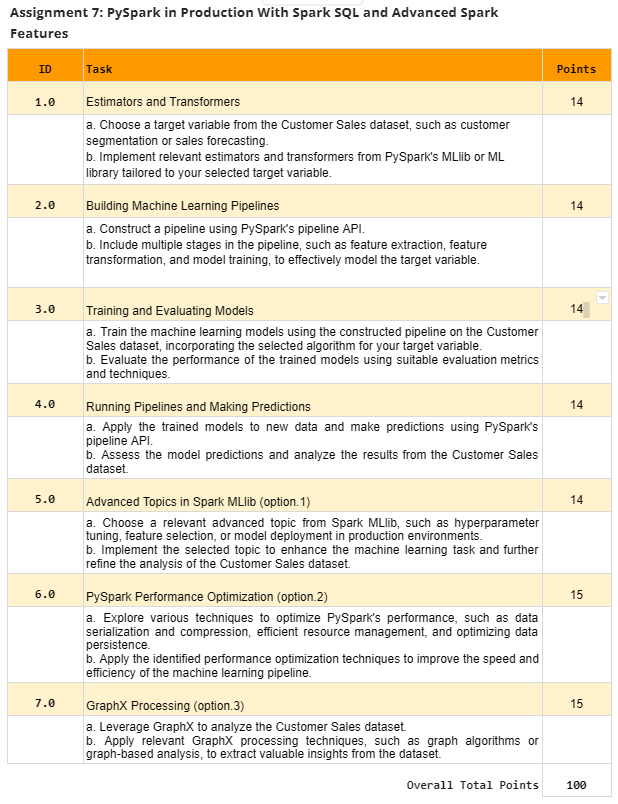


## assignment code samples

In [ ]:
# Simple Streaming Word Count with View
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("StreamingWordCount") \
    .getOrCreate()

# Read streaming data from a CSV source
streamingDF = spark \
    .readStream \
    .format("csv") \
    .option("header", "true") \
    .load("inputDirectory")

# Perform word count on the streaming data
wordCounts = streamingDF \
    .selectExpr("explode(split(text, ' ')) as word") \
    .groupBy("word") \
    .count()

# Create a temporary view for the word count results
wordCounts.createOrReplaceTempView("wordCountsView")

# Query the word count results from the view
query = spark.sql("SELECT * FROM wordCountsView")

# Start the streaming computation
query.writeStream \
    .outputMode("complete") \
    .format("console") \
    .start() \
    .awaitTermination()



In [ ]:
# Step 1: Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Step 2: Create a SparkSession
spark = SparkSession.builder \
    .appName("StreamingWordCount") \
    .getOrCreate()

# Step 3: Define the schema for the CSV data
schema = StructType([
    StructField("text", StringType(), True)
])

# Step 4: Read streaming data from a CSV source
streamingDF = spark \
    .readStream \
    .format("csv") \
    .option("header", "true") \
    .schema(schema) \
    .load("/content/customer_shopping_data.csv")  # Replace "inputDirectory" with the actual file path

# Step 5: Perform word count on the streaming data
wordCounts = streamingDF \
    .selectExpr("explode(split(text, ' ')) as word") \
    .groupBy("word") \
    .count()

# Step 6: Create a temporary view for the word count results
wordCounts.createOrReplaceTempView("wordCountsView")

# Step 7: Query the word count results from the view
query = spark.sql("SELECT * FROM wordCountsView")

# Step 8: Start the streaming computation
query.writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

# Step 9: Wait for the streaming to finish (Optional)
# No need to use query.awaitTermination() in this case since we want the streaming to run indefinitely


In [ ]:
# Complex Streaming Aggregation
from pyspark.sql import SparkSession
from pyspark.sql.functions import window

# Create a SparkSession
spark = SparkSession.builder \
    .appName("StreamingAggregation") \
    .getOrCreate()

# Read streaming data from Kafka source
streamingDF = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "topic") \
    .load()

# Perform windowed aggregation on the streaming data
windowedCounts = streamingDF \
    .groupBy(window("timestamp", "5 minutes"), "category") \
    .agg({"value": "sum"}) \
    .withColumnRenamed("sum(value)", "total")

# Write the windowed aggregation results to an external sink
query = windowedCounts \
    .writeStream \
    .outputMode("update") \
    .format("parquet") \
    .option("path", "outputDirectory") \
    .option("checkpointLocation", "checkpointDirectory") \
    .start()

query.awaitTermination()


In [ ]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Create a SparkSession
spark = SparkSession.builder.appName("GraphXProcessingExample").getOrCreate()

# Create a DataFrame for vertices
vertices = spark.createDataFrame([
    ("Alice", "Person"),
    ("Bob", "Person"),
    ("Charlie", "Person"),
    ("London", "City"),
    ("New York", "City")
], ["id", "type"])

# Create a DataFrame for edges
edges = spark.createDataFrame([
    ("Alice", "Bob", "friend"),
    ("Bob", "Charlie", "friend"),
    ("Alice", "London", "visited"),
    ("Charlie", "New York", "visited")
], ["src", "dst", "relationship"])

# Create a GraphFrame
graph = GraphFrame(vertices, edges)

# Perform graph operations
verticesDF = graph.vertices
edgesDF = graph.edges
inDegrees = graph.inDegrees
outDegrees = graph.outDegrees

# Perform graph algorithm (e.g., PageRank)
result = graph.pageRank(resetProbability=0.15, tol=0.01)

# Visualize the graph
graph.vertices.show()
graph.edges.show()

# Show the graph algorithm result
result.vertices.show()
result.edges.show()



Complex GraphX:

This complex example demonstrates the application of the GraphFrames library in analyzing a large-scale graph representing a social network. The graph is constructed with vertices representing individuals and edges representing relationships between them. The example showcases various graph operations and algorithms available in GraphFrames to gain insights into the social network.

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from graphframes import GraphFrame

# Create a SparkSession
spark = SparkSession.builder.appName("SocialNetworkGraphAnalysis").getOrCreate()

# Create a DataFrame for vertices
vertices = spark.createDataFrame([
    ("Alice", "Person"),
    ("Bob", "Person"),
    ("Charlie", "Person"),
    ("David", "Person"),
    ("Emily", "Person"),
    ("Fiona", "Person"),
    # Additional vertices representing individuals
], ["id", "type"])

# Create a DataFrame for edges
edges = spark.createDataFrame([
    ("Alice", "Bob", "friend"),
    ("Bob", "Charlie", "friend"),
    ("Charlie", "David", "friend"),
    ("David", "Emily", "friend"),
    ("Emily", "Fiona", "friend"),
    # Additional edges representing relationships
], ["src", "dst", "relationship"])

# Create a GraphFrame
graph = GraphFrame(vertices, edges)

# Perform graph operations
verticesDF = graph.vertices
edgesDF = graph.edges
inDegrees = graph.inDegrees
outDegrees = graph.outDegrees

# Apply graph algorithms
pagerank = graph.pageRank(resetProbability=0.15, tol=0.01)
connectedComponents = graph.connectedComponents()

# Show the results
verticesDF.show()
edgesDF.show()
inDegrees.show()
outDegrees.show()
pagerank.vertices.show()
connectedComponents.show()


In [ ]:
simple optimization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count


# Create a SparkSession
spark = SparkSession.builder.appName("SimplePerformanceOptimization").getOrCreate()

# Read data from a CSV file
data = spark.read.csv("data.csv", header=True, inferSchema=True)

# Apply data partitioning
partitioned_data = data.repartition(col("category"))

# Perform a count operation
result = partitioned_data.groupBy("category").agg(count("*").alias("count"))

# Show the result
result.show()


In [ ]:
complex optimozation

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum


# Create a SparkSession
spark = SparkSession.builder.appName("ComplexPerformanceOptimization").getOrCreate()

# Read data from multiple data sources
data1 = spark.read.parquet("data1.parquet")
data2 = spark.read.csv("data2.csv", header=True, inferSchema=True)

# Apply data partitioning
partitioned_data1 = data1.repartition(col("year"))
partitioned_data2 = data2.repartition(col("category"))

# Apply caching
partitioned_data1.cache()
partitioned_data2.cache()

# Perform joins and aggregations
joined_data = partitioned_data1.join(partitioned_data2, "id")
result = joined_data.groupBy("year").agg(sum("sales").alias("total_sales"))

# Show the result
result.show()


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Load the dataset
data = spark.read.format("csv").option("header", "true").load("data.csv")

# Prepare the data for modeling
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel")
featureAssembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")

# Define the Estimator (Random Forest Classifier)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=10)

# Define the Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureAssembler, rf])

# Split the data into training and test sets
trainingData, testData = data.randomSplit([0.7, 0.3])

# Fit the model using the training data
model = pipeline.fit(trainingData)

# Make predictions on the test data
predictions = model.transform(testData)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy: {:.2%}".format(accuracy))


In [ ]:
building machine learn
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Load the dataset
data = spark.read.format("csv").option("header", "true").load("data.csv")

# Prepare the data for modeling
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel")
featureAssembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")

# Define the Estimators
lr = LogisticRegression(labelCol="indexedLabel", featuresCol="features")
lr2 = LogisticRegression(labelCol="indexedLabel", featuresCol="features", regParam=0.01)

# Define the Transformers
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

# Define the Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureAssembler, lr, lr2, labelConverter])

# Split the data into training and test sets
trainingData, testData = data.randomSplit([0.7, 0.3])

# Fit the model using the training data
model = pipeline.fit(trainingData)

# Make predictions on the test data
predictions = model.transform(testData)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)

# Print the AUC
print("Area under ROC curve: {:.4f}".format(auc))


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


# Load the dataset
data = spark.read.format("csv").option("header", "true").load("data.csv")

# Prepare the data for modeling
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")

# Define the Estimator
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Define the ParamGrid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .build()

# Define the CrossValidator for model selection
evaluator = BinaryClassificationEvaluator(labelCol="label")
crossval = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)

# Define the Pipeline
pipeline = Pipeline(stages=[assembler, crossval])

# Split the data into training and test sets
trainingData, testData = data.randomSplit([0.7, 0.3])

# Fit the model using the training data
model = pipeline.fit(trainingData)

# Make predictions on the test data
predictions = model.transform(testData)

# Evaluate the model
auc = evaluator.evaluate(predictions)

# Print the AUC
print("Area under ROC curve: {:.4f}".format(auc))


In [ ]:
from pyspark.ml import PipelineModel
from pyspark.sql import SparkSession


# Load the saved pipeline model
spark = SparkSession.builder.appName("PipelinePredictor").getOrCreate()
model = PipelineModel.load("saved_model")


# Load new data for prediction
newData = spark.read.format("csv").option("header", "true").load("new_data.csv")


# Make predictions using the pipeline model
predictions = model.transform(newData)


# Extract predictions and probabilities
predictedLabels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
predictedProbabilities = predictions.select("probability").rdd.flatMap(lambda x: x).collect()


# Print the predictions and probabilities
for label, probability in zip(predictedLabels, predictedProbabilities):
    print("Prediction: {}, Probability: {}".format(label, probability))


In [ ]:
from pyspark.ml import PipelineModel
from pyspark.sql import SparkSession


# Load the saved pipeline model
spark = SparkSession.builder.appName("PipelinePredictor").getOrCreate()
model = PipelineModel.load("saved_model")


# Load new data for prediction
newData = spark.read.format("csv").option("header", "true").load("new_data.csv")


# Check if the loaded model contains the expected stages
pipeline_stages = model.stages
if len(pipeline_stages) == 0:
    print("The loaded pipeline model does not contain any stages.")
else:
    print("The loaded pipeline model contains the following stages:")
    for stage in pipeline_stages:
        print("- {}".format(stage))


# Make predictions using the pipeline model
predictions = model.transform(newData)


# Check if the predictions DataFrame is empty
if predictions.count() == 0:
    print("No predictions were made on the new data.")
else:
    print("Predictions were made on the new data.")


# Extract predictions and probabilities
predictedLabels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
predictedProbabilities = predictions.select("probability").rdd.flatMap(lambda x: x).collect()


# Check if any null values exist in the predicted labels or probabilities
if None in predictedLabels or None in predictedProbabilities:
    print("Some predicted labels or probabilities are missing.")
else:
    print("All predicted labels and probabilities are present.")


# Print the predictions and probabilities
for label, probability in zip(predictedLabels, predictedProbabilities):
    print("Prediction: {}, Probability: {}".format(label, probability))


## Perform assignment here

In [ ]:
find data from

https://anindya-saha.github.io/blog/data-science-with-spark/retail-database-analysis-python/retail-database-analysis-python.html



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("IncomeClassification") \
    .getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/adult.csv', header=True, inferSchema=True)

# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
                    'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
                    'hours-per-week', 'native-country', 'income']
data = data.select(selected_columns).na.drop()

# Step 2: Clean the 'income' column by removing leading/trailing whitespaces
data = data.withColumn('income', trim(data['income']))

# Step 3: Encode the target variable 'income' (label) with StringIndexer
label_indexer = StringIndexer(inputCol='income', outputCol='label')
data = label_indexer.fit(data).transform(data)

# Step 4: Encode categorical columns with StringIndexer
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(data) for col in categorical_columns]
for indexer in indexers:
    data = indexer.transform(data)

# Step 5: Prepare the feature vector
feature_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] + [col + "_index" for col in categorical_columns]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Step 6: Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Step 7: Create the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")

# Step 8: Train the Logistic Regression model on the training data
lr_model = logistic_regression.fit(train_data)

# Step 9: Make predictions on the test data
predictions = lr_model.transform(test_data)

# Step 10: Evaluate the model using BinaryClassificationEvaluator (Area Under ROC)
evaluator = BinaryClassificationEvaluator()
roc_auc = evaluator.evaluate(predictions)
print("Area Under ROC: {:.2f}".format(roc_auc))

# Step 11: Show the predicted labels and probabilities for the test data
predictions.select("label", "prediction", "probability").show()


Area Under ROC: 0.88
+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.97961178741817...|
|  0.0|       0.0|[0.99566090706739...|
|  0.0|       0.0|[0.98732060913169...|
|  0.0|       0.0|[0.99117511818343...|
|  0.0|       0.0|[0.99438074732448...|
|  0.0|       0.0|[0.99471550785109...|
|  0.0|       0.0|[0.99272444862897...|
|  0.0|       0.0|[0.99676680032854...|
|  0.0|       0.0|[0.98786899088697...|
|  0.0|       0.0|[0.97890311376272...|
|  0.0|       0.0|[0.98894391571126...|
|  0.0|       0.0|[0.98721170609830...|
|  0.0|       0.0|[0.99415485328805...|
|  0.0|       0.0|[0.99668678768606...|
|  0.0|       0.0|[0.98423168143696...|
|  0.0|       0.0|[0.99306600562668...|
|  0.0|       0.0|[0.99236656288722...|
|  0.0|       0.0|[0.99604862299776...|
|  0.0|       0.0|[0.98860588010886...|
|  0.0|       0.0|[0.96427350224621...|
+-----+----------+--------------------+
only showing top 20

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Step 1: Create a SparkSession
spark = SparkSession.builder \
    .appName("Customer_Segmentation") \
    .getOrCreate()

# Step 2: Load the "Amazon Sale Report.csv" dataset into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 3: Explore the dataset and identify relevant features for customer segmentation
# For example, let's assume 'Amount', 'Qty', and 'Total_Spending' are important features

# Step 4: Prepare the data for customer segmentation
selected_columns = ['Amount', 'Qty', 'Total_Spending']
data = data.select(*selected_columns).na.drop()

# Step 5: Prepare the feature vector for clustering
feature_columns = ['Amount', 'Qty', 'Total_Spending']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Step 6: Choose the number of clusters for customer segmentation (you can try different values)
num_clusters = 5

# Step 7: Train the KMeans model for customer segmentation
kmeans = KMeans(featuresCol="features", k=num_clusters, seed=42)
model = kmeans.fit(data)

# Step 8: Assign clusters to each customer
segmented_data = model.transform(data)

# Step 9: Evaluate the clustering performance (Optional)
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(segmented_data)
print("Silhouette Score: {:.2f}".format(silhouette_score))

# Step 10: Show the results
segmented_data.show()

# Step 11: You can use the cluster assignments as a target variable for customer segmentation
# For example, if num_clusters = 5, the 'prediction' column will contain values 0 to 4
# representing the cluster assignment for each customer.

# Step 12: Further analyze and interpret the results to understand customer segments
# You can use visualization techniques and domain knowledge to interpret the clusters.

# Step 13: Depending on your business goals, you can use the customer segments for targeted marketing,
# sales forecasting, or any other relevant use case.

# Step 14: Save or export the results as needed.
# For example, save the segmented data as a CSV file
segmented_data.write.csv('/path/to/save/segmented_data.csv', header=True)

# You can also use other formats like parquet, JSON, etc., depending on your requirements.


AnalysisException: ignored

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SalesClassification") \
    .getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 2: Clean the 'B2B' column by removing leading/trailing whitespaces
data = data.withColumn('B2B', trim(data['B2B']))

# Step 3: Encode the target variable 'B2B' (label) with StringIndexer
label_indexer = StringIndexer(inputCol='B2B', outputCol='label')
data = label_indexer.fit(data).transform(data)

# Step 4: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 5: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', data['B2B'].cast('int'))

# Step 6: Prepare the feature vector
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Step 7: Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Step 8: Create and train the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")
lr_model = logistic_regression.fit(train_data)

# Step 9: Make predictions on the test data using the Logistic Regression model
lr_predictions = lr_model.transform(test_data)

# Step 10: Evaluate the Logistic Regression model using BinaryClassificationEvaluator (Area Under ROC)
evaluator = BinaryClassificationEvaluator()
lr_auc = evaluator.evaluate(lr_predictions)
print("Logistic Regression - Area Under ROC: {:.2f}".format(lr_auc))

# Step 11: Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(featuresCol="features", labelCol="label")
dt_model = decision_tree.fit(train_data)

# Step 12: Make predictions on the test data using the Decision Tree model
dt_predictions = dt_model.transform(test_data)

# Step 13: Evaluate the Decision Tree model using MulticlassClassificationEvaluator (Accuracy)
dt_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
print("Decision Tree - Accuracy: {:.2f}".format(dt_accuracy))

# Step 14: Create and train the Random Forest model
random_forest = RandomForestClassifier(featuresCol="features", labelCol="label")
rf_model = random_forest.fit(train_data)

# Step 15: Make predictions on the test data using the Random Forest model
rf_predictions = rf_model.transform(test_data)

# Step 16: Evaluate the Random Forest model using MulticlassClassificationEvaluator (Accuracy)
rf_accuracy = dt_evaluator.evaluate(rf_predictions)
print("Random Forest - Accuracy: {:.2f}".format(rf_accuracy))

# Step 17: Create and train the Naive Bayes model
naive_bayes = NaiveBayes(featuresCol="features", labelCol="label")
nb_model = naive_bayes.fit(train_data)

# Step 18: Make predictions on the test data using the Naive Bayes model
nb_predictions = nb_model.transform(test_data)

# Step 19: Evaluate the Naive Bayes model using MulticlassClassificationEvaluator (Accuracy)
nb_accuracy = dt_evaluator.evaluate(nb_predictions)
print("Naive Bayes - Accuracy: {:.2f}".format(nb_accuracy))

# Step 20: Create and train the Logistic Regression model with Cross-Validation
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")

# Step 21: Set up ParamGridBuilder for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(logistic_regression.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(logistic_regression.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Step 22: Set up CrossValidator with the Logistic Regression model and evaluator
crossval = CrossValidator(estimator=logistic_regression,
                          estimatorParamMaps=param_grid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=5)

# Step 23: Train the CrossValidator on the training data
cv_model = crossval.fit(train_data)

# Step 24: Make predictions on the test data using the best model from CrossValidation
cv_predictions = cv_model.transform(test_data)

# Step 25: Evaluate the CrossValidator model using BinaryClassificationEvaluator (Area Under ROC)
cv_auc = evaluator.evaluate(cv_predictions)
print("Logistic Regression with Cross-Validation - Area Under ROC: {:.2f}".format(cv_auc))


Logistic Regression - Area Under ROC: 0.53
Decision Tree - Accuracy: 0.99
Random Forest - Accuracy: 0.99
Naive Bayes - Accuracy: 0.56
Logistic Regression with Cross-Validation - Area Under ROC: 0.53


. Construct a pipeline using PySpark's pipeline API.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SalesClassification") \
    .getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 2: Clean the 'B2B' column by removing leading/trailing whitespaces
data = data.withColumn('B2B', trim(data['B2B']))

# Step 3: Encode the target variable 'B2B' (label) with StringIndexer
label_indexer = StringIndexer(inputCol='B2B', outputCol='label')
data = label_indexer.fit(data).transform(data)

# Step 4: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 5: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', data['B2B'].cast('int'))

# Step 6: Prepare the feature vector
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Step 7: Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Step 8: Define the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")

# Step 9: Train the logistic regression model on the training data
lr_model = logistic_regression.fit(train_data)

# Step 10: Make predictions on the test data using the logistic regression model
lr_predictions = lr_model.transform(test_data)

# Step 11: Define the evaluator
evaluator = BinaryClassificationEvaluator()

# Step 12: Evaluate the logistic regression model using BinaryClassificationEvaluator (Area Under ROC)
auc = evaluator.evaluate(lr_predictions)
print("Logistic Regression - Area Under ROC: {:.2f}".format(auc))


Logistic Regression - Area Under ROC: 0.53


Include multiple stages in the pipeline, such as feature extraction, feature transformation, and model training, to effectively model the target variable.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SalesClassification") \
    .getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Clean the 'B2B' column by removing leading/trailing whitespaces
data = data.withColumn('B2B', trim(data['B2B']))

# Encode the target variable 'B2B' (label) with StringIndexer
label_indexer = StringIndexer(inputCol='B2B', outputCol='label')
data = label_indexer.fit(data).transform(data)

# Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', data['B2B'].cast('int'))

# Encode categorical column 'Size' with StringIndexer and OneHotEncoder
size_indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = size_indexer.fit(data).transform(data)

encoder = OneHotEncoder(inputCols=['Size_index'], outputCols=['Size_encoded'])
encoder_model = encoder.fit(data)
data = encoder_model.transform(data)

# Prepare the feature vector
feature_columns = ['Size_encoded', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")
lr_model = logistic_regression.fit(train_data)

# Make predictions on the test data using the Logistic Regression model
lr_predictions = lr_model.transform(test_data)

# Evaluate the Logistic Regression model using BinaryClassificationEvaluator (Area Under ROC)
evaluator = BinaryClassificationEvaluator()
lr_auc = evaluator.evaluate(lr_predictions)
print("Logistic Regression - Area Under ROC: {:.2f}".format(lr_auc))


Logistic Regression - Area Under ROC: 0.53


a. Train the machine learning models using the constructed pipeline on the Customer Sales dataset, incorporating the selected algorithm for your target variable.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SalesClassification") \
    .getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 2: Clean the 'B2B' column by removing leading/trailing whitespaces
data = data.withColumn('B2B', trim(data['B2B']))

# Step 3: Encode the target variable 'B2B' (label) with StringIndexer
label_indexer = StringIndexer(inputCol='B2B', outputCol='label')
data = label_indexer.fit(data).transform(data)

# Step 4: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 5: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', data['B2B'].cast('int'))

# Step 6: Prepare the feature vector
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = assembler.transform(data)  # Use the assembler to transform the train_data

# Step 7: Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = train_data.randomSplit([0.7, 0.3], seed=42)

# Step 8: Create a Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")

# Step 9: Create a pipeline with the stages (feature preparation and model training)
pipeline = Pipeline(stages=[logistic_regression])

# Step 10: Train the pipeline on the training data
pipeline_model = pipeline.fit(train_data)

# Step 11: Make predictions on the test data using the trained pipeline
predictions = pipeline_model.transform(test_data)

# Step 12: Evaluate the Logistic Regression model using BinaryClassificationEvaluator (Area Under ROC)
evaluator = BinaryClassificationEvaluator()
auc = evaluator.evaluate(predictions)
print("Logistic Regression - Area Under ROC: {:.2f}".format(auc))


Logistic Regression - Area Under ROC: 0.53


a. Train the machine learning models using the constructed pipeline on the Customer Sales dataset, incorporating the selected algorithm for your target variable.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator


# Create a SparkSession
spark = SparkSession.builder \
    .appName("SalesClassification") \
    .getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv('/content/Amazon Sale Report.csv', header=True, inferSchema=True)

# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
data = data.select(selected_columns).na.drop()

# Step 2: Clean the 'B2B' column by removing leading/trailing whitespaces
data = data.withColumn('B2B', trim(data['B2B']))

# Step 3: Encode the target variable 'B2B' (label) with StringIndexer
label_indexer = StringIndexer(inputCol='B2B', outputCol='label')
data = label_indexer.fit(data).transform(data)

# Step 4: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
data = indexer.fit(data).transform(data)

# Step 5: Convert 'B2B' column to integer type (0 for False, 1 for True)
data = data.withColumn('B2B', data['B2B'].cast('int'))

# Step 6: Prepare the feature vector
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = assembler.transform(data)  # Use the assembler to transform the train_data

# Step 7: Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = train_data.randomSplit([0.7, 0.3], seed=42)

# Step 8: Create a Logistic Regression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")

# Step 9: Create a pipeline with the stages (feature preparation and model training)
pipeline = Pipeline(stages=[logistic_regression])

# Step 10: Train the pipeline on the training data
pipeline_model = pipeline.fit(train_data)


# Step 11: Make predictions on the test data using the trained pipeline
predictions = pipeline_model.transform(test_data)

# Step 12: Evaluate the Logistic Regression model using BinaryClassificationEvaluator (Area Under ROC)
evaluator = BinaryClassificationEvaluator()
auc = evaluator.evaluate(predictions)
print("Logistic Regression - Area Under ROC: {:.2f}".format(auc))

# Step 13: Evaluate the Logistic Regression model using MulticlassClassificationEvaluator (Accuracy, Precision, Recall, F1-Score)
multiclass_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
accuracy = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "accuracy"})
precision = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
recall = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "weightedRecall"})
f1_score = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "f1"})
print("Logistic Regression - Accuracy: {:.2f}".format(accuracy))
print("Logistic Regression - Precision: {:.2f}".format(precision))
print("Logistic Regression - Recall: {:.2f}".format(recall))
print("Logistic Regression - F1-Score: {:.2f}".format(f1_score))

# Step 14: Confusion Matrix
confusion_matrix = predictions.groupBy("label").pivot("prediction").count().na.fill(0)
confusion_matrix.show()

Logistic Regression - Area Under ROC: 0.53
Logistic Regression - Accuracy: 0.99
Logistic Regression - Precision: 0.99
Logistic Regression - Recall: 0.99
Logistic Regression - F1-Score: 0.99
+-----+-----+
|label|  0.0|
+-----+-----+
|  0.0|36063|
|  1.0|  240|
+-----+-----+



Apply the trained models to new data and make predictions using PySpark's pipeline API.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import trim
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SalesClassification") \
    .getOrCreate()

# Load the new data into a DataFrame (replace 'new_data.csv' with the path to your new data file)
new_data = spark.read.csv('/path/to/new_data.csv', header=True, inferSchema=True)

# Apply the same data preprocessing steps to the new data as done for the training data

# Step 1: Drop rows with missing values in any of the selected columns
selected_columns = ['Date', 'Size', 'index', 'Amount', 'B2B']
new_data = new_data.select(selected_columns).na.drop()

# Step 2: Clean the 'B2B' column by removing leading/trailing whitespaces
new_data = new_data.withColumn('B2B', trim(new_data['B2B']))

# Step 3: Encode categorical column 'Size' with StringIndexer
indexer = StringIndexer(inputCol='Size', outputCol='Size_index')
new_data = indexer.fit(new_data).transform(new_data)

# Step 4: Convert 'B2B' column to integer type (0 for False, 1 for True)
new_data = new_data.withColumn('B2B', new_data['B2B'].cast('int'))

# Step 5: Prepare the feature vector
feature_columns = ['Size_index', 'index', 'Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
new_data = assembler.transform(new_data)

# Step 6: Make predictions on the new data using the trained pipeline
predictions = pipeline_model.transform(new_data)

# Show the predictions for the new data
predictions.select("Date", "Size", "index", "Amount", "B2B", "prediction").show()


AnalysisException: ignored